In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [48]:
import pandas as pd

file_path = '/content/drive/MyDrive/DataAsad/Childcare-Prices-by-Age-Children-Care-Setting-Data-Table-2023.xlsx'

try:
  # Read the Excel file into a pandas DataFrame
  data = pd.read_excel(file_path, sheet_name='Virginia') # Specify the sheet name

  # Display the first few rows
  data.head()

except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except Exception as e:
  print(f"An error occurred: {e}")

In [ ]:
data.head()

,State name,County name,County FIPS code,Infant center-based price: 2018 ($),Infant center-based price: 2023 (estimated) ($),Infant center-based price as share of family income: 2018 (%),Infant home-based price: 2018 ($),Infant home-based price: 2023 (estimated) ($),Infant home-based price as share of family income: 2018 (%),Toddler center-based price: 2018 ($),...,School-age home-based price as share of family income: 2018 (%),Women's labor force participation rate (%),Women's median earnings ($),Median family income ($),Percent of families in poverty (%),Total population,Percent Asian (%),Percent Black (%),Percent Hispanic (of any race) (%),Percent White (%)
0,Virginia,Accomack County,51001,8580,10099.107459,15.604539,5200,6120.671187,9.457297,5980,...,8.038702,66.9,24799,54984,11.8,32742,0.2,29.2,9.0,68.3
1,Virginia,Albemarle County,51003,13520,15913.745087,14.060339,7540,8874.973222,7.841343,11180,...,6.759778,76.3,31679,96157,5.9,106355,5.3,9.8,5.8,81.6
2,Virginia,Alleghany County,51005,7280,8568.939662,12.247233,5200,6120.671187,8.748023,5980,...,7.435820,62.5,23994,59442,15.6,15286,0.1,5.4,1.4,92.0
3,Virginia,Amelia County,51007,6760,7956.872544,9.071877,6500,7650.838984,8.722959,5200,...,5.931612,77.0,31224,74516,9.3,12854,0.0,21.3,3.0,75.8
4,Virginia,Amherst County,51009,6760,7956.872544,10.535503,6500,7650.838984,10.130291,5200,...,6.078175,73.1,24302,64164,7.7,31882,0.5,17.8,2.4,77.2


In [ ]:
data.columns

Index(['State name', 'County name', 'County FIPS code',
       'Infant center-based price: 2018 ($)',
       'Infant center-based price: 2023 (estimated) ($)',
       'Infant center-based price as share of family income: 2018 (%)',
       'Infant home-based price: 2018 ($)',
       'Infant home-based price: 2023 (estimated) ($)',
       'Infant home-based price as share of family income: 2018 (%)',
       'Toddler center-based price: 2018 ($)',
       'Toddler center-based price: 2023 (estimated) ($)',
       'Toddler center-based price as share of family income: 2018 (%)',
       'Toddler home-based price: 2018 ($)',
       'Toddler home-based price: 2023 (estimated) ($)',
       'Toddler home-based price as share of family income: 2018 (%)',
       'Preschool center-based price: 2018 ($)',
       'Preschool center-based price: 2023 (estimated) ($)',
       'Preschool center-based price as share of family income: 2018 (%)',
       'Preschool home-based price: 2018 ($)',
       'Presch

In [ ]:
data.shape

(133, 36)

#All State Analysis

##	Yearly Comparison of Childcare Costs

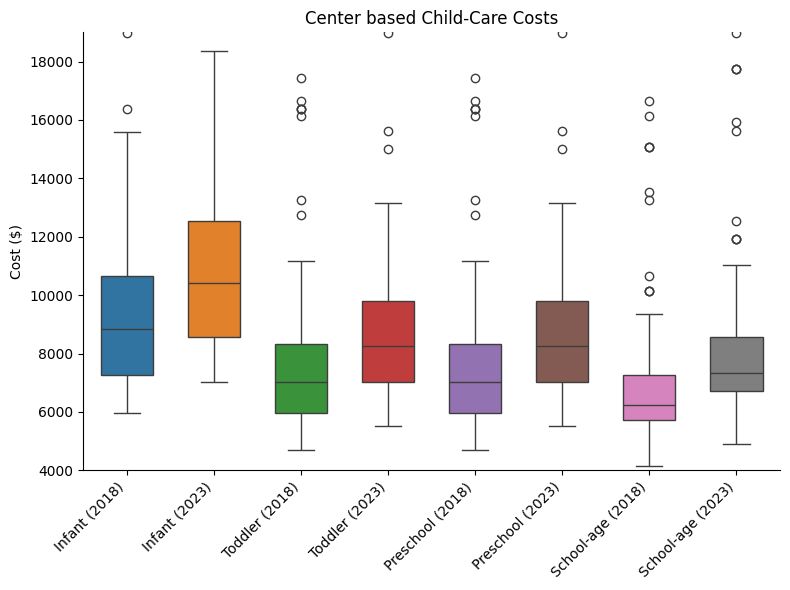

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_excel(file_path, sheet_name='Virginia') # Specify the sheet name
# Select the relevant columns
columns_to_plot = [
    'Infant center-based price: 2018 ($)',
    'Infant center-based price: 2023 (estimated) ($)',
    'Toddler center-based price: 2018 ($)',
    'Toddler center-based price: 2023 (estimated) ($)',
    'Preschool center-based price: 2018 ($)',
    'Preschool center-based price: 2023 (estimated) ($)',
    'School-age center-based price: 2018 ($)',
    'School-age center-based price: 2023 (estimated) ($)'
]

# Create the box plot
plt.figure(figsize=(8, 6))  # Reduced width for a narrower plot
sns.boxplot(data=data[columns_to_plot], width=0.6)  # Adjust box width for narrower boxes

# Customize the plot
plt.title('Center based Child-Care Costs')
plt.ylabel('Cost ($)')
plt.ylim(4000, 19001)

# Rename x-axis labels
new_labels = [
    'Infant (2018)', 'Infant (2023)', 'Toddler (2018)', 'Toddler (2023)',
    'Preschool (2018)', 'Preschool (2023)', 'School-age (2018)', 'School-age (2023)'
]
plt.xticks(range(len(columns_to_plot)), new_labels, rotation=45, ha='right')

# Modify the spines
ax = plt.gca()
ax.spines['top'].set_visible(False)     # Remove top spine
ax.spines['right'].set_visible(False)   # Remove right spine
ax.spines['bottom'].set_visible(True)   # Keep bottom spine
ax.spines['left'].set_visible(True)     # Keep left spine

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


<Figure size 1400x800 with 0 Axes>

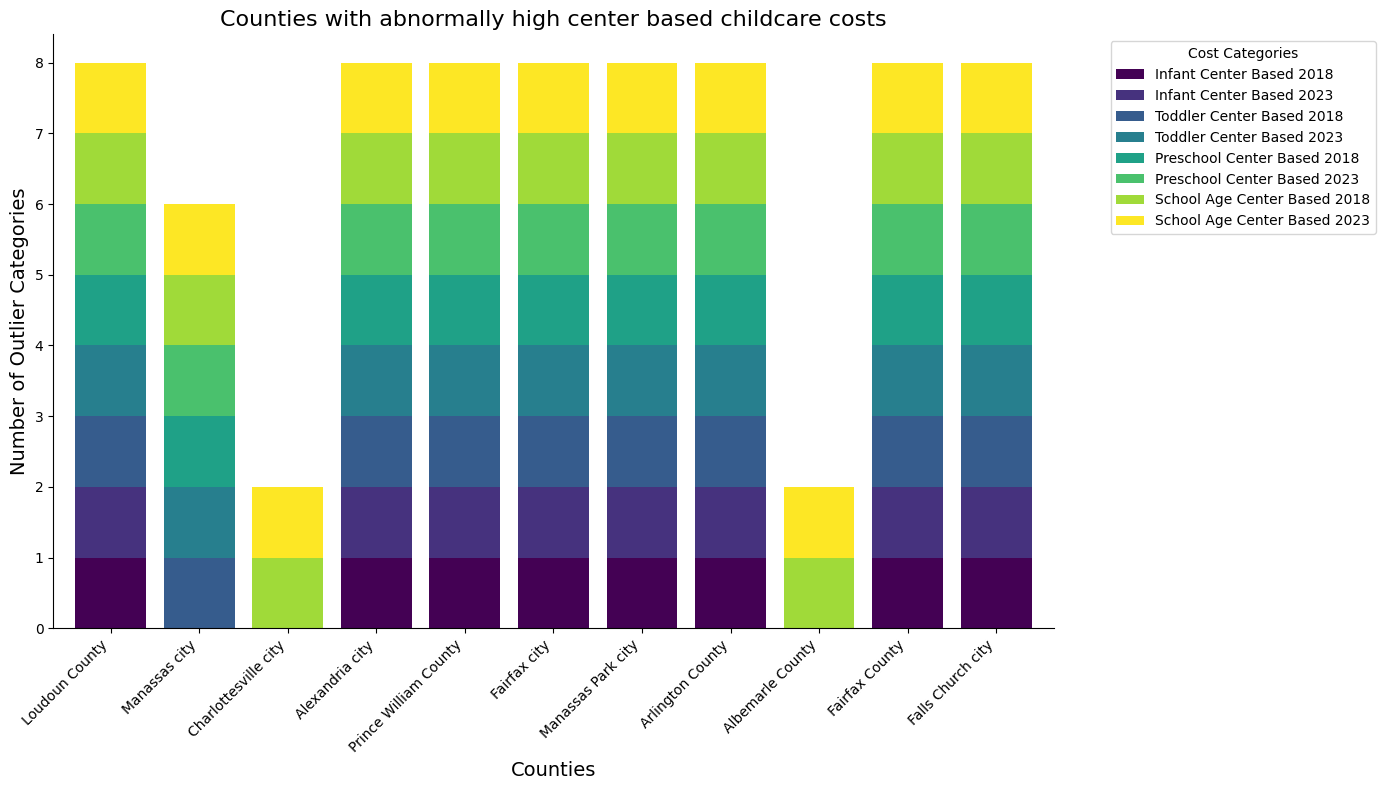

In [ ]:
import pandas as pd


def compute_iqr_and_filter(df, columns):

    results = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR

        counties_above_iqr = df[df[col] > upper_bound]['County name'].tolist()
        results[col] = counties_above_iqr
    return results


childcare_columns = [
    'Infant center-based price: 2018 ($)',
    'Infant center-based price: 2023 (estimated) ($)',
    'Toddler center-based price: 2018 ($)',
    'Toddler center-based price: 2023 (estimated) ($)',
    'Preschool center-based price: 2018 ($)',
    'Preschool center-based price: 2023 (estimated) ($)',
    'School-age center-based price: 2018 ($)',
    'School-age center-based price: 2023 (estimated) ($)'
]

iqr_results = compute_iqr_and_filter(data, childcare_columns)
def create_dataframe_from_iqr(iqr_results):
    """
    Creates a Pandas DataFrame from IQR results.
    """

    all_counties = set()
    for counties in iqr_results.values():
        all_counties.update(counties)

    data = []
    for county in all_counties:
        row = {'county': county, 'counts': 0}
        for col, counties_list in iqr_results.items():
            if county in counties_list:
                row[col] = 1
                row['counts'] += 1
            else:
                row[col] = 0
        data.append(row)

    df = pd.DataFrame(data)
    return df

# Assuming 'iqr_results' is defined as in your provided code
iqr_dataframe = create_dataframe_from_iqr(iqr_results)
# iqr_dataframe.to_csv("center_based_outliers.csv")
iqr_dataframe
# Rename columns to be more intuitive
renamed_columns = {
    "Infant center-based price: 2018 ($)": "Infant Center Based 2018",
    "Infant center-based price: 2023 (estimated) ($)": "Infant Center Based 2023",
    "Toddler center-based price: 2018 ($)": "Toddler Center Based 2018",
    "Toddler center-based price: 2023 (estimated) ($)": "Toddler Center Based 2023",
    "Preschool center-based price: 2018 ($)": "Preschool Center Based 2018",
    "Preschool center-based price: 2023 (estimated) ($)": "Preschool Center Based 2023",
    "School-age center-based price: 2018 ($)": "School Age Center Based 2018",
    "School-age center-based price: 2023 (estimated) ($)": "School Age Center Based 2023"
}

# Apply the renaming
data_renamed = iqr_dataframe.rename(columns=renamed_columns)
stacked_data_renamed = data_renamed[list(renamed_columns.values())]
county_names = data_renamed['county'].tolist()

# Plot the stacked bar chart with intuitive labels
plt.figure(figsize=(14, 8))
stacked_data_renamed.plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8, colormap="viridis")

# Customize the plot
plt.title('Counties with abnormally high center based childcare costs', fontsize=16)
plt.xlabel('Counties', fontsize=14)
plt.ylabel('Number of Outlier Categories', fontsize=14)
plt.xticks(ticks=range(len(county_names)), labels=county_names, rotation=45, ha='right', fontsize=10)
plt.legend(title='Cost Categories', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Remove the top and right spines (frame lines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the updated plot
plt.show()


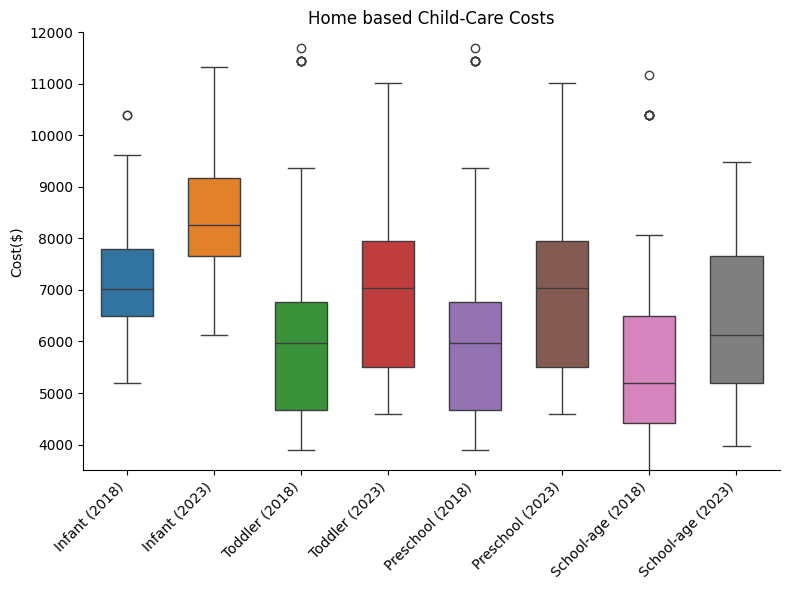

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_excel(file_path, sheet_name='Virginia') # Specify the sheet name
# Select the relevant columns
columns_to_plot = [
    'Infant home-based price: 2018 ($)',
    'Infant home-based price: 2023 (estimated) ($)',
    'Toddler home-based price: 2018 ($)',
    'Toddler home-based price: 2023 (estimated) ($)',
    'Preschool home-based price: 2018 ($)',
    'Preschool home-based price: 2023 (estimated) ($)',
    'School-age home-based price: 2018 ($)',
    'School-age home-based price:  2023 (estimated) ($)'
]

# Create the box plot
plt.figure(figsize=(8, 6))  # Reduced width for a narrower plot
sns.boxplot(data=data[columns_to_plot], width=0.6)  # Adjust box width for narrower boxes

# Customize the plot
plt.title('Home based Child-Care Costs')
plt.ylabel('Cost($)')
plt.ylim(3500, 12000)

# Rename x-axis labels
new_labels = [
    'Infant (2018)', 'Infant (2023)', 'Toddler (2018)', 'Toddler (2023)',
    'Preschool (2018)', 'Preschool (2023)', 'School-age (2018)', 'School-age (2023)'
]
plt.xticks(range(len(columns_to_plot)), new_labels, rotation=45, ha='right')

# Modify the spines
ax = plt.gca()
ax.spines['top'].set_visible(False)     # Remove top spine
ax.spines['right'].set_visible(False)   # Remove right spine
ax.spines['bottom'].set_visible(True)   # Keep bottom spine
ax.spines['left'].set_visible(True)     # Keep left spine

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


IQR Results for Home-Based Childcare:
{'Infant home-based price: 2018 ($)': ['Arlington County', 'Fairfax County', 'Fauquier County', 'Loudoun County', 'Prince William County', 'Alexandria city', 'Fairfax city', 'Falls Church city', 'Manassas city', 'Manassas Park city'], 'Infant home-based price: 2023 (estimated) ($)': ['Arlington County', 'Fairfax County', 'Fauquier County', 'Loudoun County', 'Prince William County', 'Alexandria city', 'Fairfax city', 'Falls Church city', 'Manassas city', 'Manassas Park city'], 'Toddler home-based price: 2018 ($)': ['Arlington County', 'Fairfax County', 'Loudoun County', 'Alexandria city', 'Fairfax city', 'Falls Church city', 'Manassas city', 'Manassas Park city'], 'Toddler home-based price: 2023 (estimated) ($)': ['Arlington County', 'Fairfax County', 'Loudoun County', 'Alexandria city', 'Fairfax city', 'Falls Church city', 'Manassas city', 'Manassas Park city'], 'Preschool home-based price: 2018 ($)': ['Arlington County', 'Fairfax County', 'Loudoun

<Figure size 1400x800 with 0 Axes>

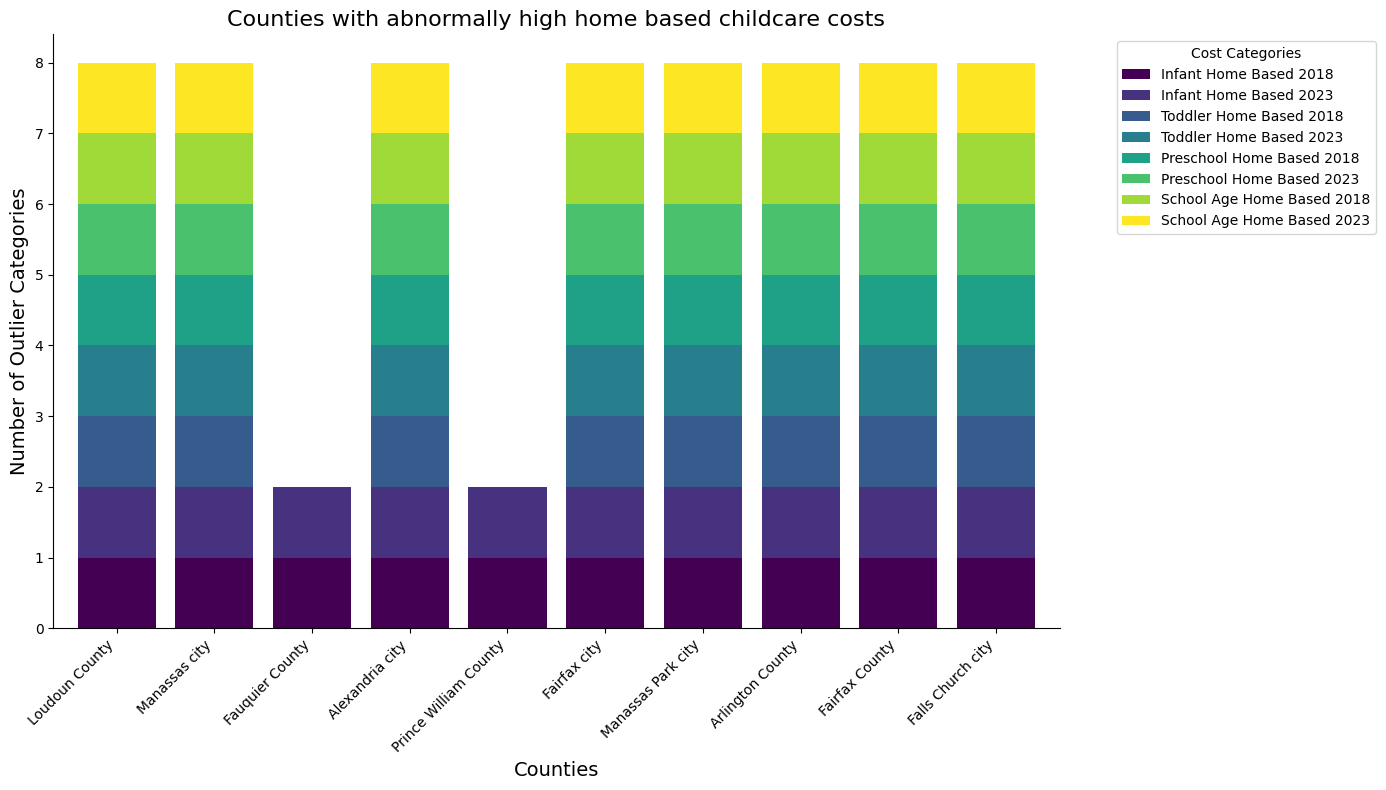

In [ ]:
def compute_iqr_and_filter(df, columns):

    results = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR

        counties_above_iqr = df[df[col] > upper_bound]['County name'].tolist()
        results[col] = counties_above_iqr
    return results

home_based_columns = [
    'Infant home-based price: 2018 ($)',
    'Infant home-based price: 2023 (estimated) ($)',
    'Toddler home-based price: 2018 ($)',
    'Toddler home-based price: 2023 (estimated) ($)',
    'Preschool home-based price: 2018 ($)',
    'Preschool home-based price: 2023 (estimated) ($)',
    'School-age home-based price: 2018 ($)',
    'School-age home-based price:  2023 (estimated) ($)'
]
data = pd.read_excel(file_path, sheet_name='Virginia') # Specify the sheet name
iqr_results_home_based = compute_iqr_and_filter(data, home_based_columns)
print("IQR Results for Home-Based Childcare:")
print(iqr_results_home_based)


def create_dataframe_from_iqr(iqr_results):
    """
    Creates a Pandas DataFrame from IQR results.
    """

    all_counties = set()
    for counties in iqr_results.values():
        all_counties.update(counties)

    data = []
    for county in all_counties:
        row = {'county': county, 'counts': 0}
        for col, counties_list in iqr_results.items():
            if county in counties_list:
                row[col] = 1
                row['counts'] += 1
            else:
                row[col] = 0
        data.append(row)

    df = pd.DataFrame(data)
    return df

# Assuming 'iqr_results' is defined as in your provided code
iqr_dataframe = create_dataframe_from_iqr(iqr_results_home_based)
# iqr_dataframe.to_csv("center_based_outliers.csv")
# iqr_dataframe
# Rename columns to be more intuitive
renamed_columns = {
    "Infant home-based price: 2018 ($)": "Infant Home Based 2018",
    "Infant home-based price: 2023 (estimated) ($)": "Infant Home Based 2023",
    "Toddler home-based price: 2018 ($)": "Toddler Home Based 2018",
    "Toddler home-based price: 2023 (estimated) ($)": "Toddler Home Based 2023",
    "Preschool home-based price: 2018 ($)": "Preschool Home Based 2018",
    "Preschool home-based price: 2023 (estimated) ($)": "Preschool Home Based 2023",
    "School-age home-based price: 2018 ($)": "School Age Home Based 2018",
    "School-age home-based price:  2023 (estimated) ($)": "School Age Home Based 2023"
}

# Apply the renaming
data_renamed = iqr_dataframe.rename(columns=renamed_columns)
stacked_data_renamed = data_renamed[list(renamed_columns.values())]
county_names = data_renamed['county'].tolist()

# Plot the stacked bar chart with intuitive labels
plt.figure(figsize=(14, 8))
stacked_data_renamed.plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8, colormap="viridis")

# Customize the plot
plt.title('Counties with abnormally high home based childcare costs', fontsize=16)
plt.xlabel('Counties', fontsize=14)
plt.ylabel('Number of Outlier Categories', fontsize=14)
plt.xticks(ticks=range(len(county_names)), labels=county_names, rotation=45, ha='right', fontsize=10)
plt.legend(title='Cost Categories', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Remove the top and right spines (frame lines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the updated plot
plt.show()

In [ ]:
data_renamed

,county,counts,Infant Home Based 2018,Infant Home Based 2023,Toddler Home Based 2018,Toddler Home Based 2023,Preschool Home Based 2018,Preschool Home Based 2023,School Age Home Based 2018,School-age home-based price: 2023 (estimated) ($)
0,Loudoun County,8,1,1,1,1,1,1,1,1
1,Manassas city,8,1,1,1,1,1,1,1,1
2,Fauquier County,2,1,1,0,0,0,0,0,0
3,Alexandria city,8,1,1,1,1,1,1,1,1
4,Prince William County,2,1,1,0,0,0,0,0,0
5,Fairfax city,8,1,1,1,1,1,1,1,1
6,Manassas Park city,8,1,1,1,1,1,1,1,1
7,Arlington County,8,1,1,1,1,1,1,1,1
8,Fairfax County,8,1,1,1,1,1,1,1,1
9,Falls Church city,8,1,1,1,1,1,1,1,1


<ipython-input-12-ef7fe0442a23>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Cost', data=combined_childcare_loc_year, palette=palette, width=0.6)


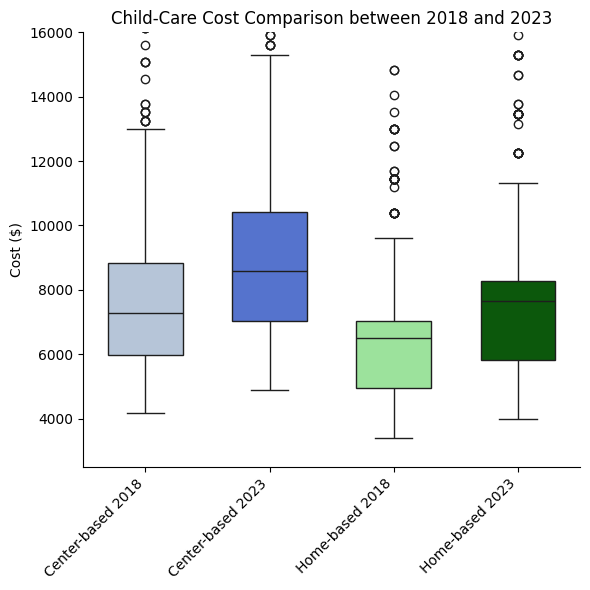

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_excel(file_path, sheet_name='Virginia') # Specify the sheet name
# Create lists to store the data for each column
center_based_2018 = []
center_based_2023 = []
home_based_2018 = []
home_based_2023 = []

# Iterate through the relevant columns in your DataFrame
for index, row in data.iterrows():
    # Center-based 2018
    center_based_2018.extend([row['Infant center-based price: 2018 ($)'],
                             row['Toddler center-based price: 2018 ($)'],
                             row['Preschool center-based price: 2018 ($)'],
                             row['School-age center-based price: 2018 ($)']])

    # Center-based 2023
    center_based_2023.extend([row['Infant center-based price: 2023 (estimated) ($)'],
                             row['Toddler center-based price: 2023 (estimated) ($)'],
                             row['Preschool center-based price: 2023 (estimated) ($)'],
                             row['School-age center-based price: 2023 (estimated) ($)']])

    # Home-based 2018
    home_based_2018.extend([row['Infant home-based price: 2018 ($)'],
                            row['Toddler home-based price: 2018 ($)'],
                            row['Preschool home-based price: 2018 ($)'],
                            row['School-age home-based price: 2018 ($)']])

    # Home-based 2023
    home_based_2023.extend([row['Infant home-based price: 2023 (estimated) ($)'],
                            row['Toddler home-based price: 2023 (estimated) ($)'],
                            row['Preschool home-based price: 2023 (estimated) ($)'],
                            row['School-age home-based price:  2023 (estimated) ($)']])

# Create the new DataFrame
combined_childcare_loc_year = pd.DataFrame({
    'Cost': center_based_2018 + center_based_2023 + home_based_2018 + home_based_2023,
    'Category': (['Center-based 2018'] * len(center_based_2018) +
                 ['Center-based 2023'] * len(center_based_2023) +
                 ['Home-based 2018'] * len(home_based_2018) +
                 ['Home-based 2023'] * len(home_based_2023))
})

# Define a custom color palette
palette = {
  'Center-based 2018': '#B0C4DE',  # Light royal blue
    'Center-based 2023': '#4169E1',  # Royal blue
    'Home-based 2018': '#90EE90',    # Light green
    'Home-based 2023': '#006400'     # Dark green
}

# Plotting the boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(x='Category', y='Cost', data=combined_childcare_loc_year, palette=palette, width=0.6)

# Customize the plot
plt.title('Child-Care Cost Comparison between 2018 and 2023')
plt.ylabel('Cost ($)')
plt.xlabel('')
plt.ylim(2500, 16000)

# Adjust the x-axis labels
plt.xticks(rotation=45, ha='right')

# Modify the spines
ax = plt.gca()
ax.spines['top'].set_visible(False)     # Remove top spine
ax.spines['right'].set_visible(False)   # Remove right spine
ax.spines['bottom'].set_visible(True)   # Keep bottom spine
ax.spines['left'].set_visible(True)     # Keep left spine

plt.tight_layout()
plt.show()


##Population Makeup and Childcare Costs as share of income

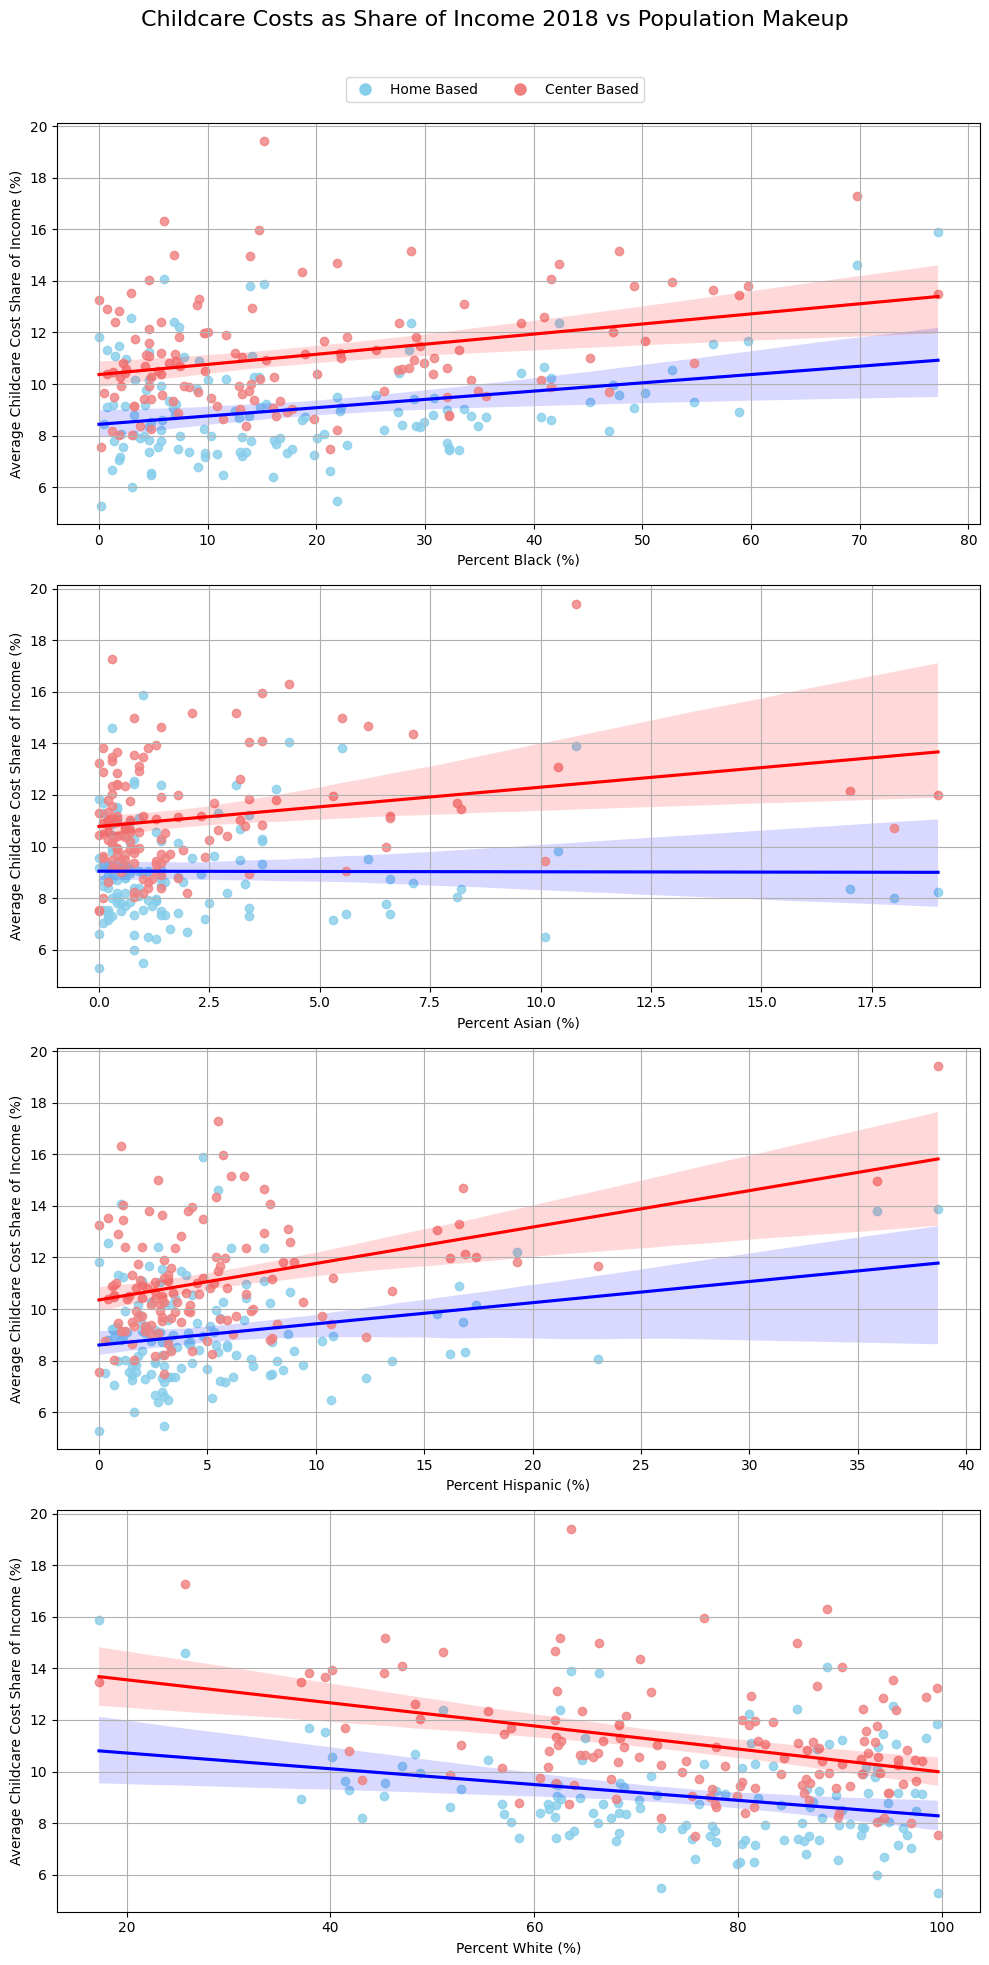

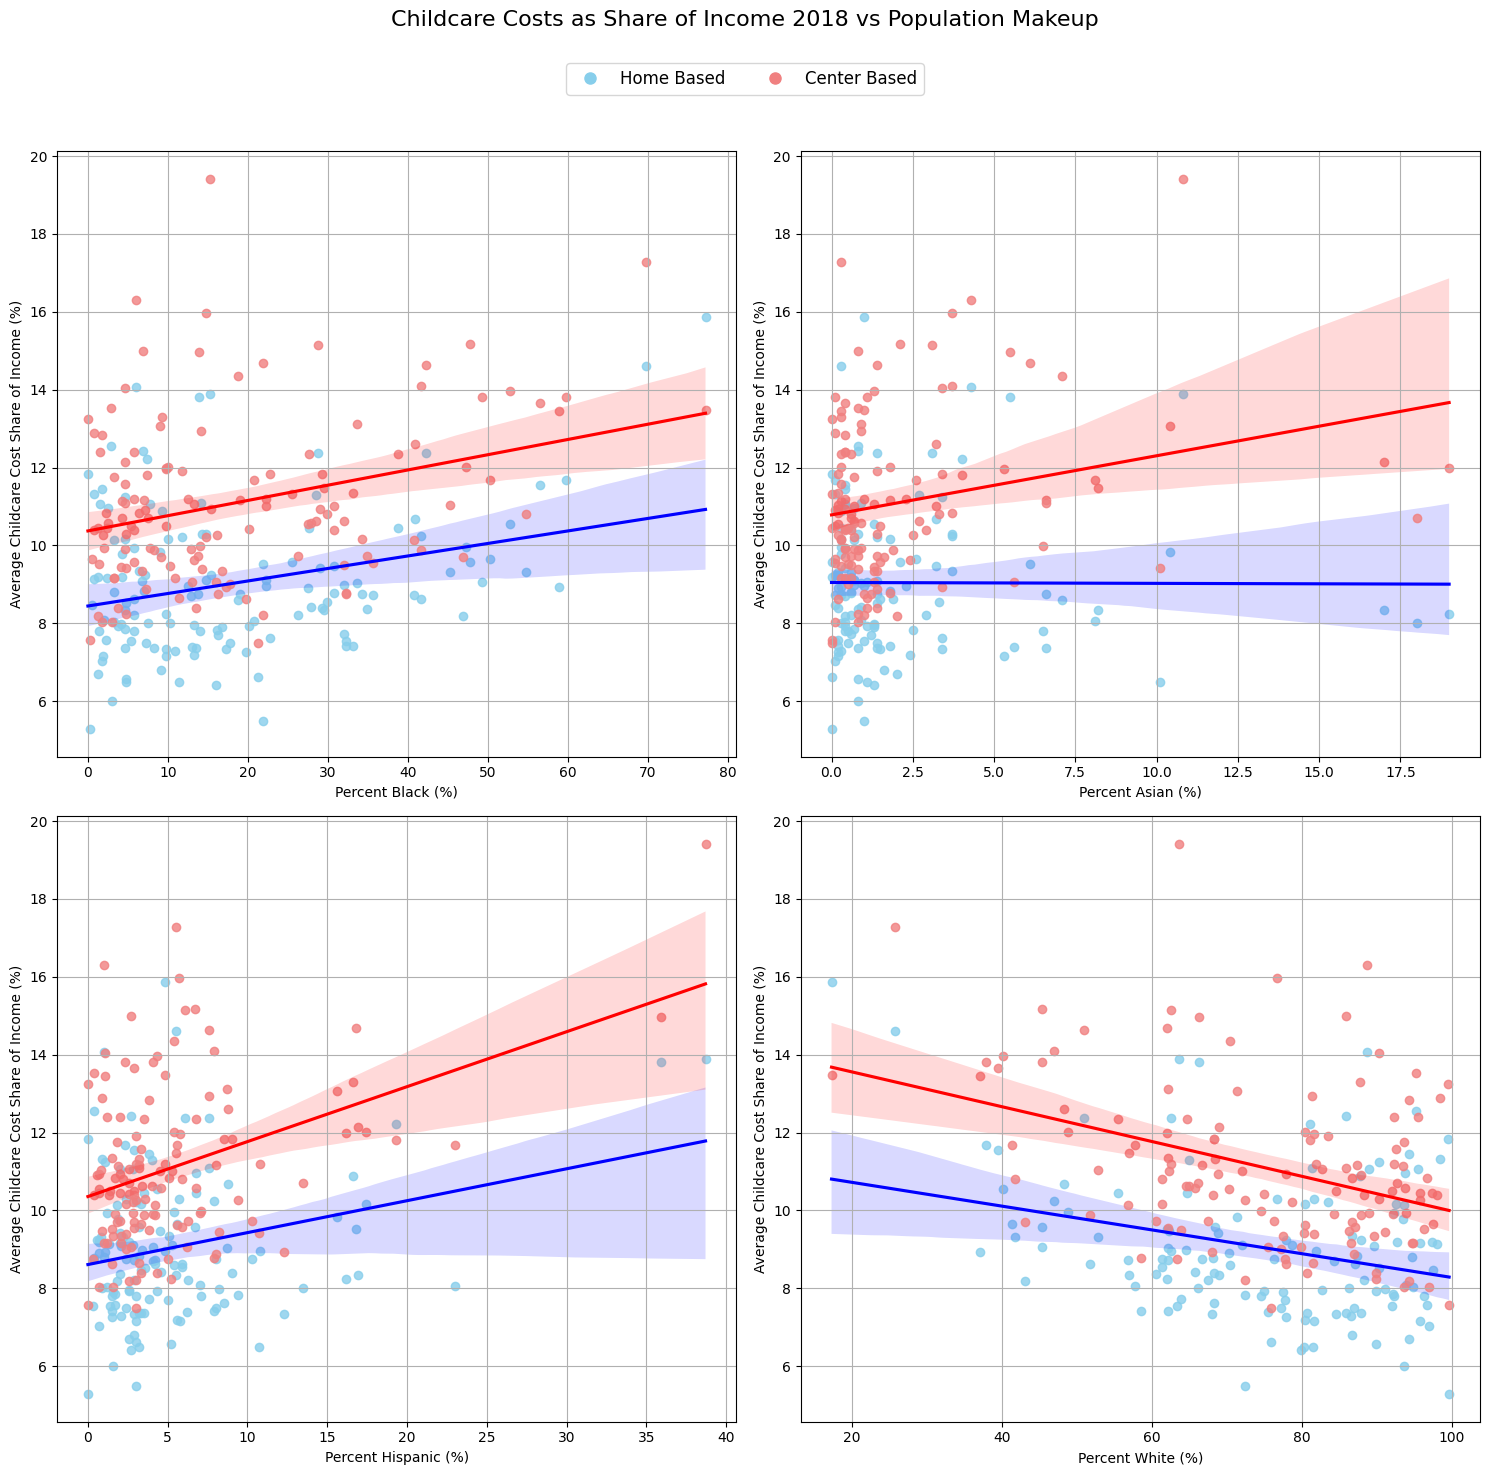

In [ ]:
data = pd.read_excel(file_path, sheet_name='Virginia') # Specify the sheet name
# Calculate the average childcare costs as a share of income
population_childcare_costs = pd.DataFrame()
population_childcare_costs['Average Home Based ChildCare Share of Income 2018'] = data[[
    'Infant home-based price as share of family income: 2018 (%)',
    'Toddler home-based price as share of family income: 2018 (%)',
    'Preschool home-based price as share of family income: 2018 (%)',
    'School-age home-based price as share of family income: 2018 (%)'
]].mean(axis=1)

population_childcare_costs['Average Center Based ChildCare of Income 2018'] = data[[
    'Infant center-based price as share of family income: 2018 (%)',
    'Toddler center-based price as share of family income: 2018 (%)',
    'Preschool center-based price as share of family income: 2018 (%)',
    'School-age center-based price as share of family income: 2018 (%)'
]].mean(axis=1)


# Select and add other columns to the new DataFrame
population_childcare_costs['Percent Black'] = data['Percent Black (%)']
population_childcare_costs['Percent Asian'] = data['Percent Asian (%)']
population_childcare_costs['Percent Hispanic'] = data['Percent Hispanic (of any race) (%)']
population_childcare_costs['Percent White'] = data['Percent White (%)']
# population_childcare_costs

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# #Black

# # Scatter plot for Average Home Based ChildCare Share of Income
# plt.figure(figsize=(10, 6))
# sns.regplot(x='Percent Black', y='Average Home Based ChildCare Share of Income 2018', data=population_childcare_costs,
#             scatter_kws={'color': 'skyblue'}, line_kws={'color': 'blue'})

# # Scatter plot for Average Center Based ChildCare of Income
# sns.regplot(x='Percent Black', y='Average Center Based ChildCare of Income 2018', data=population_childcare_costs,
#             scatter_kws={'color': 'lightcoral'}, line_kws={'color': 'red'})

# # Customize the plot
# plt.title('Childcare Costs as Share of Income 2018 vs. Black Population (%)')
# plt.xlabel('Percent Black (%)')
# plt.ylabel('Average Childcare Cost Share of Income (%)')

# # Add custom legend with dots
# legend_elements = [
#     Line2D([0], [0], marker='o', color='skyblue', label='Home Based', markersize=8, linestyle='None'),
#     Line2D([0], [0], marker='o', color='lightcoral', label='Center Based', markersize=8, linestyle='None')
# ]
# plt.legend(handles=legend_elements, loc='best')

# plt.grid(True)  # Add gridlines
# plt.show()
# Create the figure and subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 20), sharex=False, sharey=False)
fig.suptitle('Childcare Costs as Share of Income 2018 vs Population Makeup', fontsize=16)

# Define the data and configurations for each subplot
plots_data = [
    ('Percent Black', 'Average Home Based ChildCare Share of Income 2018', 'Average Center Based ChildCare of Income 2018', axes[0]),
    ('Percent Asian', 'Average Home Based ChildCare Share of Income 2018', 'Average Center Based ChildCare of Income 2018', axes[1]),
    ('Percent Hispanic', 'Average Home Based ChildCare Share of Income 2018', 'Average Center Based ChildCare of Income 2018', axes[2]),
    ('Percent White', 'Average Home Based ChildCare Share of Income 2018', 'Average Center Based ChildCare of Income 2018', axes[3])
]

# Define the scatter and line colors
home_scatter_color = 'skyblue'
home_line_color = 'blue'
center_scatter_color = 'lightcoral'
center_line_color = 'red'

# Generate each subplot
for x_col, y_home_col, y_center_col, ax in plots_data:
    sns.regplot(x=x_col, y=y_home_col, data=population_childcare_costs,
                scatter_kws={'color': home_scatter_color}, line_kws={'color': home_line_color}, ax=ax)
    sns.regplot(x=x_col, y=y_center_col, data=population_childcare_costs,
                scatter_kws={'color': center_scatter_color}, line_kws={'color': center_line_color}, ax=ax)
    ax.set_xlabel(f'{x_col} (%)')
    ax.set_ylabel('Average Childcare Cost Share of Income (%)')
    ax.grid(True)

# Add a shared legend
legend_elements = [
    Line2D([0], [0], marker='o', color=home_scatter_color, label='Home Based', markersize=8, linestyle='None'),
    Line2D([0], [0], marker='o', color=center_scatter_color, label='Center Based', markersize=8, linestyle='None')
]
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=2, fontsize=10)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#2x2 grid
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Create the figure and subplots in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=False, sharey=False)
fig.suptitle('Childcare Costs as Share of Income 2018 vs Population Makeup', fontsize=16)

# Define the data and configurations for each subplot
plots_data = [
    ('Percent Black', 'Average Home Based ChildCare Share of Income 2018', 'Average Center Based ChildCare of Income 2018', axes[0, 0]),
    ('Percent Asian', 'Average Home Based ChildCare Share of Income 2018', 'Average Center Based ChildCare of Income 2018', axes[0, 1]),
    ('Percent Hispanic', 'Average Home Based ChildCare Share of Income 2018', 'Average Center Based ChildCare of Income 2018', axes[1, 0]),
    ('Percent White', 'Average Home Based ChildCare Share of Income 2018', 'Average Center Based ChildCare of Income 2018', axes[1, 1])
]

# Define the scatter and line colors
home_scatter_color = 'skyblue'
home_line_color = 'blue'
center_scatter_color = 'lightcoral'
center_line_color = 'red'

# Generate each subplot
for x_col, y_home_col, y_center_col, ax in plots_data:
    sns.regplot(x=x_col, y=y_home_col, data=population_childcare_costs,
                scatter_kws={'color': home_scatter_color}, line_kws={'color': home_line_color}, ax=ax)
    sns.regplot(x=x_col, y=y_center_col, data=population_childcare_costs,
                scatter_kws={'color': center_scatter_color}, line_kws={'color': center_line_color}, ax=ax)
    ax.set_xlabel(f'{x_col} (%)')
    ax.set_ylabel('Average Childcare Cost Share of Income (%)')
    ax.grid(True)

# Add a shared legend
legend_elements = [
    Line2D([0], [0], marker='o', color=home_scatter_color, label='Home Based', markersize=8, linestyle='None'),
    Line2D([0], [0], marker='o', color=center_scatter_color, label='Center Based', markersize=8, linestyle='None')
]
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=2, fontsize=12)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


##Impact of Subsidy Expiration on Families

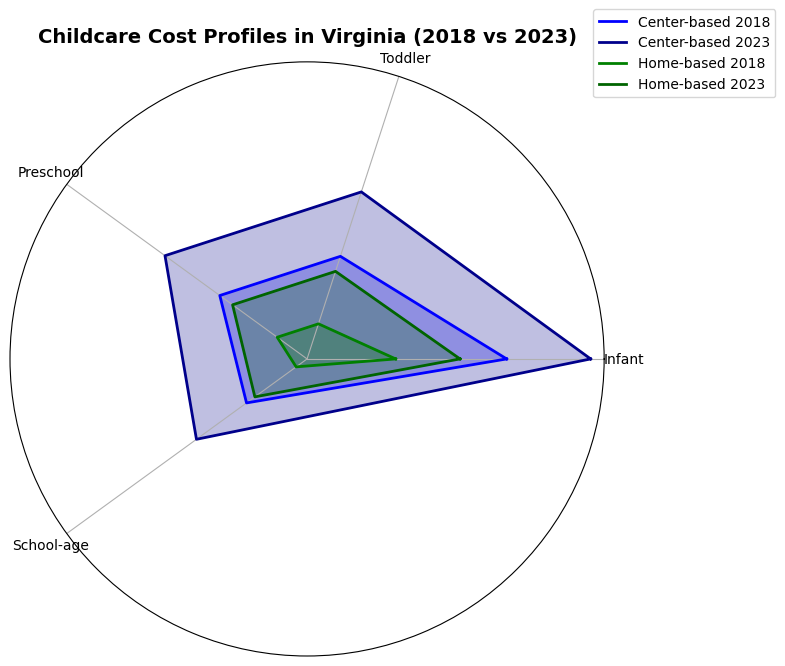

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

data = pd.read_excel(file_path, sheet_name='Virginia') # Specify the sheet name
# Filter and clean relevant columns for the radar chart analysis
relevant_columns = [
    'Infant center-based price: 2018 ($)',
    'Infant center-based price: 2023 (estimated) ($)',
    'Toddler center-based price: 2018 ($)',
    'Toddler center-based price: 2023 (estimated) ($)',
    'Preschool center-based price: 2018 ($)',
    'Preschool center-based price: 2023 (estimated) ($)',
    'School-age center-based price: 2018 ($)',
    'School-age center-based price: 2023 (estimated) ($)',
    'Infant home-based price: 2018 ($)',
    'Infant home-based price: 2023 (estimated) ($)',
    'Toddler home-based price: 2018 ($)',
    'Toddler home-based price: 2023 (estimated) ($)',
    'Preschool home-based price: 2018 ($)',
    'Preschool home-based price: 2023 (estimated) ($)',
    'School-age home-based price: 2018 ($)',
    'School-age home-based price:  2023 (estimated) ($)'
]

filtered_data = data[relevant_columns].mean()

# Organize data into categories
categories = ['Infant', 'Toddler', 'Preschool', 'School-age']

center_based_2018 = [
    filtered_data['Infant center-based price: 2018 ($)'],
    filtered_data['Toddler center-based price: 2018 ($)'],
    filtered_data['Preschool center-based price: 2018 ($)'],
    filtered_data['School-age center-based price: 2018 ($)']
]

center_based_2023 = [
    filtered_data['Infant center-based price: 2023 (estimated) ($)'],
    filtered_data['Toddler center-based price: 2023 (estimated) ($)'],
    filtered_data['Preschool center-based price: 2023 (estimated) ($)'],
    filtered_data['School-age center-based price: 2023 (estimated) ($)']
]

home_based_2018 = [
    filtered_data['Infant home-based price: 2018 ($)'],
    filtered_data['Toddler home-based price: 2018 ($)'],
    filtered_data['Preschool home-based price: 2018 ($)'],
    filtered_data['School-age home-based price: 2018 ($)']
]

home_based_2023 = [
    filtered_data['Infant home-based price: 2023 (estimated) ($)'],
    filtered_data['Toddler home-based price: 2023 (estimated) ($)'],
    filtered_data['Preschool home-based price: 2023 (estimated) ($)'],
    filtered_data['School-age home-based price:  2023 (estimated) ($)']
]

# Add the first category to close the radar chart
categories.append(categories[0])
center_based_2018.append(center_based_2018[0])
center_based_2023.append(center_based_2023[0])
home_based_2018.append(home_based_2018[0])
home_based_2023.append(home_based_2023[0])

# Radar chart setup
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles[len(angles)-1] = angles[0]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot data
ax.plot(angles, center_based_2018, label='Center-based 2018', color='blue', linewidth=2)
ax.fill(angles, center_based_2018, color='blue', alpha=0.25)

ax.plot(angles, center_based_2023, label='Center-based 2023', color='darkblue', linewidth=2)
ax.fill(angles, center_based_2023, color='darkblue', alpha=0.25)

ax.plot(angles, home_based_2018, label='Home-based 2018', color='green', linewidth=2)
ax.fill(angles, home_based_2018, color='green', alpha=0.25)

ax.plot(angles, home_based_2023, label='Home-based 2023', color='darkgreen', linewidth=2)
ax.fill(angles, home_based_2023, color='darkgreen', alpha=0.25)

# Customize the radar chart
ax.set_yticks([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories[0:4], fontsize=10)
ax.set_title('Childcare Cost Profiles in Virginia (2018 vs 2023)', size=14, weight='bold', position=(0.5, 1.1))
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()


##Impact on Women’s Labor Force Participation

<ipython-input-15-69431020defa>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = data.groupby('LFP Bins').agg({


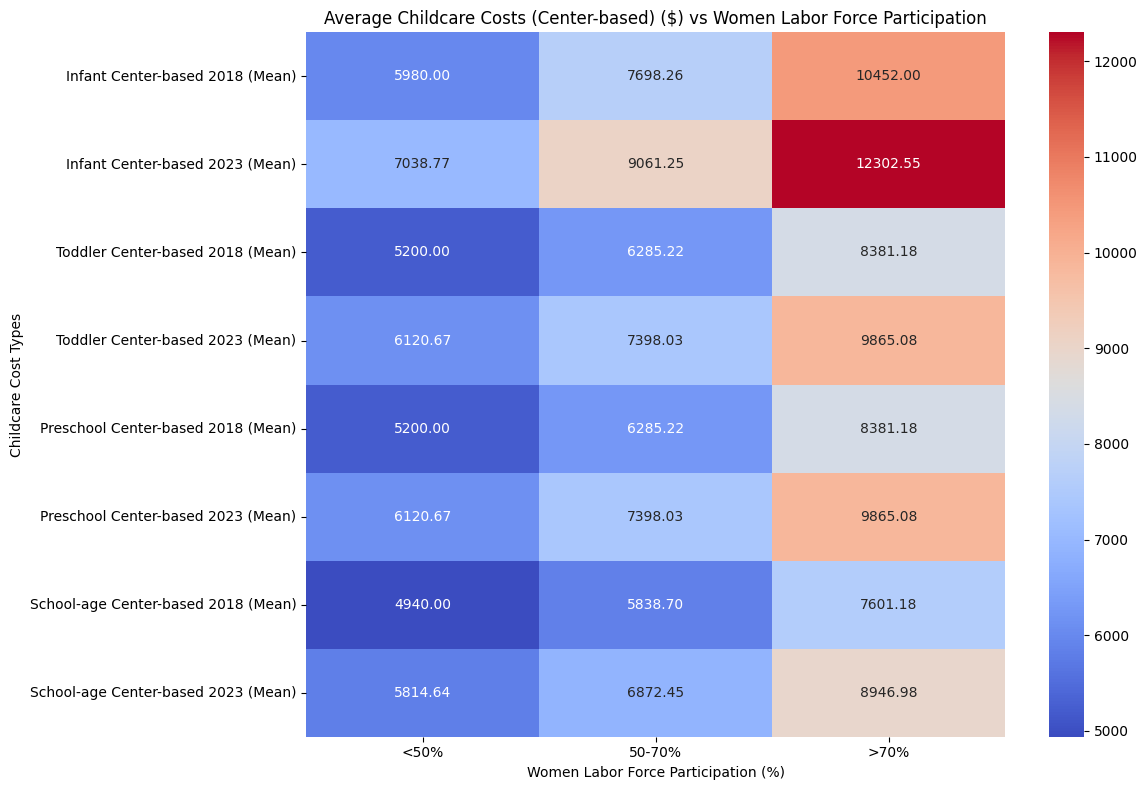

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_excel(file_path, sheet_name='Virginia') # Specify the sheet name
# Define bins for women's labor force participation
lfp_bins = pd.cut(
    data["Women's labor force participation rate (%)"],
    bins=[-float('inf'), 50, 70, float('inf')],
    labels=['<50%', '50-70%', '>70%']
)

# Add the bins as a new column to the data
data['LFP Bins'] = lfp_bins

# Calculate mean childcare costs and counts for each bin, including toddler, preschool, and school-age costs
aggregated_data = data.groupby('LFP Bins').agg({
    'Infant center-based price: 2018 ($)': ['mean', 'count'],
    'Infant center-based price: 2023 (estimated) ($)': ['mean', 'count'],
    'Toddler center-based price: 2018 ($)': ['mean', 'count'],
    'Toddler center-based price: 2023 (estimated) ($)': ['mean', 'count'],
    'Preschool center-based price: 2018 ($)': ['mean', 'count'],
    'Preschool center-based price: 2023 (estimated) ($)': ['mean', 'count'],
    'School-age center-based price: 2018 ($)': ['mean', 'count'],
    'School-age center-based price: 2023 (estimated) ($)': ['mean', 'count']
})

# Rename columns for clarity
aggregated_data.columns = [
    'Infant Center-based 2018 (Mean)', 'Infant Center-based 2018 (Count)',
    'Infant Center-based 2023 (Mean)', 'Infant Center-based 2023 (Count)',
    'Toddler Center-based 2018 (Mean)', 'Toddler Center-based 2018 (Count)',
    'Toddler Center-based 2023 (Mean)', 'Toddler Center-based 2023 (Count)',
    'Preschool Center-based 2018 (Mean)', 'Preschool Center-based 2018 (Count)',
    'Preschool Center-based 2023 (Mean)', 'Preschool Center-based 2023 (Count)',
    'School-age Center-based 2018 (Mean)', 'School-age Center-based 2018 (Count)',
    'School-age Center-based 2023 (Mean)', 'School-age Center-based 2023 (Count)'
]

# Prepare data for heatmap: x-axis (LFP Bins), y-axis (Mean Columns)
heatmap_data = aggregated_data[
    [
        'Infant Center-based 2018 (Mean)', 'Infant Center-based 2023 (Mean)',
        'Toddler Center-based 2018 (Mean)', 'Toddler Center-based 2023 (Mean)',
        'Preschool Center-based 2018 (Mean)', 'Preschool Center-based 2023 (Mean)',
        'School-age Center-based 2018 (Mean)', 'School-age Center-based 2023 (Mean)'
    ]
].transpose()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", cbar=True, fmt=".2f", xticklabels=aggregated_data.index, yticklabels=heatmap_data.index)
plt.title("Average Childcare Costs (Center-based) ($) vs Women Labor Force Participation")
plt.xlabel("Women Labor Force Participation (%)")
plt.ylabel("Childcare Cost Types")
plt.tight_layout()
plt.show()


<ipython-input-16-37ea38ee68a9>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = data.groupby('LFP Bins').agg({


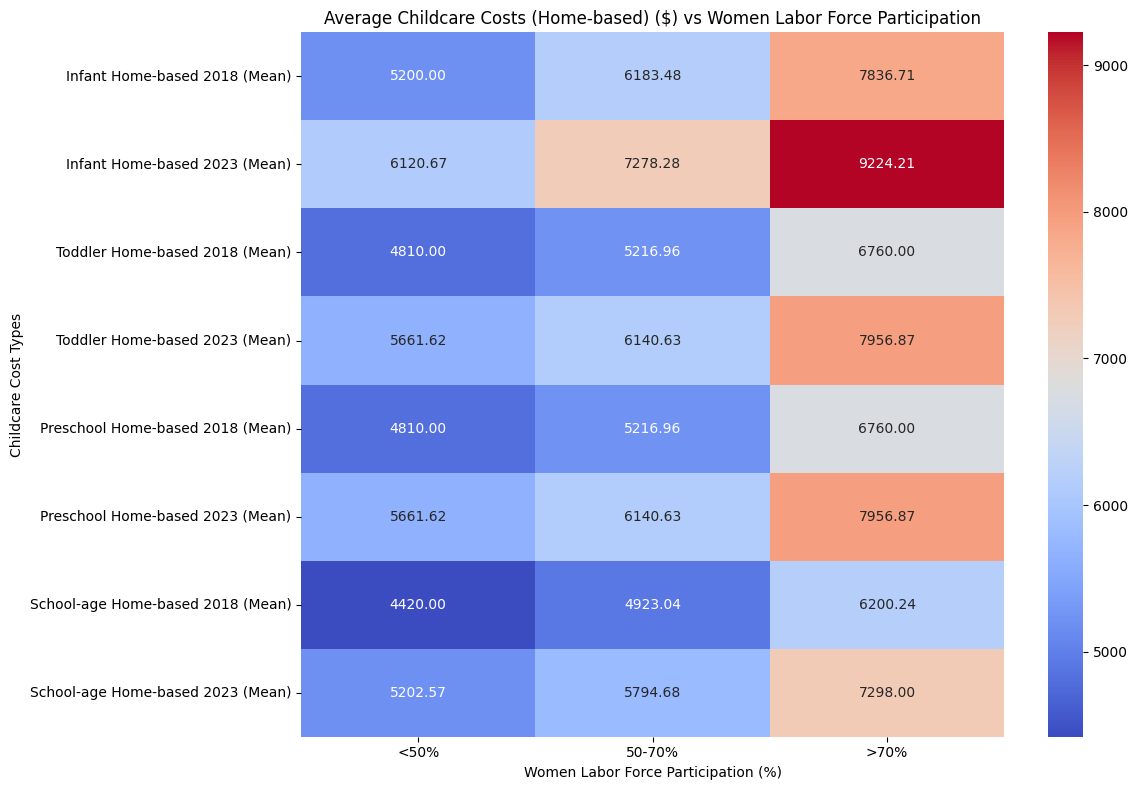

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_excel(file_path, sheet_name='Virginia') # Specify the sheet name
# Define bins for women's labor force participation
lfp_bins = pd.cut(
    data["Women's labor force participation rate (%)"],
    bins=[-float('inf'), 50, 70, float('inf')],
    labels=['<50%', '50-70%', '>70%']
)

# Add the bins as a new column to the data
data['LFP Bins'] = lfp_bins

# Calculate mean childcare costs and counts for each bin, including toddler, preschool, and school-age costs for home-based care
aggregated_data = data.groupby('LFP Bins').agg({
    'Infant home-based price: 2018 ($)': ['mean', 'count'],
    'Infant home-based price: 2023 (estimated) ($)': ['mean', 'count'],
    'Toddler home-based price: 2018 ($)': ['mean', 'count'],
    'Toddler home-based price: 2023 (estimated) ($)': ['mean', 'count'],
    'Preschool home-based price: 2018 ($)': ['mean', 'count'],
    'Preschool home-based price: 2023 (estimated) ($)': ['mean', 'count'],
    'School-age home-based price: 2018 ($)': ['mean', 'count'],
    'School-age home-based price:  2023 (estimated) ($)': ['mean', 'count']
})

# Rename columns for clarity
aggregated_data.columns = [
    'Infant Home-based 2018 (Mean)', 'Infant Home-based 2018 (Count)',
    'Infant Home-based 2023 (Mean)', 'Infant Home-based 2023 (Count)',
    'Toddler Home-based 2018 (Mean)', 'Toddler Home-based 2018 (Count)',
    'Toddler Home-based 2023 (Mean)', 'Toddler Home-based 2023 (Count)',
    'Preschool Home-based 2018 (Mean)', 'Preschool Home-based 2018 (Count)',
    'Preschool Home-based 2023 (Mean)', 'Preschool Home-based 2023 (Count)',
    'School-age Home-based 2018 (Mean)', 'School-age Home-based 2018 (Count)',
    'School-age Home-based 2023 (Mean)', 'School-age Home-based 2023 (Count)'
]

# Prepare data for heatmap: x-axis (LFP Bins), y-axis (Mean Columns)
heatmap_data = aggregated_data[
    [
        'Infant Home-based 2018 (Mean)', 'Infant Home-based 2023 (Mean)',
        'Toddler Home-based 2018 (Mean)', 'Toddler Home-based 2023 (Mean)',
        'Preschool Home-based 2018 (Mean)', 'Preschool Home-based 2023 (Mean)',
        'School-age Home-based 2018 (Mean)', 'School-age Home-based 2023 (Mean)'
    ]
].transpose()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", cbar=True, fmt=".2f", xticklabels=aggregated_data.index, yticklabels=heatmap_data.index)
plt.title("Average Childcare Costs (Home-based) ($) vs Women Labor Force Participation")
plt.xlabel("Women Labor Force Participation (%)")
plt.ylabel("Childcare Cost Types")
plt.tight_layout()
plt.show()


<ipython-input-17-def792e9c278>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = data.groupby('LFP Bins').agg({


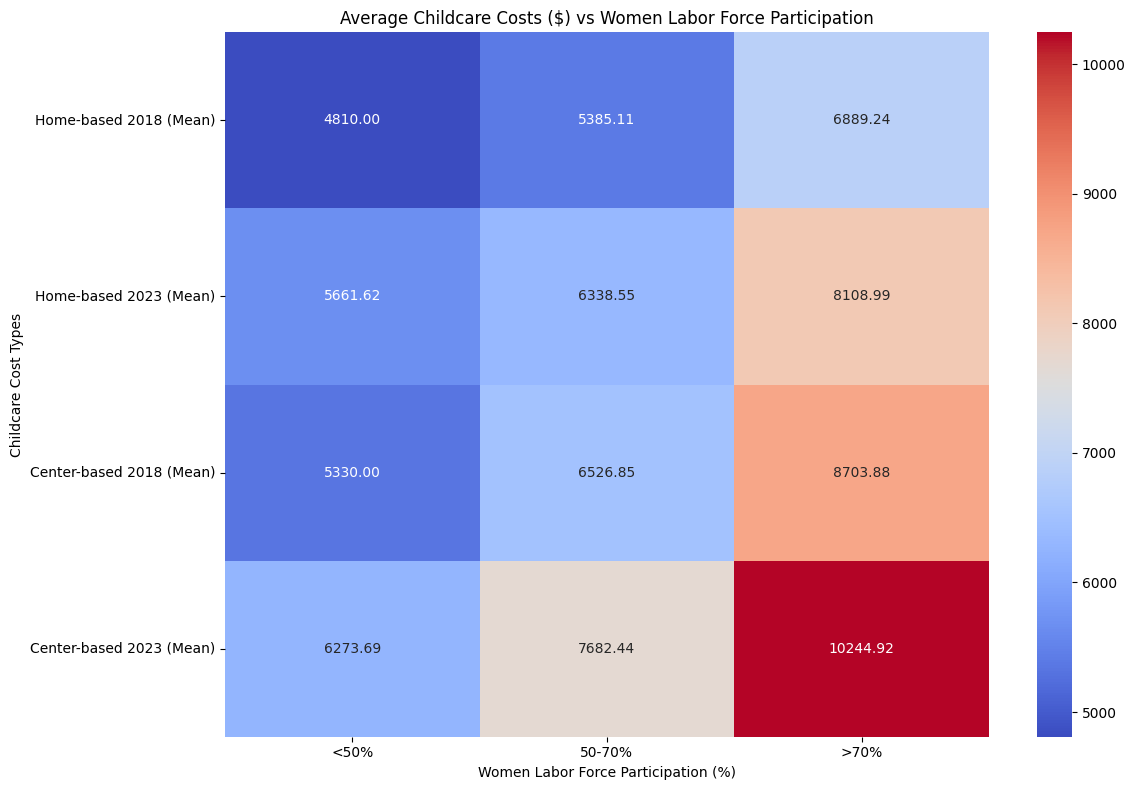

In [ ]:
# Define bins for women's labor force participation
data = pd.read_excel(file_path, sheet_name='Virginia') # Specify the sheet name
lfp_bins = pd.cut(
    data["Women's labor force participation rate (%)"],
    bins=[-float('inf'), 50, 70, float('inf')],
    labels=['<50%', '50-70%', '>70%']
)

# Add the bins as a new column to the data
data['LFP Bins'] = lfp_bins

# Calculate mean childcare costs for each bin, including home-based and center-based costs for all age groups
aggregated_data = data.groupby('LFP Bins').agg({
    'Infant center-based price: 2018 ($)': 'mean',
    'Toddler center-based price: 2018 ($)': 'mean',
    'Preschool center-based price: 2018 ($)': 'mean',
    'School-age center-based price: 2018 ($)': 'mean',
    'Infant center-based price: 2023 (estimated) ($)': 'mean',
    'Toddler center-based price: 2023 (estimated) ($)': 'mean',
    'Preschool center-based price: 2023 (estimated) ($)': 'mean',
    'School-age center-based price: 2023 (estimated) ($)': 'mean',
    'Infant home-based price: 2018 ($)': 'mean',
    'Toddler home-based price: 2018 ($)': 'mean',
    'Preschool home-based price: 2018 ($)': 'mean',
    'School-age home-based price: 2018 ($)': 'mean',
    'Infant home-based price: 2023 (estimated) ($)': 'mean',
    'Toddler home-based price: 2023 (estimated) ($)': 'mean',
    'Preschool home-based price: 2023 (estimated) ($)': 'mean',
    'School-age home-based price:  2023 (estimated) ($)': 'mean'
})

# Calculate average costs for home-based and center-based care across age groups
aggregated_data['Center-based 2018 (Mean)'] = aggregated_data[
    [
        'Infant center-based price: 2018 ($)',
        'Toddler center-based price: 2018 ($)',
        'Preschool center-based price: 2018 ($)',
        'School-age center-based price: 2018 ($)'
    ]
].mean(axis=1)

aggregated_data['Center-based 2023 (Mean)'] = aggregated_data[
    [
        'Infant center-based price: 2023 (estimated) ($)',
        'Toddler center-based price: 2023 (estimated) ($)',
        'Preschool center-based price: 2023 (estimated) ($)',
        'School-age center-based price: 2023 (estimated) ($)'
    ]
].mean(axis=1)

aggregated_data['Home-based 2018 (Mean)'] = aggregated_data[
    [
        'Infant home-based price: 2018 ($)',
        'Toddler home-based price: 2018 ($)',
        'Preschool home-based price: 2018 ($)',
        'School-age home-based price: 2018 ($)'
    ]
].mean(axis=1)

aggregated_data['Home-based 2023 (Mean)'] = aggregated_data[
    [
        'Infant home-based price: 2023 (estimated) ($)',
        'Toddler home-based price: 2023 (estimated) ($)',
        'Preschool home-based price: 2023 (estimated) ($)',
        'School-age home-based price:  2023 (estimated) ($)'
    ]
].mean(axis=1)

# Prepare data for heatmap
heatmap_data = aggregated_data[
    [
        'Home-based 2018 (Mean)', 'Home-based 2023 (Mean)',
        'Center-based 2018 (Mean)', 'Center-based 2023 (Mean)'
    ]
].transpose()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", cbar=True, fmt=".2f", xticklabels=aggregated_data.index, yticklabels=heatmap_data.index)
plt.title("Average Childcare Costs ($) vs Women Labor Force Participation")
plt.xlabel("Women Labor Force Participation (%)")
plt.ylabel("Childcare Cost Types")
plt.tight_layout()
plt.show()



##Poverty and Childcare Affordability

<ipython-input-18-b4b340b30630>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = data.groupby('Poverty Bins').agg({


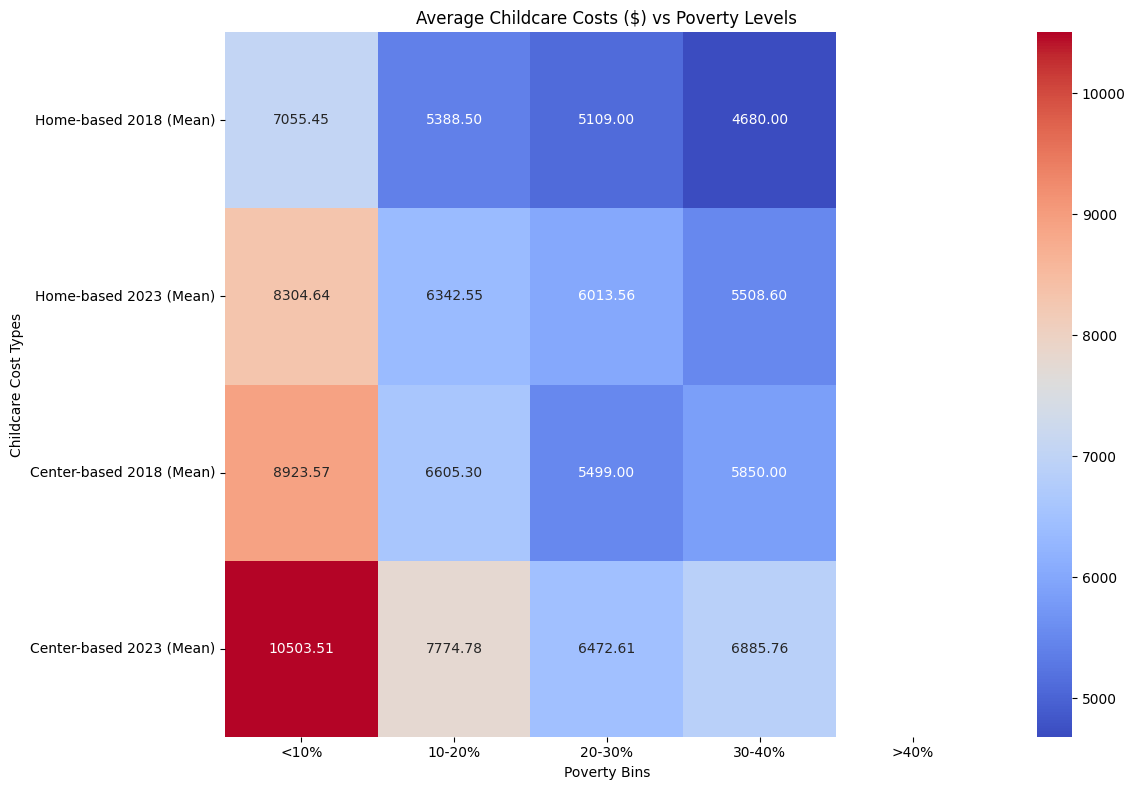

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_excel(file_path, sheet_name='Virginia') # Specify the sheet name
# Define bins for percent of families in poverty
data['Poverty Bins'] = pd.cut(
    data['Percent of families in poverty (%)'],
    bins=[0, 10, 20, 30, 40, float('inf')],
    labels=['<10%', '10-20%', '20-30%', '30-40%', '>40%']
)

# Calculate mean childcare costs for each bin, including home-based and center-based costs for all age groups
aggregated_data = data.groupby('Poverty Bins').agg({
    'Infant center-based price: 2018 ($)': 'mean',
    'Toddler center-based price: 2018 ($)': 'mean',
    'Preschool center-based price: 2018 ($)': 'mean',
    'School-age center-based price: 2018 ($)': 'mean',
    'Infant center-based price: 2023 (estimated) ($)': 'mean',
    'Toddler center-based price: 2023 (estimated) ($)': 'mean',
    'Preschool center-based price: 2023 (estimated) ($)': 'mean',
    'School-age center-based price: 2023 (estimated) ($)': 'mean',
    'Infant home-based price: 2018 ($)': 'mean',
    'Toddler home-based price: 2018 ($)': 'mean',
    'Preschool home-based price: 2018 ($)': 'mean',
    'School-age home-based price: 2018 ($)': 'mean',
    'Infant home-based price: 2023 (estimated) ($)': 'mean',
    'Toddler home-based price: 2023 (estimated) ($)': 'mean',
    'Preschool home-based price: 2023 (estimated) ($)': 'mean',
    'School-age home-based price:  2023 (estimated) ($)': 'mean'
})

# Calculate average costs for home-based and center-based care across age groups
aggregated_data['Center-based 2018 (Mean)'] = aggregated_data[[
    'Infant center-based price: 2018 ($)',
    'Toddler center-based price: 2018 ($)',
    'Preschool center-based price: 2018 ($)',
    'School-age center-based price: 2018 ($)'
]].mean(axis=1)

aggregated_data['Center-based 2023 (Mean)'] = aggregated_data[[
    'Infant center-based price: 2023 (estimated) ($)',
    'Toddler center-based price: 2023 (estimated) ($)',
    'Preschool center-based price: 2023 (estimated) ($)',
    'School-age center-based price: 2023 (estimated) ($)'
]].mean(axis=1)

aggregated_data['Home-based 2018 (Mean)'] = aggregated_data[[
    'Infant home-based price: 2018 ($)',
    'Toddler home-based price: 2018 ($)',
    'Preschool home-based price: 2018 ($)',
    'School-age home-based price: 2018 ($)'
]].mean(axis=1)

aggregated_data['Home-based 2023 (Mean)'] = aggregated_data[[
    'Infant home-based price: 2023 (estimated) ($)',
    'Toddler home-based price: 2023 (estimated) ($)',
    'Preschool home-based price: 2023 (estimated) ($)',
    'School-age home-based price:  2023 (estimated) ($)'
]].mean(axis=1)

# Prepare data for heatmap
heatmap_data = aggregated_data[[
    'Home-based 2018 (Mean)', 'Home-based 2023 (Mean)',
    'Center-based 2018 (Mean)', 'Center-based 2023 (Mean)'
]].transpose()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", cbar=True, fmt=".2f", xticklabels=aggregated_data.index, yticklabels=heatmap_data.index)
plt.title("Average Childcare Costs ($) vs Poverty Levels")
plt.xlabel("Poverty Bins")
plt.ylabel("Childcare Cost Types")
plt.tight_layout()
plt.show()


<ipython-input-19-7afb239ae3e8>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = data.groupby('Poverty Bins').agg({


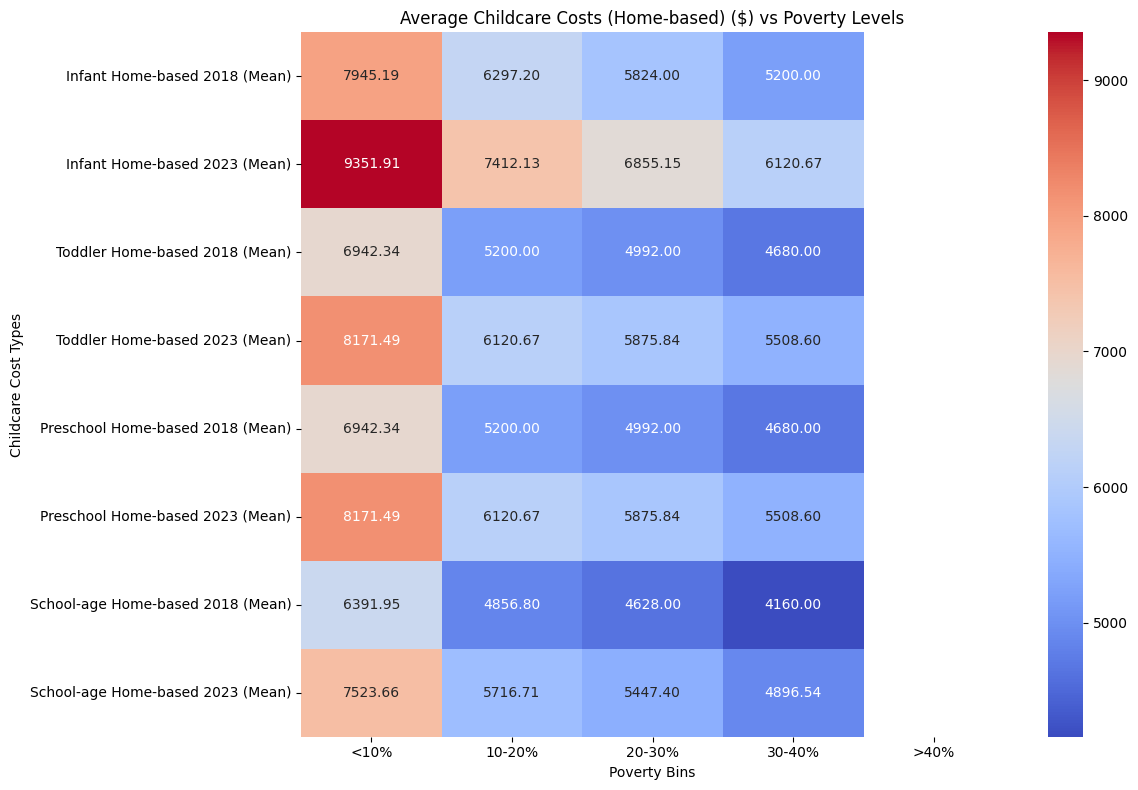

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_excel(file_path, sheet_name='Virginia') # Specify the sheet name
# Define bins for percent of families in poverty
data['Poverty Bins'] = pd.cut(
    data['Percent of families in poverty (%)'],
    bins=[0, 10, 20, 30, 40, float('inf')],
    labels=['<10%', '10-20%', '20-30%', '30-40%', '>40%']
)

# Calculate mean childcare costs and counts for each bin, including toddler, preschool, and school-age costs for home-based care
aggregated_data = data.groupby('Poverty Bins').agg({
    'Infant home-based price: 2018 ($)': ['mean', 'count'],
    'Infant home-based price: 2023 (estimated) ($)': ['mean', 'count'],
    'Toddler home-based price: 2018 ($)': ['mean', 'count'],
    'Toddler home-based price: 2023 (estimated) ($)': ['mean', 'count'],
    'Preschool home-based price: 2018 ($)': ['mean', 'count'],
    'Preschool home-based price: 2023 (estimated) ($)': ['mean', 'count'],
    'School-age home-based price: 2018 ($)': ['mean', 'count'],
    'School-age home-based price:  2023 (estimated) ($)': ['mean', 'count']
})

# Rename columns for clarity
aggregated_data.columns = [
    'Infant Home-based 2018 (Mean)', 'Infant Home-based 2018 (Count)',
    'Infant Home-based 2023 (Mean)', 'Infant Home-based 2023 (Count)',
    'Toddler Home-based 2018 (Mean)', 'Toddler Home-based 2018 (Count)',
    'Toddler Home-based 2023 (Mean)', 'Toddler Home-based 2023 (Count)',
    'Preschool Home-based 2018 (Mean)', 'Preschool Home-based 2018 (Count)',
    'Preschool Home-based 2023 (Mean)', 'Preschool Home-based 2023 (Count)',
    'School-age Home-based 2018 (Mean)', 'School-age Home-based 2018 (Count)',
    'School-age Home-based 2023 (Mean)', 'School-age Home-based 2023 (Count)'
]

# Prepare data for heatmap: x-axis (Poverty Bins), y-axis (Mean Columns)
heatmap_data = aggregated_data[[
    'Infant Home-based 2018 (Mean)', 'Infant Home-based 2023 (Mean)',
    'Toddler Home-based 2018 (Mean)', 'Toddler Home-based 2023 (Mean)',
    'Preschool Home-based 2018 (Mean)', 'Preschool Home-based 2023 (Mean)',
    'School-age Home-based 2018 (Mean)', 'School-age Home-based 2023 (Mean)'
]].transpose()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", cbar=True, fmt=".2f", xticklabels=aggregated_data.index, yticklabels=heatmap_data.index)
plt.title("Average Childcare Costs (Home-based) ($) vs Poverty Levels")
plt.xlabel("Poverty Bins")
plt.ylabel("Childcare Cost Types")
plt.tight_layout()
plt.show()


<ipython-input-20-2b11548b699c>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = data.groupby('Poverty Bins').agg({


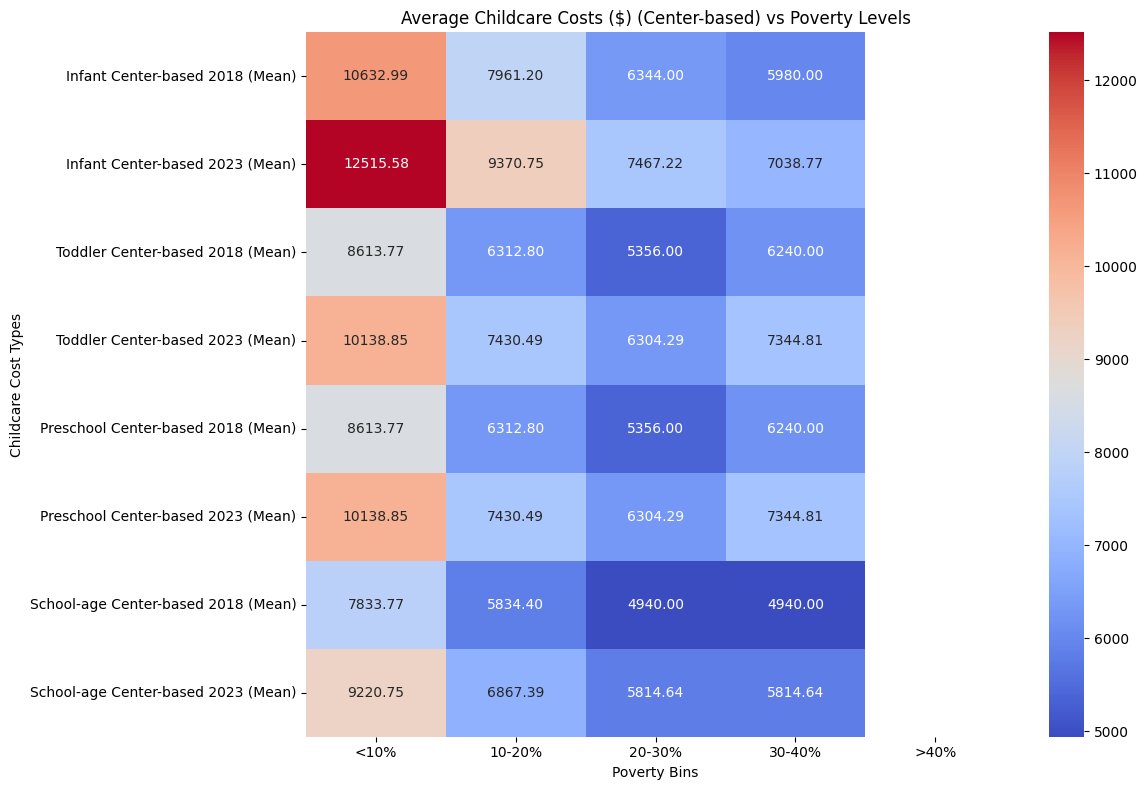

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_excel(file_path, sheet_name='Virginia') # Specify the sheet name
# Define bins for percent of families in poverty
data['Poverty Bins'] = pd.cut(
    data['Percent of families in poverty (%)'],
    bins=[0, 10, 20, 30, 40, float('inf')],
    labels=['<10%', '10-20%', '20-30%', '30-40%', '>40%']
)

# Calculate mean childcare costs and counts for each bin, including toddler, preschool, and school-age costs for center-based care
aggregated_data = data.groupby('Poverty Bins').agg({
    'Infant center-based price: 2018 ($)': ['mean', 'count'],
    'Infant center-based price: 2023 (estimated) ($)': ['mean', 'count'],
    'Toddler center-based price: 2018 ($)': ['mean', 'count'],
    'Toddler center-based price: 2023 (estimated) ($)': ['mean', 'count'],
    'Preschool center-based price: 2018 ($)': ['mean', 'count'],
    'Preschool center-based price: 2023 (estimated) ($)': ['mean', 'count'],
    'School-age center-based price: 2018 ($)': ['mean', 'count'],
    'School-age center-based price: 2023 (estimated) ($)': ['mean', 'count']
})

# Rename columns for clarity
aggregated_data.columns = [
    'Infant Center-based 2018 (Mean)', 'Infant Center-based 2018 (Count)',
    'Infant Center-based 2023 (Mean)', 'Infant Center-based 2023 (Count)',
    'Toddler Center-based 2018 (Mean)', 'Toddler Center-based 2018 (Count)',
    'Toddler Center-based 2023 (Mean)', 'Toddler Center-based 2023 (Count)',
    'Preschool Center-based 2018 (Mean)', 'Preschool Center-based 2018 (Count)',
    'Preschool Center-based 2023 (Mean)', 'Preschool Center-based 2023 (Count)',
    'School-age Center-based 2018 (Mean)', 'School-age Center-based 2018 (Count)',
    'School-age Center-based 2023 (Mean)', 'School-age Center-based 2023 (Count)'
]

# Prepare data for heatmap: x-axis (Poverty Bins), y-axis (Mean Columns)
heatmap_data = aggregated_data[[
    'Infant Center-based 2018 (Mean)', 'Infant Center-based 2023 (Mean)',
    'Toddler Center-based 2018 (Mean)', 'Toddler Center-based 2023 (Mean)',
    'Preschool Center-based 2018 (Mean)', 'Preschool Center-based 2023 (Mean)',
    'School-age Center-based 2018 (Mean)', 'School-age Center-based 2023 (Mean)'
]].transpose()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", cbar=True, fmt=".2f", xticklabels=aggregated_data.index, yticklabels=heatmap_data.index)
plt.title("Average Childcare Costs ($) (Center-based) vs Poverty Levels")
plt.xlabel("Poverty Bins")
plt.ylabel("Childcare Cost Types")
plt.tight_layout()
plt.show()


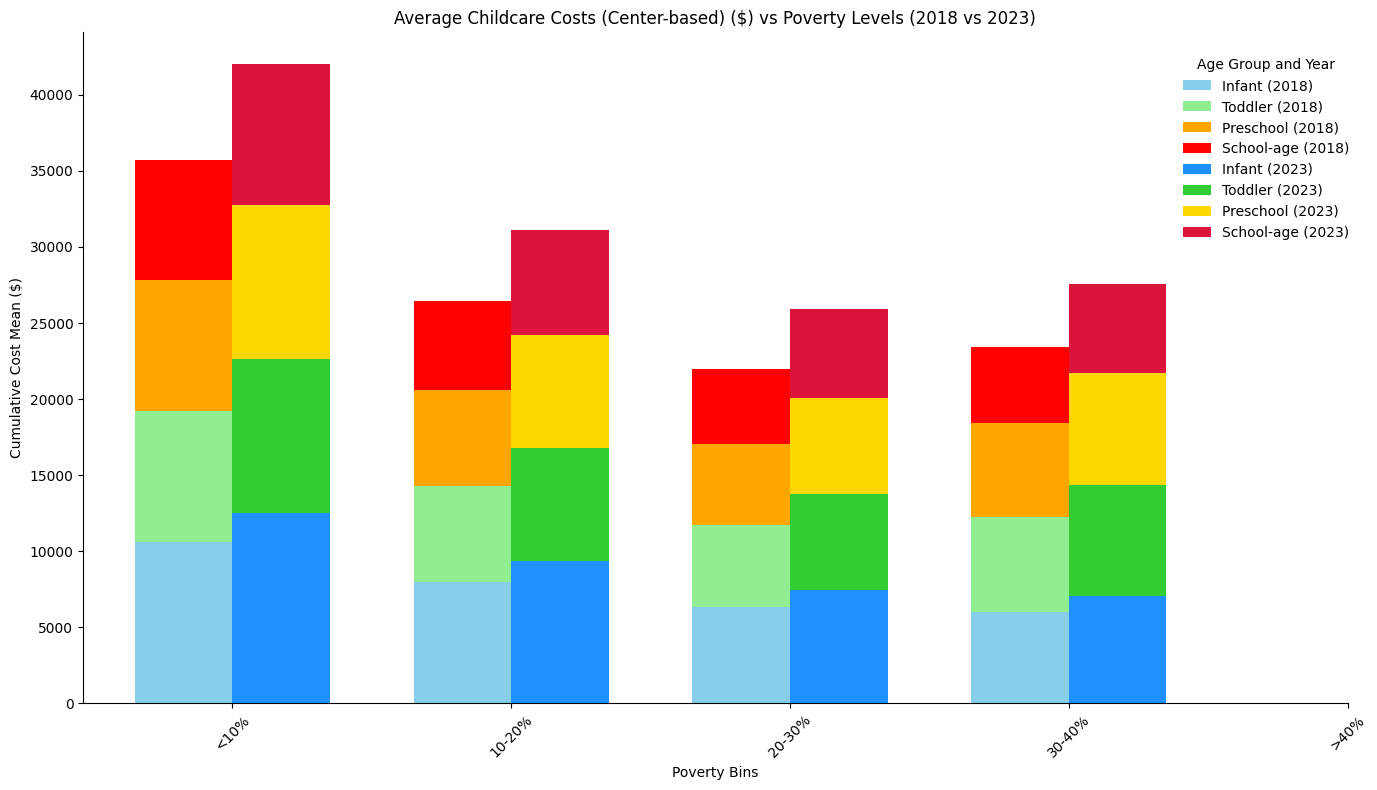

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_excel(file_path, sheet_name='Virginia') # Specify the sheet name
# Prepare data for stacked bar chart for both 2018 and 2023
stacked_bar_data_2018 = aggregated_data[[
    'Infant Center-based 2018 (Mean)', 'Toddler Center-based 2018 (Mean)',
    'Preschool Center-based 2018 (Mean)', 'School-age Center-based 2018 (Mean)'
]].transpose()

stacked_bar_data_2023 = aggregated_data[[
    'Infant Center-based 2023 (Mean)', 'Toddler Center-based 2023 (Mean)',
    'Preschool Center-based 2023 (Mean)', 'School-age Center-based 2023 (Mean)'
]].transpose()

# Define X-axis (poverty bins) and Y-axis (cumulative costs by age group)
x = np.arange(len(aggregated_data.index))  # Poverty bins indices
width = 0.35  # Width of the bars

# Plot for 2018
fig, ax = plt.subplots(figsize=(14, 8))
ax.bar(x - width / 2, stacked_bar_data_2018.loc['Infant Center-based 2018 (Mean)'], width, label='Infant (2018)', color='skyblue')
ax.bar(x - width / 2, stacked_bar_data_2018.loc['Toddler Center-based 2018 (Mean)'], width,
       bottom=stacked_bar_data_2018.loc['Infant Center-based 2018 (Mean)'], label='Toddler (2018)', color='lightgreen')
ax.bar(x - width / 2, stacked_bar_data_2018.loc['Preschool Center-based 2018 (Mean)'], width,
       bottom=stacked_bar_data_2018.loc['Infant Center-based 2018 (Mean)'] +
              stacked_bar_data_2018.loc['Toddler Center-based 2018 (Mean)'], label='Preschool (2018)', color='orange')
ax.bar(x - width / 2, stacked_bar_data_2018.loc['School-age Center-based 2018 (Mean)'], width,
       bottom=stacked_bar_data_2018.loc['Infant Center-based 2018 (Mean)'] +
              stacked_bar_data_2018.loc['Toddler Center-based 2018 (Mean)'] +
              stacked_bar_data_2018.loc['Preschool Center-based 2018 (Mean)'], label='School-age (2018)', color='red')

# Plot for 2023
ax.bar(x + width / 2, stacked_bar_data_2023.loc['Infant Center-based 2023 (Mean)'], width, label='Infant (2023)', color='dodgerblue')
ax.bar(x + width / 2, stacked_bar_data_2023.loc['Toddler Center-based 2023 (Mean)'], width,
       bottom=stacked_bar_data_2023.loc['Infant Center-based 2023 (Mean)'], label='Toddler (2023)', color='limegreen')
ax.bar(x + width / 2, stacked_bar_data_2023.loc['Preschool Center-based 2023 (Mean)'], width,
       bottom=stacked_bar_data_2023.loc['Infant Center-based 2023 (Mean)'] +
              stacked_bar_data_2023.loc['Toddler Center-based 2023 (Mean)'], label='Preschool (2023)', color='gold')
ax.bar(x + width / 2, stacked_bar_data_2023.loc['School-age Center-based 2023 (Mean)'], width,
       bottom=stacked_bar_data_2023.loc['Infant Center-based 2023 (Mean)'] +
              stacked_bar_data_2023.loc['Toddler Center-based 2023 (Mean)'] +
              stacked_bar_data_2023.loc['Preschool Center-based 2023 (Mean)'], label='School-age (2023)', color='crimson')

# Customize the chart
ax.set_title('Average Childcare Costs (Center-based) ($) vs Poverty Levels (2018 vs 2023)')
ax.set_xlabel('Poverty Bins')
ax.set_ylabel('Cumulative Cost Mean ($)')
ax.set_xticks(x)
ax.set_xticklabels(aggregated_data.index, rotation=45)
# Adjust legend to be within the plot
ax.legend(title='Age Group and Year', loc='upper left', bbox_to_anchor=(0.86, 0.98), frameon=False)

# Remove top and right frame lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-22-220bb9b7c02b>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = data.groupby('Poverty Bins').agg({


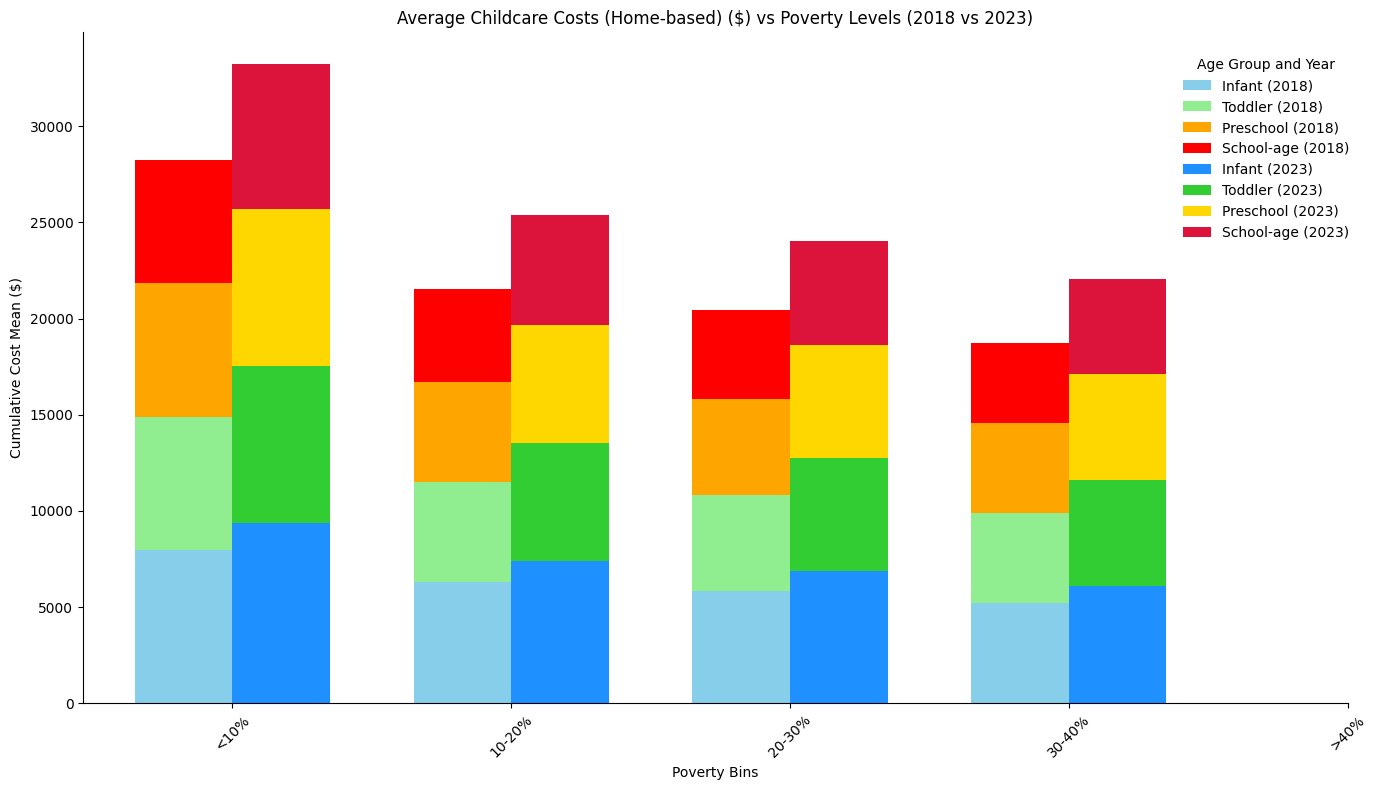

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Define bins for percent of families in poverty
data = pd.read_excel(file_path, sheet_name='Virginia') # Specify the sheet name
data['Poverty Bins'] = pd.cut(
    data['Percent of families in poverty (%)'],
    bins=[0, 10, 20, 30, 40, float('inf')],
    labels=['<10%', '10-20%', '20-30%', '30-40%', '>40%']
)

# Calculate mean childcare costs and counts for each bin, including toddler, preschool, and school-age costs for home-based care
aggregated_data = data.groupby('Poverty Bins').agg({
    'Infant home-based price: 2018 ($)': ['mean', 'count'],
    'Infant home-based price: 2023 (estimated) ($)': ['mean', 'count'],
    'Toddler home-based price: 2018 ($)': ['mean', 'count'],
    'Toddler home-based price: 2023 (estimated) ($)': ['mean', 'count'],
    'Preschool home-based price: 2018 ($)': ['mean', 'count'],
    'Preschool home-based price: 2023 (estimated) ($)': ['mean', 'count'],
    'School-age home-based price: 2018 ($)': ['mean', 'count'],
    'School-age home-based price:  2023 (estimated) ($)': ['mean', 'count']
})

# Rename columns for clarity
aggregated_data.columns = [
    'Infant Home-based 2018 (Mean)', 'Infant Home-based 2018 (Count)',
    'Infant Home-based 2023 (Mean)', 'Infant Home-based 2023 (Count)',
    'Toddler Home-based 2018 (Mean)', 'Toddler Home-based 2018 (Count)',
    'Toddler Home-based 2023 (Mean)', 'Toddler Home-based 2023 (Count)',
    'Preschool Home-based 2018 (Mean)', 'Preschool Home-based 2018 (Count)',
    'Preschool Home-based 2023 (Mean)', 'Preschool Home-based 2023 (Count)',
    'School-age Home-based 2018 (Mean)', 'School-age Home-based 2018 (Count)',
    'School-age Home-based 2023 (Mean)', 'School-age Home-based 2023 (Count)'
]
# Prepare data for stacked bar chart for both 2018 and 2023 (Home-based)
stacked_bar_data_2018 = aggregated_data[[
    'Infant Home-based 2018 (Mean)', 'Toddler Home-based 2018 (Mean)',
    'Preschool Home-based 2018 (Mean)', 'School-age Home-based 2018 (Mean)'
]].transpose()

stacked_bar_data_2023 = aggregated_data[[
    'Infant Home-based 2023 (Mean)', 'Toddler Home-based 2023 (Mean)',
    'Preschool Home-based 2023 (Mean)', 'School-age Home-based 2023 (Mean)'
]].transpose()

# Define X-axis (poverty bins) and Y-axis (cumulative costs by age group)
x = np.arange(len(aggregated_data.index))  # Poverty bins indices
width = 0.35  # Width of the bars

# Plot for 2018
fig, ax = plt.subplots(figsize=(14, 8))
ax.bar(x - width / 2, stacked_bar_data_2018.loc['Infant Home-based 2018 (Mean)'], width, label='Infant (2018)', color='skyblue')
ax.bar(x - width / 2, stacked_bar_data_2018.loc['Toddler Home-based 2018 (Mean)'], width,
       bottom=stacked_bar_data_2018.loc['Infant Home-based 2018 (Mean)'], label='Toddler (2018)', color='lightgreen')
ax.bar(x - width / 2, stacked_bar_data_2018.loc['Preschool Home-based 2018 (Mean)'], width,
       bottom=stacked_bar_data_2018.loc['Infant Home-based 2018 (Mean)'] +
              stacked_bar_data_2018.loc['Toddler Home-based 2018 (Mean)'], label='Preschool (2018)', color='orange')
ax.bar(x - width / 2, stacked_bar_data_2018.loc['School-age Home-based 2018 (Mean)'], width,
       bottom=stacked_bar_data_2018.loc['Infant Home-based 2018 (Mean)'] +
              stacked_bar_data_2018.loc['Toddler Home-based 2018 (Mean)'] +
              stacked_bar_data_2018.loc['Preschool Home-based 2018 (Mean)'], label='School-age (2018)', color='red')

# Plot for 2023
ax.bar(x + width / 2, stacked_bar_data_2023.loc['Infant Home-based 2023 (Mean)'], width, label='Infant (2023)', color='dodgerblue')
ax.bar(x + width / 2, stacked_bar_data_2023.loc['Toddler Home-based 2023 (Mean)'], width,
       bottom=stacked_bar_data_2023.loc['Infant Home-based 2023 (Mean)'], label='Toddler (2023)', color='limegreen')
ax.bar(x + width / 2, stacked_bar_data_2023.loc['Preschool Home-based 2023 (Mean)'], width,
       bottom=stacked_bar_data_2023.loc['Infant Home-based 2023 (Mean)'] +
              stacked_bar_data_2023.loc['Toddler Home-based 2023 (Mean)'], label='Preschool (2023)', color='gold')
ax.bar(x + width / 2, stacked_bar_data_2023.loc['School-age Home-based 2023 (Mean)'], width,
       bottom=stacked_bar_data_2023.loc['Infant Home-based 2023 (Mean)'] +
              stacked_bar_data_2023.loc['Toddler Home-based 2023 (Mean)'] +
              stacked_bar_data_2023.loc['Preschool Home-based 2023 (Mean)'], label='School-age (2023)', color='crimson')

# Customize the chart
ax.set_title('Average Childcare Costs (Home-based) ($) vs Poverty Levels (2018 vs 2023)')
ax.set_xlabel('Poverty Bins')
ax.set_ylabel('Cumulative Cost Mean ($)')
ax.set_xticks(x)
ax.set_xticklabels(aggregated_data.index, rotation=45)
# Adjust legend to be within the plot
ax.legend(title='Age Group and Year', loc='upper left', bbox_to_anchor=(0.86, 0.98), frameon=False)

# Remove top and right frame lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Show the plot
plt.tight_layout()
plt.show()


##Regional Comparisons (Norfolk, Henrico, and Accomack)

In [ ]:
data = pd.read_excel(file_path, sheet_name='Virginia') # Specify the sheet name
reg_data = data[data['County name'].isin(['Accomack County', 'Henrico County', 'Norfolk city'])]
# reg_data.to_csv('regional_data.csv')

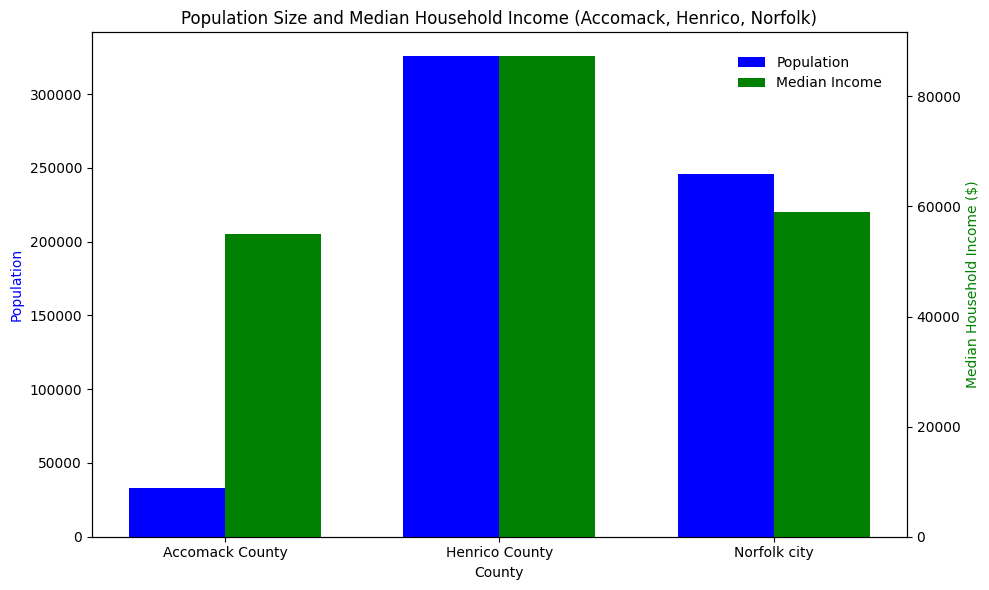

In [ ]:
# Extract population size and median income for the selected counties
reg_data = data[data['County name'].isin(['Accomack County', 'Henrico County', 'Norfolk city'])]
population_sizes = reg_data.set_index('County name')['Total population']
median_incomes = reg_data.set_index('County name')['Median family income ($)']

# Define counties
counties = population_sizes.index

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set the bar width
bar_width = 0.35
index = np.arange(len(counties))

# Plot population bars
pop_bars = ax1.bar(index, population_sizes, bar_width, label='Population', color='b')

# Create a second y-axis for the median income
ax2 = ax1.twinx()
income_bars = ax2.bar(index + bar_width, median_incomes, bar_width, label='Median Income', color='g')

# Set labels and titles
ax1.set_xlabel('County')
ax1.set_ylabel('Population', color='b')
ax2.set_ylabel('Median Household Income ($)', color='g')
plt.title('Population Size and Median Household Income (Accomack, Henrico, Norfolk)')

# Set x-ticks
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(counties)

# Add legends
# fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

# Adjust legend to be within the plot
fig.legend(loc='upper left', bbox_to_anchor=(0.73, 0.92), frameon=False)


# Display the plot
plt.tight_layout()
plt.show()

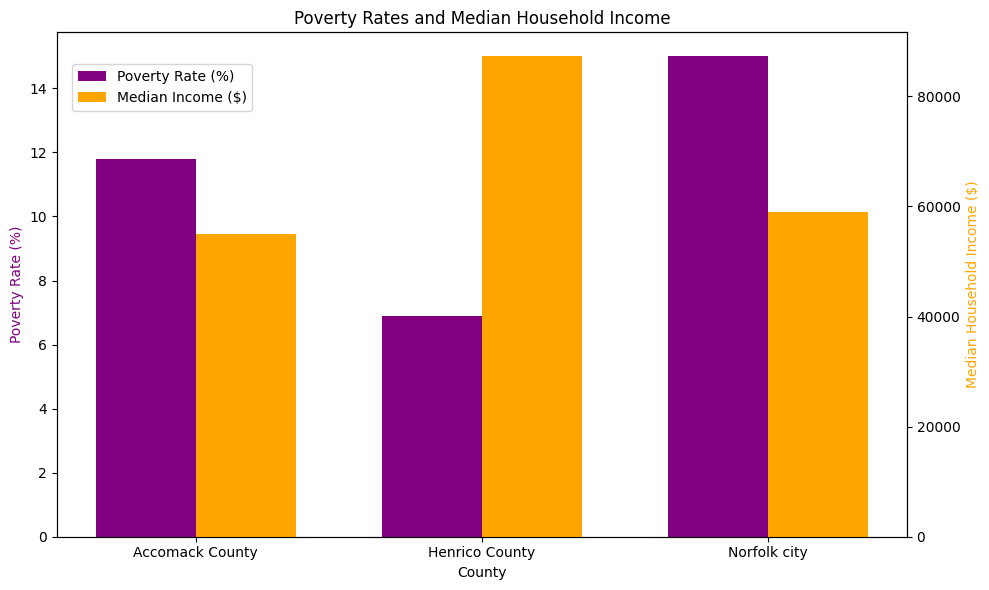

In [ ]:
# Extract poverty rates and median income for the selected counties
reg_data = data[data['County name'].isin(['Accomack County', 'Henrico County', 'Norfolk city'])]
poverty_rates = reg_data.set_index('County name')['Percent of families in poverty (%)']
median_incomes = reg_data.set_index('County name')['Median family income ($)']

# Define counties
counties = poverty_rates.index

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set the bar width
bar_width = 0.35
index = np.arange(len(counties))

# Plot poverty rate bars
poverty_bars = ax1.bar(index, poverty_rates, bar_width, label='Poverty Rate (%)', color='purple')

# Create a second y-axis for the median income
ax2 = ax1.twinx()
income_bars = ax2.bar(index + bar_width, median_incomes, bar_width, label='Median Income ($)', color='orange')

# Set labels and titles
ax1.set_xlabel('County')
ax1.set_ylabel('Poverty Rate (%)', color='purple')
ax2.set_ylabel('Median Household Income ($)', color='orange')
plt.title('Poverty Rates and Median Household Income')

# Set x-ticks
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(counties)

# Add legends
fig.legend(loc='upper left', bbox_to_anchor=(0.01, 0.95), bbox_transform=ax1.transAxes)

# Display the plot
plt.tight_layout()
plt.show()


<ipython-input-26-9f7e53abcfe4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data['Avg_Center_Based_2018'] = reg_data[[
<ipython-input-26-9f7e53abcfe4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data['Avg_Home_Based_2018'] = reg_data[[
<ipython-input-26-9f7e53abcfe4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

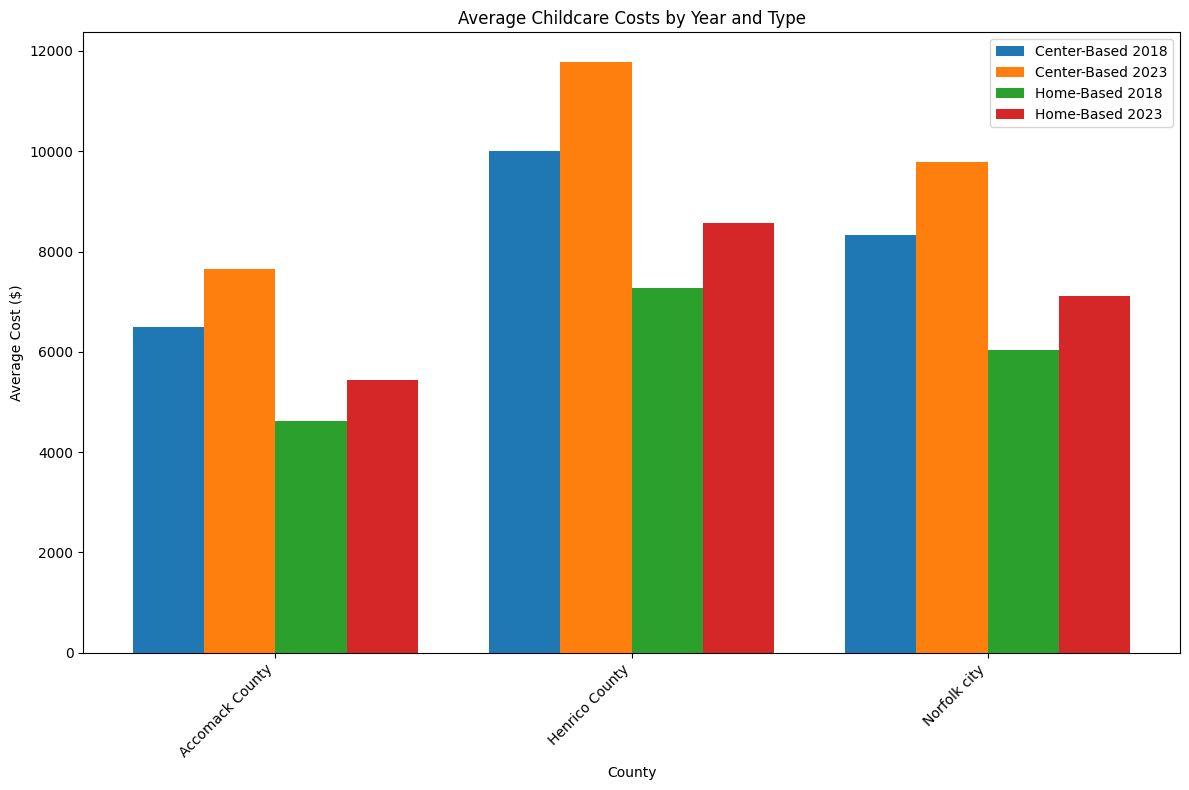

In [ ]:

reg_data = data[data['County name'].isin(['Accomack County', 'Henrico County', 'Norfolk city'])]
# Calculate average center-based childcare costs for 2018
reg_data['Avg_Center_Based_2018'] = reg_data[[
    'Infant center-based price: 2018 ($)',
    'Toddler center-based price: 2018 ($)',
    'Preschool center-based price: 2018 ($)',
    'School-age center-based price: 2018 ($)'
]].mean(axis=1)

# Calculate average home-based childcare costs for 2018
reg_data['Avg_Home_Based_2018'] = reg_data[[
    'Infant home-based price: 2018 ($)',
    'Toddler home-based price: 2018 ($)',
    'Preschool home-based price: 2018 ($)',
    'School-age home-based price: 2018 ($)'
]].mean(axis=1)


# Calculate average center-based childcare costs for 2023
reg_data['Avg_Center_Based_2023'] = reg_data[[
    'Infant center-based price: 2023 (estimated) ($)',
    'Toddler center-based price: 2023 (estimated) ($)',
    'Preschool center-based price: 2023 (estimated) ($)',
    'School-age center-based price: 2023 (estimated) ($)'
]].mean(axis=1)

# Calculate average home-based childcare costs for 2023
reg_data['Avg_Home_Based_2023'] = reg_data[[
    'Infant home-based price: 2023 (estimated) ($)',
    'Toddler home-based price: 2023 (estimated) ($)',
    'Preschool home-based price: 2023 (estimated) ($)',
    'School-age home-based price:  2023 (estimated) ($)'
]].mean(axis=1)

# Extracting relevant data for visualization
selected_counties = reg_data[['County name', 'Avg_Center_Based_2018', 'Avg_Home_Based_2018',
                          'Avg_Center_Based_2023', 'Avg_Home_Based_2023']]

# Setting counties as index for better plotting
selected_counties.set_index('County name', inplace=True)

# reg_data.to_csv("reg_data_conso.csv")

# Creating a single plot with side-by-side bars for all comparisons
fig, ax = plt.subplots(figsize=(12, 8))

# Defining positions and width for the bars
bar_width = 0.2
positions = range(len(selected_counties))

# Adding bars for each category
ax.bar([p - 1.5 * bar_width for p in positions], selected_counties['Avg_Center_Based_2018'],
       bar_width, label='Center-Based 2018')
ax.bar([p - 0.5 * bar_width for p in positions], selected_counties['Avg_Center_Based_2023'],
       bar_width, label='Center-Based 2023')
ax.bar([p + 0.5 * bar_width for p in positions], selected_counties['Avg_Home_Based_2018'],
       bar_width, label='Home-Based 2018')
ax.bar([p + 1.5 * bar_width for p in positions], selected_counties['Avg_Home_Based_2023'],
       bar_width, label='Home-Based 2023')

# Setting labels, title, and legend
ax.set_xticks(positions)
ax.set_xticklabels(selected_counties.index, rotation=45, ha='right')
ax.set_xlabel('County')
ax.set_ylabel('Average Cost ($)')
ax.set_title('Average Childcare Costs by Year and Type')
ax.legend()

# Displaying the plot
plt.tight_layout()
plt.show()


<ipython-input-27-0a69aa9f7acd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data['Avg_Center_Based_2018'] = reg_data[[
<ipython-input-27-0a69aa9f7acd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data['Avg_Home_Based_2018'] = reg_data[[
<ipython-input-27-0a69aa9f7acd>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

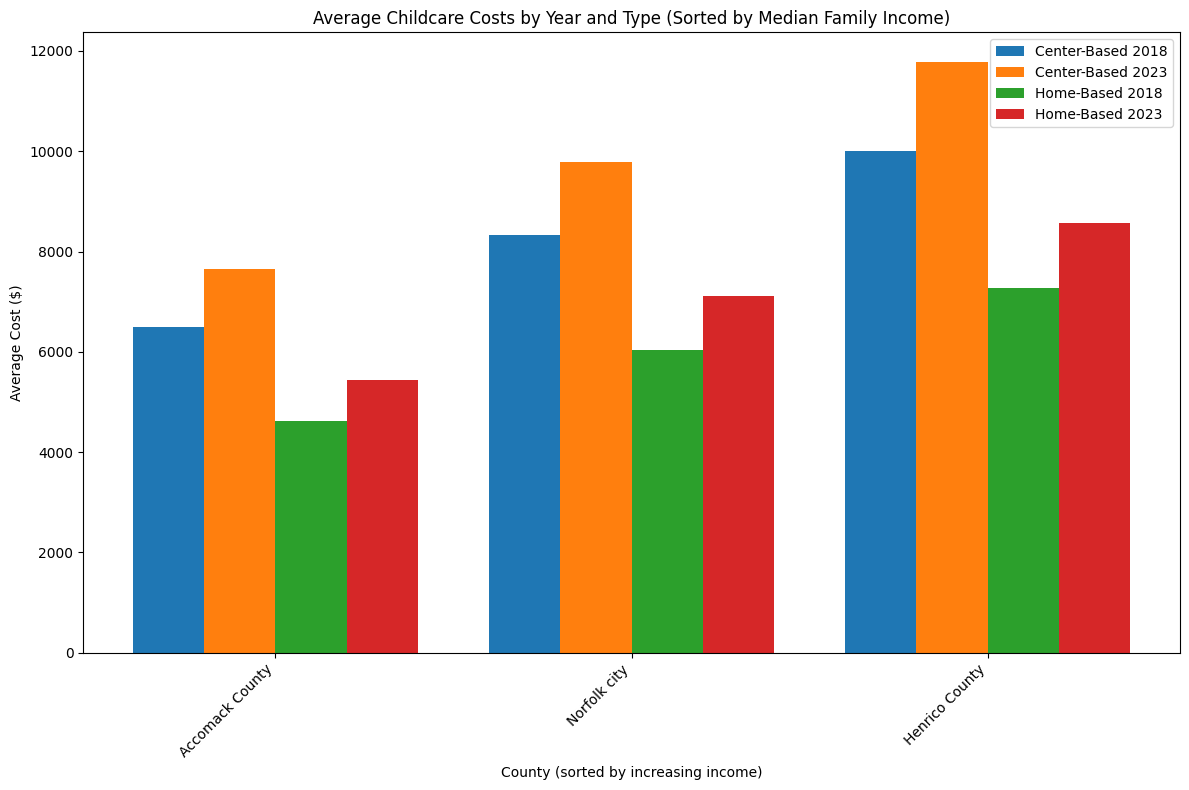

In [ ]:
reg_data = data[data['County name'].isin(['Accomack County', 'Henrico County', 'Norfolk city'])]
# Calculate average center-based childcare costs for 2018
reg_data['Avg_Center_Based_2018'] = reg_data[[
    'Infant center-based price: 2018 ($)',
    'Toddler center-based price: 2018 ($)',
    'Preschool center-based price: 2018 ($)',
    'School-age center-based price: 2018 ($)'
]].mean(axis=1)

# Calculate average home-based childcare costs for 2018
reg_data['Avg_Home_Based_2018'] = reg_data[[
    'Infant home-based price: 2018 ($)',
    'Toddler home-based price: 2018 ($)',
    'Preschool home-based price: 2018 ($)',
    'School-age home-based price: 2018 ($)'
]].mean(axis=1)


# Calculate average center-based childcare costs for 2023
reg_data['Avg_Center_Based_2023'] = reg_data[[
    'Infant center-based price: 2023 (estimated) ($)',
    'Toddler center-based price: 2023 (estimated) ($)',
    'Preschool center-based price: 2023 (estimated) ($)',
    'School-age center-based price: 2023 (estimated) ($)'
]].mean(axis=1)

# Calculate average home-based childcare costs for 2023
reg_data['Avg_Home_Based_2023'] = reg_data[[
    'Infant home-based price: 2023 (estimated) ($)',
    'Toddler home-based price: 2023 (estimated) ($)',
    'Preschool home-based price: 2023 (estimated) ($)',
    'School-age home-based price:  2023 (estimated) ($)'
]].mean(axis=1)


# Sorting the data by income in ascending order
sorted_counties = reg_data.sort_values(by='Median family income ($)', ascending=True)

# Extracting relevant data for sorted counties
sorted_selected_counties = sorted_counties[['County name', 'Avg_Center_Based_2018', 'Avg_Home_Based_2018',
                                            'Avg_Center_Based_2023', 'Avg_Home_Based_2023']]

# Setting counties as index for better plotting
sorted_selected_counties.set_index('County name', inplace=True)

# Creating a single plot with side-by-side bars for all comparisons (sorted by income)
fig, ax = plt.subplots(figsize=(12, 8))

# Defining positions and width for the bars
positions = range(len(sorted_selected_counties))

# Adding bars for each category
ax.bar([p - 1.5 * bar_width for p in positions], sorted_selected_counties['Avg_Center_Based_2018'],
       bar_width, label='Center-Based 2018')
ax.bar([p - 0.5 * bar_width for p in positions], sorted_selected_counties['Avg_Center_Based_2023'],
       bar_width, label='Center-Based 2023')
ax.bar([p + 0.5 * bar_width for p in positions], sorted_selected_counties['Avg_Home_Based_2018'],
       bar_width, label='Home-Based 2018')
ax.bar([p + 1.5 * bar_width for p in positions], sorted_selected_counties['Avg_Home_Based_2023'],
       bar_width, label='Home-Based 2023')

# Setting labels, title, and legend
ax.set_xticks(positions)
ax.set_xticklabels(sorted_selected_counties.index, rotation=45, ha='right')
ax.set_xlabel('County (sorted by increasing income)')
ax.set_ylabel('Average Cost ($)')
ax.set_title('Average Childcare Costs by Year and Type (Sorted by Median Family Income)')
ax.legend()

# Displaying the plot
plt.tight_layout()
plt.show()



<ipython-input-28-b7064a4e099c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data['Avg_Center_Based_2018'] = reg_data[[
<ipython-input-28-b7064a4e099c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data['Avg_Home_Based_2018'] = reg_data[[
<ipython-input-28-b7064a4e099c>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

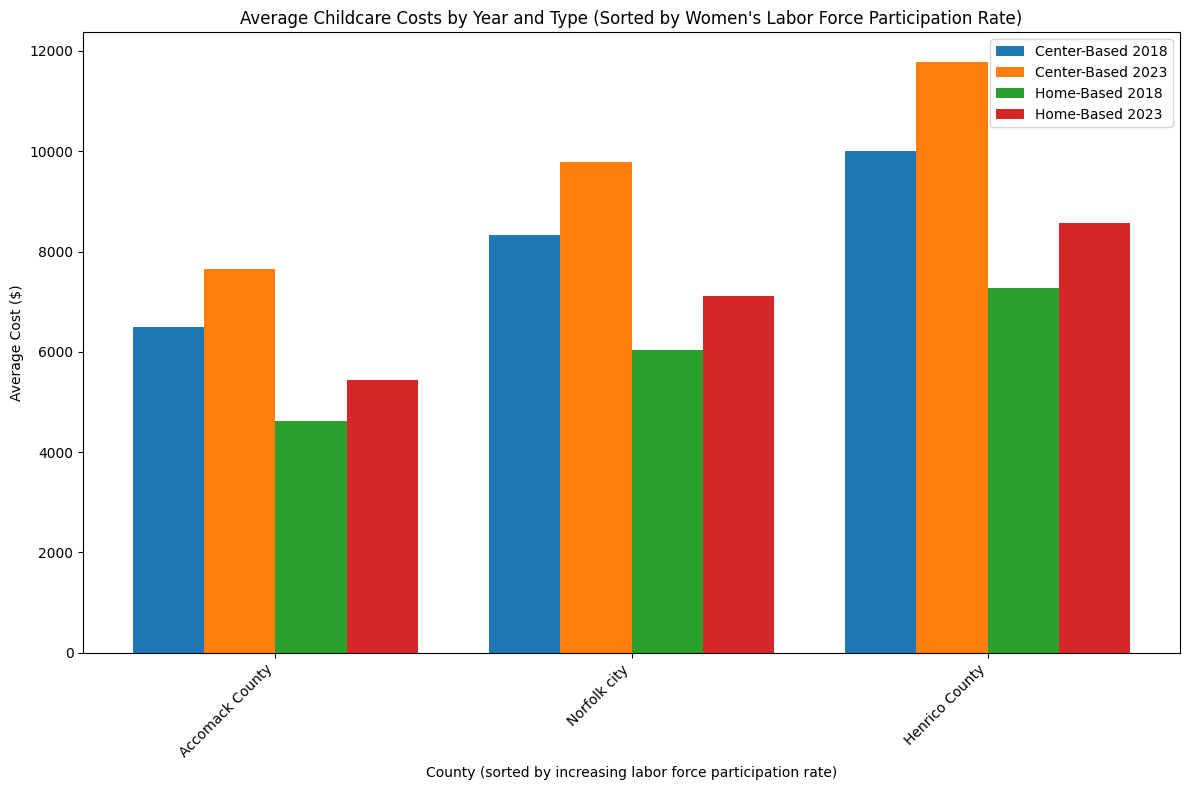

In [ ]:
reg_data = data[data['County name'].isin(['Accomack County', 'Henrico County', 'Norfolk city'])]
# Calculate average center-based childcare costs for 2018
reg_data['Avg_Center_Based_2018'] = reg_data[[
    'Infant center-based price: 2018 ($)',
    'Toddler center-based price: 2018 ($)',
    'Preschool center-based price: 2018 ($)',
    'School-age center-based price: 2018 ($)'
]].mean(axis=1)

# Calculate average home-based childcare costs for 2018
reg_data['Avg_Home_Based_2018'] = reg_data[[
    'Infant home-based price: 2018 ($)',
    'Toddler home-based price: 2018 ($)',
    'Preschool home-based price: 2018 ($)',
    'School-age home-based price: 2018 ($)'
]].mean(axis=1)


# Calculate average center-based childcare costs for 2023
reg_data['Avg_Center_Based_2023'] = reg_data[[
    'Infant center-based price: 2023 (estimated) ($)',
    'Toddler center-based price: 2023 (estimated) ($)',
    'Preschool center-based price: 2023 (estimated) ($)',
    'School-age center-based price: 2023 (estimated) ($)'
]].mean(axis=1)

# Calculate average home-based childcare costs for 2023
reg_data['Avg_Home_Based_2023'] = reg_data[[
    'Infant home-based price: 2023 (estimated) ($)',
    'Toddler home-based price: 2023 (estimated) ($)',
    'Preschool home-based price: 2023 (estimated) ($)',
    'School-age home-based price:  2023 (estimated) ($)'
]].mean(axis=1)


# Sorting the data by women's labor force participation rate in ascending order
sorted_counties_by_labor = reg_data.sort_values(by="Women's labor force participation rate (%)", ascending=True)

# Extracting relevant data for sorted counties
sorted_selected_counties_labor = sorted_counties_by_labor[['County name', 'Avg_Center_Based_2018',
                                                           'Avg_Home_Based_2018', 'Avg_Center_Based_2023',
                                                           'Avg_Home_Based_2023']]

# Setting counties as index for better plotting
sorted_selected_counties_labor.set_index('County name', inplace=True)

# Creating a single plot with side-by-side bars for all comparisons (sorted by labor participation rate)
fig, ax = plt.subplots(figsize=(12, 8))

# Defining positions and width for the bars
positions = range(len(sorted_selected_counties_labor))

# Adding bars for each category
ax.bar([p - 1.5 * bar_width for p in positions], sorted_selected_counties_labor['Avg_Center_Based_2018'],
       bar_width, label='Center-Based 2018')
ax.bar([p - 0.5 * bar_width for p in positions], sorted_selected_counties_labor['Avg_Center_Based_2023'],
       bar_width, label='Center-Based 2023')
ax.bar([p + 0.5 * bar_width for p in positions], sorted_selected_counties_labor['Avg_Home_Based_2018'],
       bar_width, label='Home-Based 2018')
ax.bar([p + 1.5 * bar_width for p in positions], sorted_selected_counties_labor['Avg_Home_Based_2023'],
       bar_width, label='Home-Based 2023')

# Setting labels, title, and legend
ax.set_xticks(positions)
ax.set_xticklabels(sorted_selected_counties_labor.index, rotation=45, ha='right')
ax.set_xlabel('County (sorted by increasing labor force participation rate)')
ax.set_ylabel('Average Cost ($)')
ax.set_title('Average Childcare Costs by Year and Type (Sorted by Women\'s Labor Force Participation Rate)')
ax.legend()

# Displaying the plot
plt.tight_layout()
plt.show()


<ipython-input-29-d9f7c483353c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data['Avg_Center_Based_2018'] = reg_data[[
<ipython-input-29-d9f7c483353c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data['Avg_Home_Based_2018'] = reg_data[[
<ipython-input-29-d9f7c483353c>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

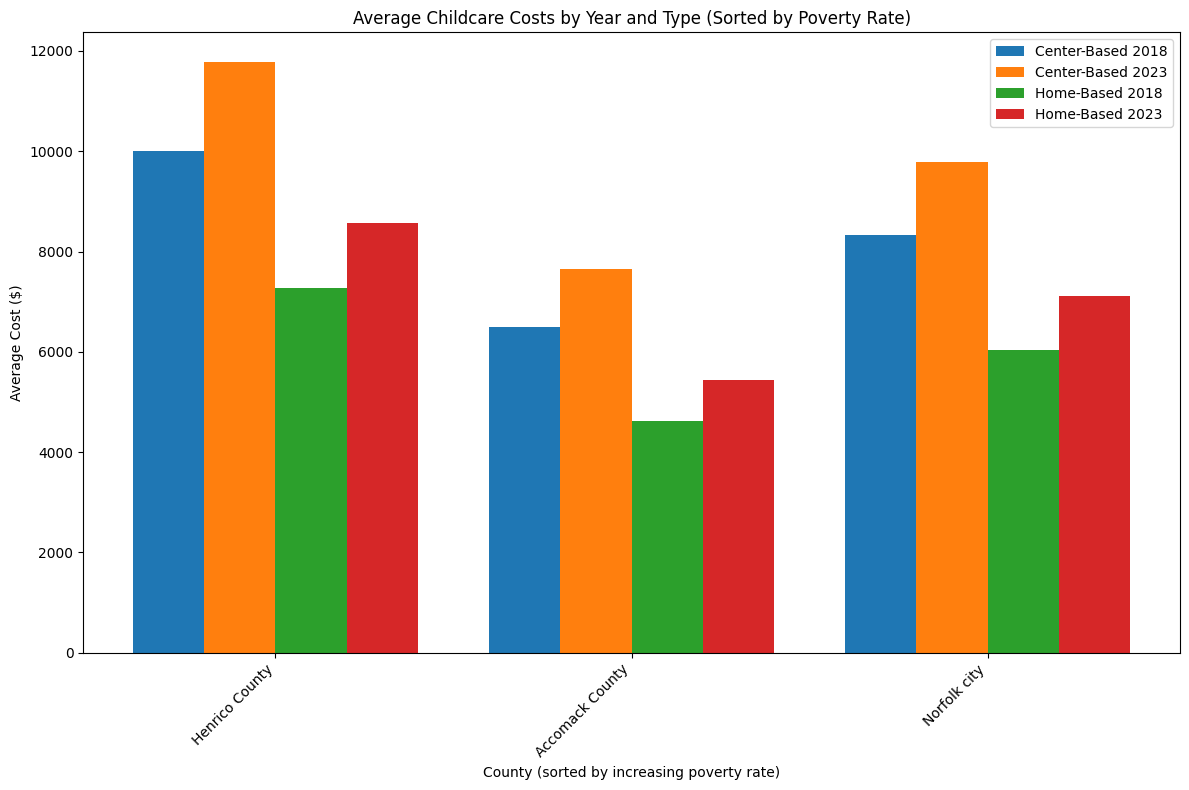

In [ ]:
reg_data = data[data['County name'].isin(['Accomack County', 'Henrico County', 'Norfolk city'])]
# Calculate average center-based childcare costs for 2018
reg_data['Avg_Center_Based_2018'] = reg_data[[
    'Infant center-based price: 2018 ($)',
    'Toddler center-based price: 2018 ($)',
    'Preschool center-based price: 2018 ($)',
    'School-age center-based price: 2018 ($)'
]].mean(axis=1)

# Calculate average home-based childcare costs for 2018
reg_data['Avg_Home_Based_2018'] = reg_data[[
    'Infant home-based price: 2018 ($)',
    'Toddler home-based price: 2018 ($)',
    'Preschool home-based price: 2018 ($)',
    'School-age home-based price: 2018 ($)'
]].mean(axis=1)


# Calculate average center-based childcare costs for 2023
reg_data['Avg_Center_Based_2023'] = reg_data[[
    'Infant center-based price: 2023 (estimated) ($)',
    'Toddler center-based price: 2023 (estimated) ($)',
    'Preschool center-based price: 2023 (estimated) ($)',
    'School-age center-based price: 2023 (estimated) ($)'
]].mean(axis=1)

# Calculate average home-based childcare costs for 2023
reg_data['Avg_Home_Based_2023'] = reg_data[[
    'Infant home-based price: 2023 (estimated) ($)',
    'Toddler home-based price: 2023 (estimated) ($)',
    'Preschool home-based price: 2023 (estimated) ($)',
    'School-age home-based price:  2023 (estimated) ($)'
]].mean(axis=1)



# Sorting the data by poverty rate in ascending order
sorted_counties_by_poverty = reg_data.sort_values(by='Percent of families in poverty (%)', ascending=True)

# Extracting relevant data for sorted counties
sorted_selected_counties_poverty = sorted_counties_by_poverty[['County name', 'Avg_Center_Based_2018',
                                                               'Avg_Home_Based_2018', 'Avg_Center_Based_2023',
                                                               'Avg_Home_Based_2023']]

# Setting counties as index for better plotting
sorted_selected_counties_poverty.set_index('County name', inplace=True)

# Creating a single plot with side-by-side bars for all comparisons (sorted by poverty rate)
fig, ax = plt.subplots(figsize=(12, 8))

# Defining positions and width for the bars
positions = range(len(sorted_selected_counties_poverty))

# Adding bars for each category
ax.bar([p - 1.5 * bar_width for p in positions], sorted_selected_counties_poverty['Avg_Center_Based_2018'],
       bar_width, label='Center-Based 2018')
ax.bar([p - 0.5 * bar_width for p in positions], sorted_selected_counties_poverty['Avg_Center_Based_2023'],
       bar_width, label='Center-Based 2023')
ax.bar([p + 0.5 * bar_width for p in positions], sorted_selected_counties_poverty['Avg_Home_Based_2018'],
       bar_width, label='Home-Based 2018')
ax.bar([p + 1.5 * bar_width for p in positions], sorted_selected_counties_poverty['Avg_Home_Based_2023'],
       bar_width, label='Home-Based 2023')

# Setting labels, title, and legend
ax.set_xticks(positions)
ax.set_xticklabels(sorted_selected_counties_poverty.index, rotation=45, ha='right')
ax.set_xlabel('County (sorted by increasing poverty rate)')
ax.set_ylabel('Average Cost ($)')
ax.set_title('Average Childcare Costs by Year and Type (Sorted by Poverty Rate)')
ax.legend()

# Displaying the plot
plt.tight_layout()
plt.show()


<ipython-input-30-600b35ec504d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data['Avg_Center_Based_2018'] = reg_data[[
<ipython-input-30-600b35ec504d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data['Avg_Home_Based_2018'] = reg_data[[
<ipython-input-30-600b35ec504d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

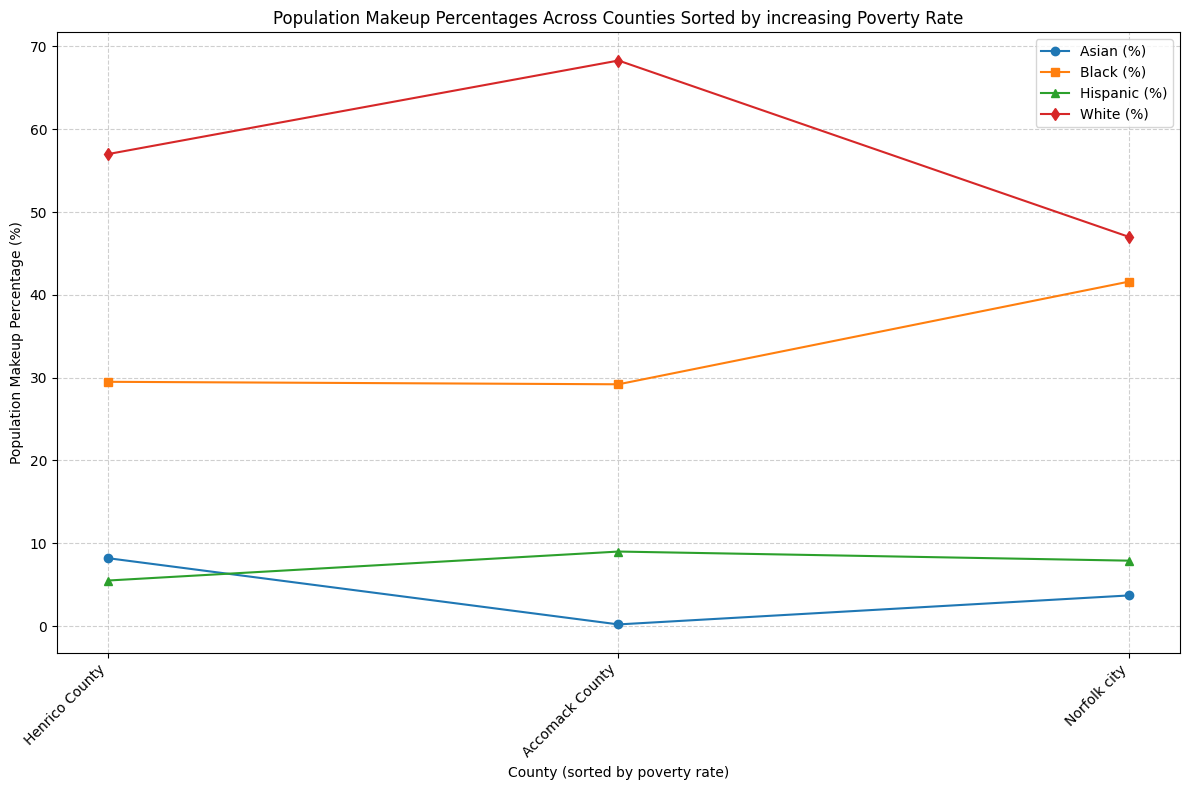

In [ ]:
reg_data = data[data['County name'].isin(['Accomack County', 'Henrico County', 'Norfolk city'])]
# Calculate average center-based childcare costs for 2018
reg_data['Avg_Center_Based_2018'] = reg_data[[
    'Infant center-based price: 2018 ($)',
    'Toddler center-based price: 2018 ($)',
    'Preschool center-based price: 2018 ($)',
    'School-age center-based price: 2018 ($)'
]].mean(axis=1)

# Calculate average home-based childcare costs for 2018
reg_data['Avg_Home_Based_2018'] = reg_data[[
    'Infant home-based price: 2018 ($)',
    'Toddler home-based price: 2018 ($)',
    'Preschool home-based price: 2018 ($)',
    'School-age home-based price: 2018 ($)'
]].mean(axis=1)


# Calculate average center-based childcare costs for 2023
reg_data['Avg_Center_Based_2023'] = reg_data[[
    'Infant center-based price: 2023 (estimated) ($)',
    'Toddler center-based price: 2023 (estimated) ($)',
    'Preschool center-based price: 2023 (estimated) ($)',
    'School-age center-based price: 2023 (estimated) ($)'
]].mean(axis=1)

# Calculate average home-based childcare costs for 2023
reg_data['Avg_Home_Based_2023'] = reg_data[[
    'Infant home-based price: 2023 (estimated) ($)',
    'Toddler home-based price: 2023 (estimated) ($)',
    'Preschool home-based price: 2023 (estimated) ($)',
    'School-age home-based price:  2023 (estimated) ($)'
]].mean(axis=1)


# Calculate average home-based childcare costs for 2023
reg_data['Avg_Home_Based_2023'] = reg_data[[
    'Infant home-based price: 2023 (estimated) ($)',
    'Toddler home-based price: 2023 (estimated) ($)',
    'Preschool home-based price: 2023 (estimated) ($)',
    'School-age home-based price:  2023 (estimated) ($)'
]].mean(axis=1)

# Sorting the data by poverty rate in ascending order
sorted_counties_by_poverty = reg_data.sort_values(by='Percent of families in poverty (%)', ascending=True)


# Extracting relevant data for ethnicities and sorting counties by poverty rate
ethnicity_data = sorted_counties_by_poverty[['County name', 'Percent Asian (%)', 'Percent Black (%)',
                                             'Percent Hispanic (of any race) (%)', 'Percent White (%)']]

# Setting counties as index for better plotting
ethnicity_data.set_index('County name', inplace=True)

# Creating a line plot for ethnicities
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting lines with different markers for each ethnicity
ax.plot(ethnicity_data.index, ethnicity_data['Percent Asian (%)'], marker='o', label='Asian (%)')
ax.plot(ethnicity_data.index, ethnicity_data['Percent Black (%)'], marker='s', label='Black (%)')
ax.plot(ethnicity_data.index, ethnicity_data['Percent Hispanic (of any race) (%)'], marker='^', label='Hispanic (%)')
ax.plot(ethnicity_data.index, ethnicity_data['Percent White (%)'], marker='d', label='White (%)')

# Setting labels, title, and legend
ax.set_xlabel('County (sorted by poverty rate)')
ax.set_ylabel('Population Makeup Percentage (%)')
ax.set_title('Population Makeup Percentages Across Counties Sorted by increasing Poverty Rate')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<ipython-input-31-796368f97452>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data['Avg_Center_Based_2018'] = reg_data[[
<ipython-input-31-796368f97452>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data['Avg_Home_Based_2018'] = reg_data[[
<ipython-input-31-796368f97452>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

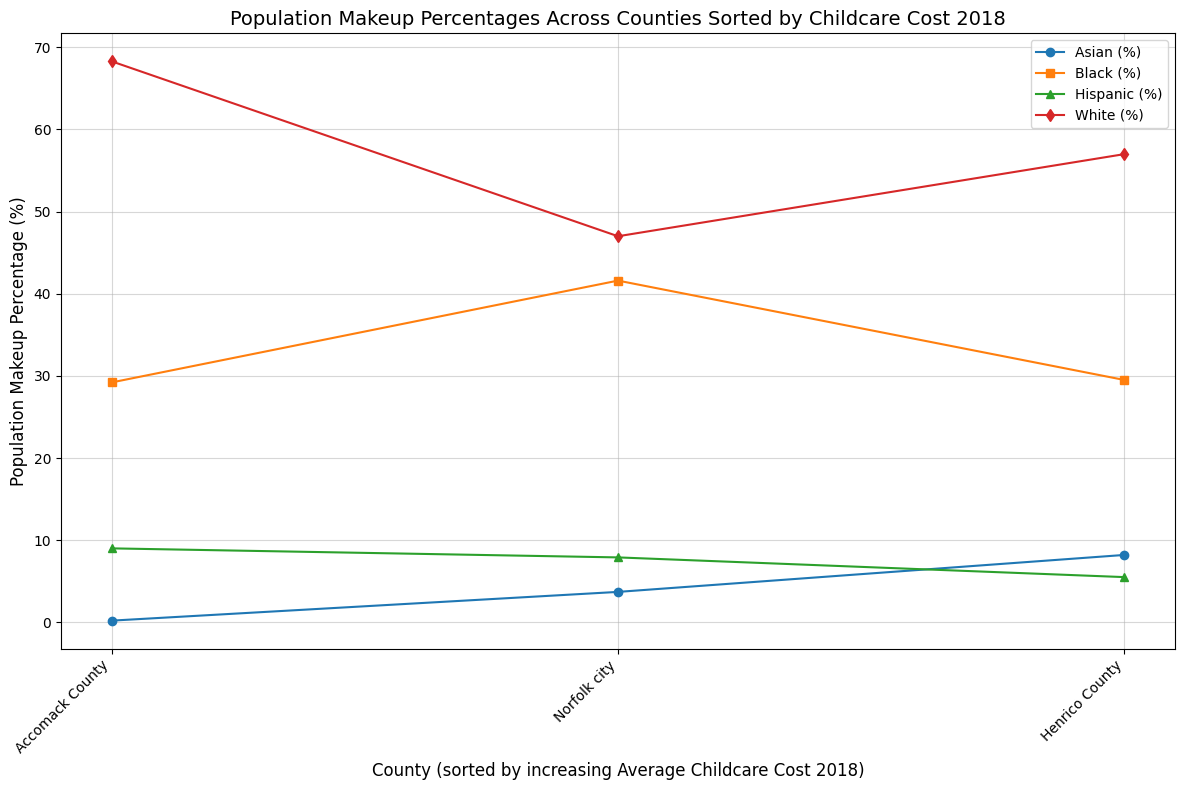

In [ ]:
reg_data = data[data['County name'].isin(['Accomack County', 'Henrico County', 'Norfolk city'])]
# Calculate average center-based childcare costs for 2018
reg_data['Avg_Center_Based_2018'] = reg_data[[
    'Infant center-based price: 2018 ($)',
    'Toddler center-based price: 2018 ($)',
    'Preschool center-based price: 2018 ($)',
    'School-age center-based price: 2018 ($)'
]].mean(axis=1)

# Calculate average home-based childcare costs for 2018
reg_data['Avg_Home_Based_2018'] = reg_data[[
    'Infant home-based price: 2018 ($)',
    'Toddler home-based price: 2018 ($)',
    'Preschool home-based price: 2018 ($)',
    'School-age home-based price: 2018 ($)'
]].mean(axis=1)


# Calculate average center-based childcare costs for 2023
reg_data['Avg_Center_Based_2023'] = reg_data[[
    'Infant center-based price: 2023 (estimated) ($)',
    'Toddler center-based price: 2023 (estimated) ($)',
    'Preschool center-based price: 2023 (estimated) ($)',
    'School-age center-based price: 2023 (estimated) ($)'
]].mean(axis=1)

# Calculate average home-based childcare costs for 2023
reg_data['Avg_Home_Based_2023'] = reg_data[[
    'Infant home-based price: 2023 (estimated) ($)',
    'Toddler home-based price: 2023 (estimated) ($)',
    'Preschool home-based price: 2023 (estimated) ($)',
    'School-age home-based price:  2023 (estimated) ($)'
]].mean(axis=1)


# Calculate average childcare costs for 2018
reg_data['Avg_Childcare_2018'] = reg_data[[
    'Avg_Center_Based_2018',
    'Avg_Home_Based_2018'
]].mean(axis=1)

# Calculate average childcare costs for 2023
reg_data['Avg_Childcare_2023'] = reg_data[[
    'Avg_Center_Based_2023',
    'Avg_Home_Based_2023'
]].mean(axis=1)
# reg_data.to_csv('reg_data.conso.csv')

# Sorting counties by 'Avg_Center_Based_2018' for childcare costs
sorted_by_childcare_2018 = reg_data.sort_values(by='Avg_Childcare_2018', ascending=True)

# Extracting relevant ethnicity percentage columns
ethnicity_data_sorted = sorted_by_childcare_2018[['County name', 'Percent Asian (%)',
                                                  'Percent Black (%)',
                                                  'Percent Hispanic (of any race) (%)',
                                                  'Percent White (%)']]

# Setting counties as index for better plotting
ethnicity_data_sorted.set_index('County name', inplace=True)

# Creating the line plot
plt.figure(figsize=(12, 8))

# Plotting each ethnicity with different markers
plt.plot(ethnicity_data_sorted.index, ethnicity_data_sorted['Percent Asian (%)'],
         marker='o', label='Asian (%)')
plt.plot(ethnicity_data_sorted.index, ethnicity_data_sorted['Percent Black (%)'],
         marker='s', label='Black (%)')
plt.plot(ethnicity_data_sorted.index, ethnicity_data_sorted['Percent Hispanic (of any race) (%)'],
         marker='^', label='Hispanic (%)')
plt.plot(ethnicity_data_sorted.index, ethnicity_data_sorted['Percent White (%)'],
         marker='d', label='White (%)')

# Adding labels, title, and legend
plt.xlabel('County (sorted by increasing Average Childcare Cost 2018)', fontsize=12)
plt.ylabel('Population Makeup Percentage (%)', fontsize=12)
plt.title('Population Makeup Percentages Across Counties Sorted by Childcare Cost 2018', fontsize=14)
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.5)

# Displaying the plot
plt.tight_layout()
plt.show()

<ipython-input-32-f141145ecf81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data['Avg_Center_Based_2018'] = reg_data[[
<ipython-input-32-f141145ecf81>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data['Avg_Home_Based_2018'] = reg_data[[
<ipython-input-32-f141145ecf81>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

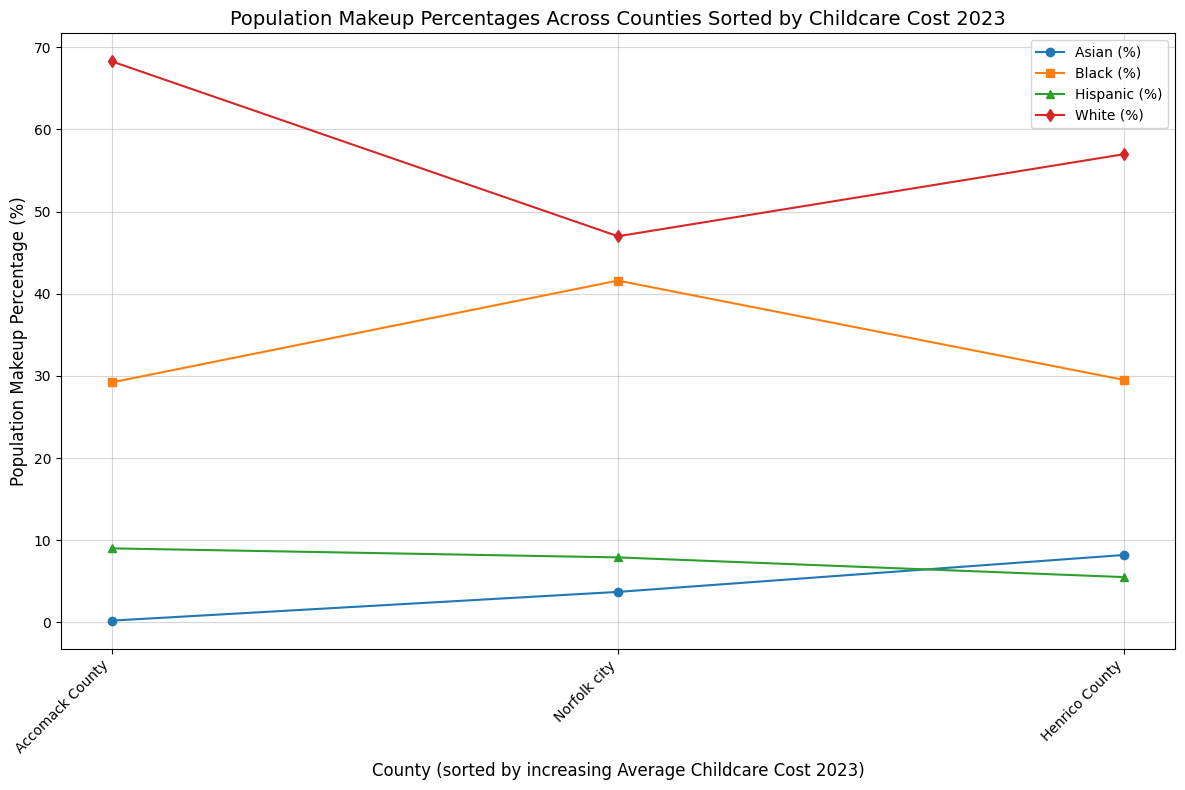

In [ ]:
reg_data = data[data['County name'].isin(['Accomack County', 'Henrico County', 'Norfolk city'])]
# Calculate average center-based childcare costs for 2018
reg_data['Avg_Center_Based_2018'] = reg_data[[
    'Infant center-based price: 2018 ($)',
    'Toddler center-based price: 2018 ($)',
    'Preschool center-based price: 2018 ($)',
    'School-age center-based price: 2018 ($)'
]].mean(axis=1)

# Calculate average home-based childcare costs for 2018
reg_data['Avg_Home_Based_2018'] = reg_data[[
    'Infant home-based price: 2018 ($)',
    'Toddler home-based price: 2018 ($)',
    'Preschool home-based price: 2018 ($)',
    'School-age home-based price: 2018 ($)'
]].mean(axis=1)


# Calculate average center-based childcare costs for 2023
reg_data['Avg_Center_Based_2023'] = reg_data[[
    'Infant center-based price: 2023 (estimated) ($)',
    'Toddler center-based price: 2023 (estimated) ($)',
    'Preschool center-based price: 2023 (estimated) ($)',
    'School-age center-based price: 2023 (estimated) ($)'
]].mean(axis=1)

# Calculate average home-based childcare costs for 2023
reg_data['Avg_Home_Based_2023'] = reg_data[[
    'Infant home-based price: 2023 (estimated) ($)',
    'Toddler home-based price: 2023 (estimated) ($)',
    'Preschool home-based price: 2023 (estimated) ($)',
    'School-age home-based price:  2023 (estimated) ($)'
]].mean(axis=1)


# Calculate average childcare costs for 2018
reg_data['Avg_Childcare_2018'] = reg_data[[
    'Avg_Center_Based_2018',
    'Avg_Home_Based_2018'
]].mean(axis=1)

# Calculate average childcare costs for 2023
reg_data['Avg_Childcare_2023'] = reg_data[[
    'Avg_Center_Based_2023',
    'Avg_Home_Based_2023'
]].mean(axis=1)
# reg_data.to_csv('reg_data.conso.csv')

# Sorting counties by 'Avg_Center_Based_2018' for childcare costs
sorted_by_childcare_2018 = reg_data.sort_values(by='Avg_Childcare_2023', ascending=True)

# Extracting relevant ethnicity percentage columns
ethnicity_data_sorted = sorted_by_childcare_2018[['County name', 'Percent Asian (%)',
                                                  'Percent Black (%)',
                                                  'Percent Hispanic (of any race) (%)',
                                                  'Percent White (%)']]

# Setting counties as index for better plotting
ethnicity_data_sorted.set_index('County name', inplace=True)

# Creating the line plot
plt.figure(figsize=(12, 8))

# Plotting each ethnicity with different markers
plt.plot(ethnicity_data_sorted.index, ethnicity_data_sorted['Percent Asian (%)'],
         marker='o', label='Asian (%)')
plt.plot(ethnicity_data_sorted.index, ethnicity_data_sorted['Percent Black (%)'],
         marker='s', label='Black (%)')
plt.plot(ethnicity_data_sorted.index, ethnicity_data_sorted['Percent Hispanic (of any race) (%)'],
         marker='^', label='Hispanic (%)')
plt.plot(ethnicity_data_sorted.index, ethnicity_data_sorted['Percent White (%)'],
         marker='d', label='White (%)')

# Adding labels, title, and legend
plt.xlabel('County (sorted by increasing Average Childcare Cost 2023)', fontsize=12)
plt.ylabel('Population Makeup Percentage (%)', fontsize=12)
plt.title('Population Makeup Percentages Across Counties Sorted by Childcare Cost 2023', fontsize=14)
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.5)

# Displaying the plot
plt.tight_layout()
plt.show()

##Trend Analysis

In [ ]:
#This is to be done on all the data for it to be statistically significant
data = pd.read_excel(file_path, sheet_name='Virginia') # Specify the sheet name
trend_data = data[[
    'Median family income ($)', "Women's labor force participation rate (%)", 'Percent of families in poverty (%)'
   ]]


# Calculate average center-based childcare costs for 2018
trend_data['Avg_Center_Based_2018'] = data[[
    'Infant center-based price: 2018 ($)',
    'Toddler center-based price: 2018 ($)',
    'Preschool center-based price: 2018 ($)',
    'School-age center-based price: 2018 ($)'
]].mean(axis=1)

# Calculate average home-based childcare costs for 2018
trend_data['Avg_Home_Based_2018'] = data[[
    'Infant home-based price: 2018 ($)',
    'Toddler home-based price: 2018 ($)',
    'Preschool home-based price: 2018 ($)',
    'School-age home-based price: 2018 ($)'
]].mean(axis=1)


# Calculate average center-based childcare costs for 2023
trend_data['Avg_Center_Based_2023'] = data[[
    'Infant center-based price: 2023 (estimated) ($)',
    'Toddler center-based price: 2023 (estimated) ($)',
    'Preschool center-based price: 2023 (estimated) ($)',
    'School-age center-based price: 2023 (estimated) ($)'
]].mean(axis=1)

# Calculate average home-based childcare costs for 2023
trend_data['Avg_Home_Based_2023'] = data[[
    'Infant home-based price: 2023 (estimated) ($)',
    'Toddler home-based price: 2023 (estimated) ($)',
    'Preschool home-based price: 2023 (estimated) ($)',
    'School-age home-based price:  2023 (estimated) ($)'
]].mean(axis=1)


# Calculate average childcare costs for 2018
trend_data['Avg_Childcare_2018'] = trend_data[[
    'Avg_Center_Based_2018',
    'Avg_Home_Based_2018'
]].mean(axis=1)

# Calculate average childcare costs for 2023
trend_data['Avg_Childcare_2023'] = trend_data[[
    'Avg_Center_Based_2023',
    'Avg_Home_Based_2023'
]].mean(axis=1)

# virginia_mediation_data.to_csv('virginia_mediation_data.csv')
# virginia_mediation_data


# Calculate the percentage of childcare costs relative to median family income
trend_data['childcare_affordability_2018'] = (trend_data['Avg_Childcare_2018'] / trend_data['Median family income ($)']) * 100
trend_data['childcare_affordability_2023'] = (trend_data['Avg_Childcare_2023'] / trend_data['Median family income ($)']) * 100
trend_data

<ipython-input-33-45ba79d9f7d3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trend_data['Avg_Center_Based_2018'] = data[[
<ipython-input-33-45ba79d9f7d3>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trend_data['Avg_Home_Based_2018'] = data[[
<ipython-input-33-45ba79d9f7d3>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

,Median family income ($),Women's labor force participation rate (%),Percent of families in poverty (%),Avg_Center_Based_2018,Avg_Home_Based_2018,Avg_Center_Based_2023,Avg_Home_Based_2023,Avg_Childcare_2018,Avg_Childcare_2023,childcare_affordability_2018,childcare_affordability_2023
0,54984,66.9,11.8,6500.0,4615.0,7650.838984,5432.095679,5557.5,6541.467332,10.107486,11.897038
1,96157,76.3,5.9,11505.0,6890.0,13541.985002,8109.889323,9197.5,10825.937163,9.565086,11.258605
2,59442,62.5,15.6,6240.0,4485.0,7344.805425,5279.078899,5362.5,6311.942162,9.021399,10.618657
3,74516,77.0,9.3,5590.0,4940.0,6579.721526,5814.637628,5265.0,6197.179577,7.065597,8.316576
4,64164,73.1,7.7,5785.0,4810.0,6809.246696,5661.620848,5297.5,6235.433772,8.256187,9.717963
...,...,...,...,...,...,...,...,...,...,...,...
128,82946,74.7,8.9,8190.0,7150.0,9640.057120,8415.922883,7670.0,9027.990001,9.246980,10.884178
129,85537,76.9,5.5,9555.0,7475.0,11246.733307,8798.464832,8515.0,10022.599069,9.954756,11.717267
130,59779,69.2,12.6,7735.0,6630.0,9104.498391,7803.855764,7182.5,8454.177078,12.015089,14.142386
131,88431,62.9,6.7,8840.0,6890.0,10405.141019,8109.889323,7865.0,9257.515171,8.893940,10.468631


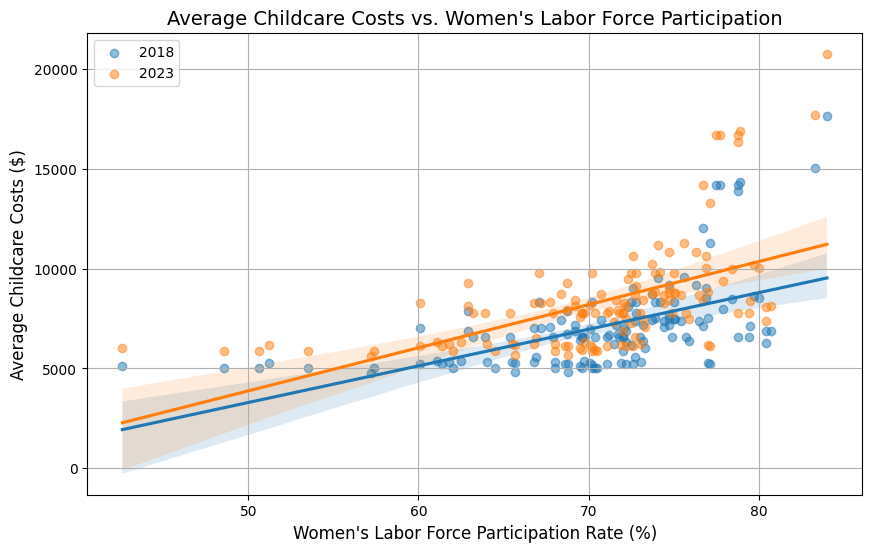

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the regression plot
plt.figure(figsize=(10, 6))
sns.regplot(y='Avg_Childcare_2018', x="Women's labor force participation rate (%)", data=trend_data, scatter_kws={'alpha':0.5}, label='2018')
sns.regplot(y='Avg_Childcare_2023', x="Women's labor force participation rate (%)", data=trend_data, scatter_kws={'alpha':0.5}, label='2023')


# Add labels and title
plt.ylabel('Average Childcare Costs ($)', fontsize=12)
plt.xlabel("Women's Labor Force Participation Rate (%)", fontsize=12)
plt.title('Average Childcare Costs vs. Women\'s Labor Force Participation', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

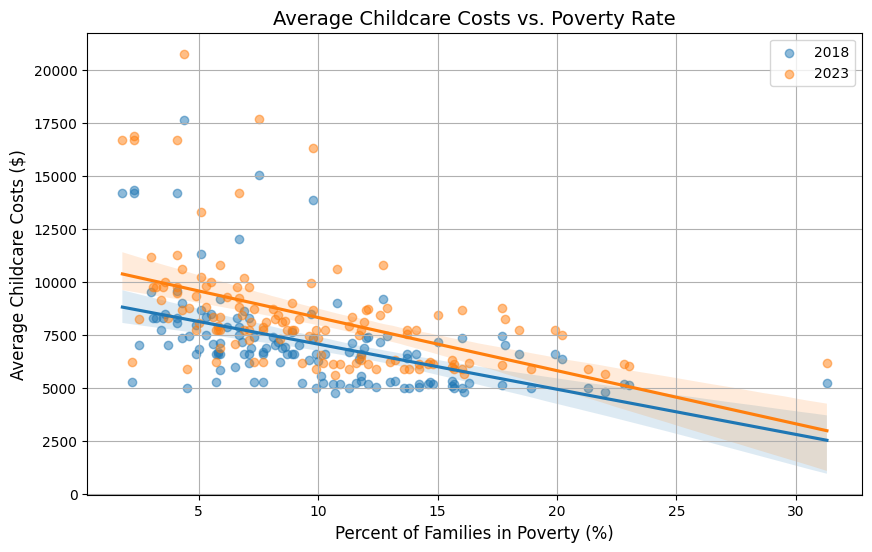

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Percent of families in poverty (%)', y='Avg_Childcare_2018', data=trend_data, scatter_kws={'alpha':0.5}, label='2018')
sns.regplot(x='Percent of families in poverty (%)', y='Avg_Childcare_2023', data=trend_data, scatter_kws={'alpha':0.5}, label='2023')

# Add labels and title
plt.ylabel('Average Childcare Costs ($)', fontsize=12)
plt.xlabel('Percent of Families in Poverty (%)', fontsize=12)
plt.title('Average Childcare Costs vs. Poverty Rate', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

##Mediation Analysis

In [ ]:
from statsmodels.formula.api import ols
#This is to be done on all the data for it to be statistically significant
data = pd.read_excel(file_path, sheet_name='Virginia') # Specify the sheet name

mediation_data = data[[
    'Median family income ($)', "Women's labor force participation rate (%)",
   ]]


# Calculate average center-based childcare costs for 2018
mediation_data['Avg_Center_Based_2018'] = data[[
    'Infant center-based price: 2018 ($)',
    'Toddler center-based price: 2018 ($)',
    'Preschool center-based price: 2018 ($)',
    'School-age center-based price: 2018 ($)'
]].mean(axis=1)

# Calculate average home-based childcare costs for 2018
mediation_data['Avg_Home_Based_2018'] = data[[
    'Infant home-based price: 2018 ($)',
    'Toddler home-based price: 2018 ($)',
    'Preschool home-based price: 2018 ($)',
    'School-age home-based price: 2018 ($)'
]].mean(axis=1)


# Calculate average center-based childcare costs for 2023
mediation_data['Avg_Center_Based_2023'] = data[[
    'Infant center-based price: 2023 (estimated) ($)',
    'Toddler center-based price: 2023 (estimated) ($)',
    'Preschool center-based price: 2023 (estimated) ($)',
    'School-age center-based price: 2023 (estimated) ($)'
]].mean(axis=1)

# Calculate average home-based childcare costs for 2023
mediation_data['Avg_Home_Based_2023'] = data[[
    'Infant home-based price: 2023 (estimated) ($)',
    'Toddler home-based price: 2023 (estimated) ($)',
    'Preschool home-based price: 2023 (estimated) ($)',
    'School-age home-based price:  2023 (estimated) ($)'
]].mean(axis=1)


# Calculate average childcare costs for 2018
mediation_data['Avg_Childcare_2018'] = mediation_data[[
    'Avg_Center_Based_2018',
    'Avg_Home_Based_2018'
]].mean(axis=1)

# Calculate average childcare costs for 2023
mediation_data['Avg_Childcare_2023'] = mediation_data[[
    'Avg_Center_Based_2023',
    'Avg_Home_Based_2023'
]].mean(axis=1)

# virginia_mediation_data.to_csv('virginia_mediation_data.csv')
# virginia_mediation_data


# Calculate the percentage of childcare costs relative to median family income
mediation_data['childcare_affordability_2018'] = (mediation_data['Avg_Childcare_2018'] / mediation_data['Median family income ($)']) * 100
mediation_data['childcare_affordability_2023'] = (mediation_data['Avg_Childcare_2023'] / mediation_data['Median family income ($)']) * 100

mediation_data.drop(columns = ['Avg_Center_Based_2018','Avg_Home_Based_2018','Avg_Center_Based_2023','Avg_Home_Based_2023', 'Avg_Childcare_2018','Avg_Childcare_2023'], inplace = True)
# mediation_data.to_csv('mediation_data.csv')

# Renaming columns for easier reference
mediation_data = mediation_data.rename(columns={
    'Median family income ($)': 'Income',
    "Women's labor force participation rate (%)": 'LaborForceParticipation',
    'childcare_affordability_2018': 'Affordability2018',
    'childcare_affordability_2023': 'Affordability2023'
})

# Path A: Effect of Income on Labor Force Participation
model_a = ols("LaborForceParticipation ~ Income", data=mediation_data).fit()

# Path B: Effect of Labor Force Participation on Childcare Affordability (2018)
model_b_2018 = ols("Affordability2018 ~ LaborForceParticipation", data=mediation_data).fit()

# Path B: Effect of Labor Force Participation on Childcare Affordability (2023)
model_b_2023 = ols("Affordability2023 ~ LaborForceParticipation", data=mediation_data).fit()

# Path C: Direct effect of Income on Childcare Affordability (2018), controlling for Labor Force Participation
model_c_2018 = ols("Affordability2018 ~ Income + LaborForceParticipation", data=mediation_data).fit()

# Path C: Direct effect of Income on Childcare Affordability (2023), controlling for Labor Force Participation
model_c_2023 = ols("Affordability2023 ~ Income + LaborForceParticipation", data=mediation_data).fit()

# Summarize results
summary_a = model_a.summary()
summary_b_2018 = model_b_2018.summary()
summary_b_2023 = model_b_2023.summary()
summary_c_2018 = model_c_2018.summary()
summary_c_2023 = model_c_2023.summary()

summary_a, summary_b_2018, summary_b_2023, summary_c_2018, summary_c_2023


<ipython-input-36-5cc92a0bd50c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mediation_data['Avg_Center_Based_2018'] = data[[
<ipython-input-36-5cc92a0bd50c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mediation_data['Avg_Home_Based_2018'] = data[[
<ipython-input-36-5cc92a0bd50c>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

(<class 'statsmodels.iolib.summary.Summary'>
 """
                                OLS Regression Results                              
 Dep. Variable:     LaborForceParticipation   R-squared:                       0.242
 Model:                                 OLS   Adj. R-squared:                  0.236
 Method:                      Least Squares   F-statistic:                     41.75
 Date:                     Thu, 21 Nov 2024   Prob (F-statistic):           1.87e-09
 Time:                             09:22:09   Log-Likelihood:                -424.65
 No. Observations:                      133   AIC:                             853.3
 Df Residuals:                          131   BIC:                             859.1
 Df Model:                                1                                         
 Covariance Type:                 nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 -------------------

<Figure size 1000x800 with 0 Axes>

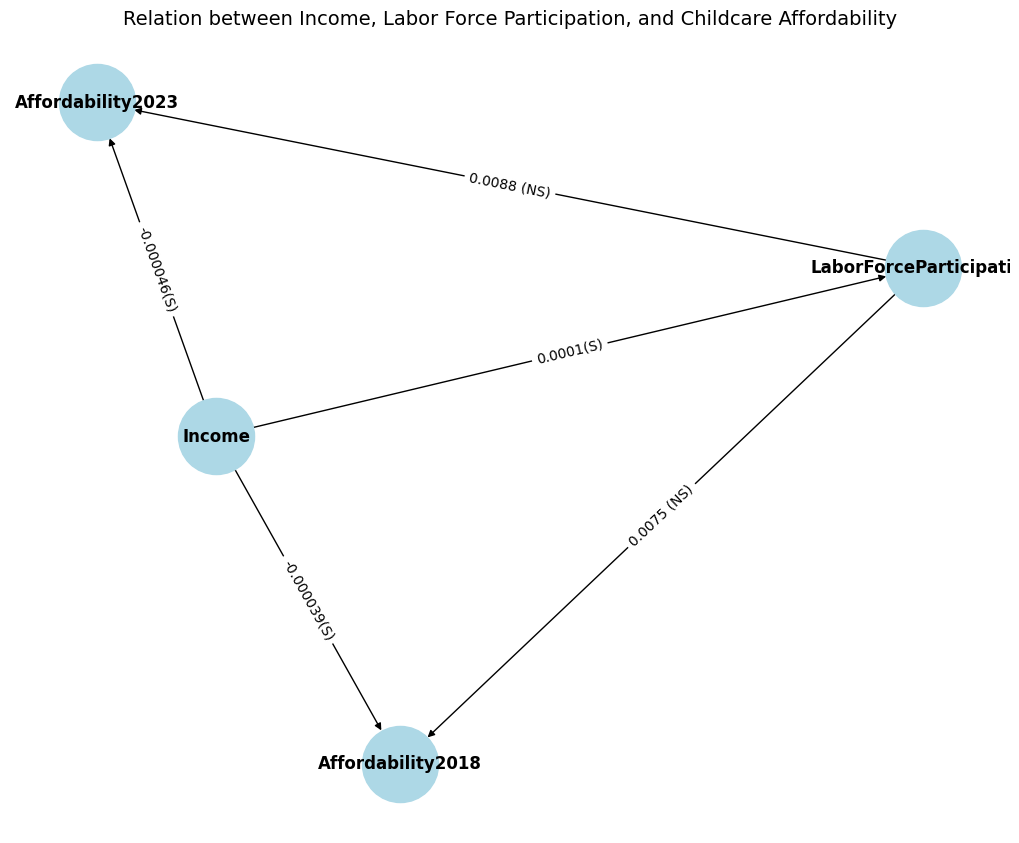

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Creating a directed graph for the mediation model
G = nx.DiGraph()

# Adding nodes
nodes = ["Income", "LaborForceParticipation", "Affordability2018", "Affordability2023"]
G.add_nodes_from(nodes)

# Adding edges to represent relationships
edges = [
    ("Income", "LaborForceParticipation"),
    ("LaborForceParticipation", "Affordability2018"),
    ("LaborForceParticipation", "Affordability2023"),
    ("Income", "Affordability2018"),
    ("Income", "Affordability2023")
]
G.add_edges_from(edges)

# Adding coefficients as edge labels
edge_labels = {
    ("Income", "LaborForceParticipation"): "0.0001(S)",
    ("LaborForceParticipation", "Affordability2018"): "0.0075 (NS)",
    ("LaborForceParticipation", "Affordability2023"): "0.0088 (NS)",
    ("Income", "Affordability2018"): "-0.000039(S)",
    ("Income", "Affordability2023"): "-0.000046(S)"
}

# Drawing the graph
pos = nx.spring_layout(G, seed=42)  # Use spring_layout for better node positioning
plt.figure(figsize=(10, 8))

pos['LaborForceParticipation'] = (1, 0.5)  # Manually setting position to the right

# Re-drawing the graph with adjusted position for 'LaborForceParticipation'
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=12, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Adding title
plt.title("Relation between Income, Labor Force Participation, and Childcare Affordability", fontsize=14)
plt.show()


##Share of childcare costs relative to income in each county

<ipython-input-38-0f7494cba84e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data['Avg_Center_Based_2018'] = reg_data[[
<ipython-input-38-0f7494cba84e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data['Avg_Home_Based_2018'] = reg_data[[
<ipython-input-38-0f7494cba84e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

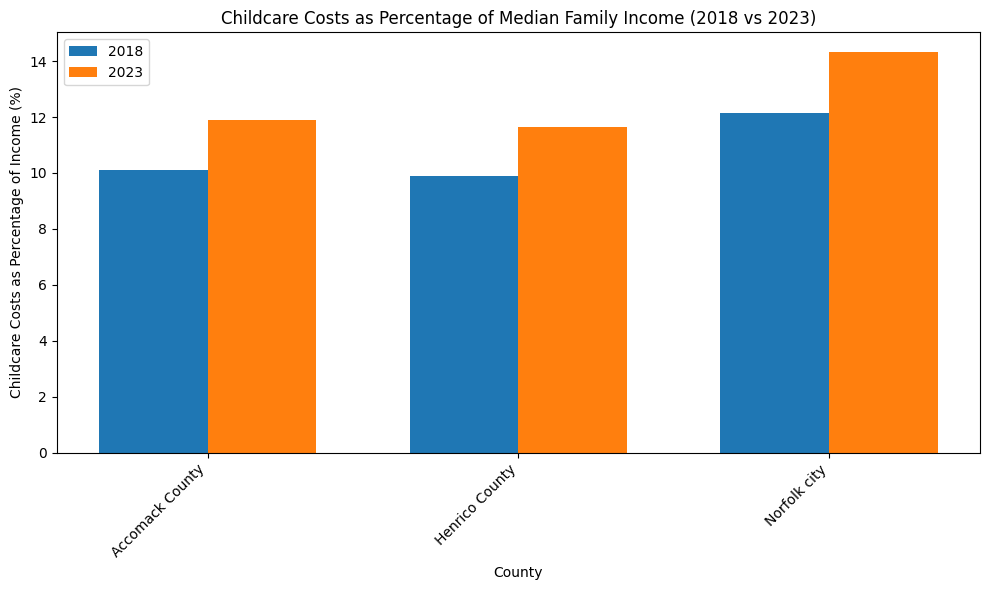

In [ ]:

data = pd.read_excel(file_path, sheet_name='Virginia') # Specify the sheet name
reg_data = data[data['County name'].isin(['Accomack County', 'Henrico County', 'Norfolk city'])]
# Calculate average center-based childcare costs for 2018
reg_data['Avg_Center_Based_2018'] = reg_data[[
    'Infant center-based price: 2018 ($)',
    'Toddler center-based price: 2018 ($)',
    'Preschool center-based price: 2018 ($)',
    'School-age center-based price: 2018 ($)'
]].mean(axis=1)

# Calculate average home-based childcare costs for 2018
reg_data['Avg_Home_Based_2018'] = reg_data[[
    'Infant home-based price: 2018 ($)',
    'Toddler home-based price: 2018 ($)',
    'Preschool home-based price: 2018 ($)',
    'School-age home-based price: 2018 ($)'
]].mean(axis=1)


# Calculate average center-based childcare costs for 2023
reg_data['Avg_Center_Based_2023'] = reg_data[[
    'Infant center-based price: 2023 (estimated) ($)',
    'Toddler center-based price: 2023 (estimated) ($)',
    'Preschool center-based price: 2023 (estimated) ($)',
    'School-age center-based price: 2023 (estimated) ($)'
]].mean(axis=1)

# Calculate average home-based childcare costs for 2023
reg_data['Avg_Home_Based_2023'] = reg_data[[
    'Infant home-based price: 2023 (estimated) ($)',
    'Toddler home-based price: 2023 (estimated) ($)',
    'Preschool home-based price: 2023 (estimated) ($)',
    'School-age home-based price:  2023 (estimated) ($)'
]].mean(axis=1)


# Calculate average childcare costs for 2018
reg_data['Avg_Childcare_2018'] = reg_data[[
    'Avg_Center_Based_2018',
    'Avg_Home_Based_2018'
]].mean(axis=1)

# Calculate average childcare costs for 2023
reg_data['Avg_Childcare_2023'] = reg_data[[
    'Avg_Center_Based_2023',
    'Avg_Home_Based_2023'
]].mean(axis=1)

# Calculate the percentage of childcare costs relative to median family income
reg_data['childcare_income_share_2018'] = (reg_data['Avg_Childcare_2018'] / reg_data['Median family income ($)']) * 100
reg_data['childcare_income_share_2023'] = (reg_data['Avg_Childcare_2023'] / reg_data['Median family income ($)']) * 100

# Create the bar plot
plt.figure(figsize=(10, 6))

# Bar width
bar_width = 0.35

# Define the x positions for the bars
x_pos = np.arange(len(reg_data['County name']))

# Plot the bars for 2018 and 2023
plt.bar(x_pos - bar_width/2, reg_data['childcare_income_share_2018'], bar_width, label='2018')
plt.bar(x_pos + bar_width/2, reg_data['childcare_income_share_2023'], bar_width, label='2023')

# Customize the plot
plt.xlabel("County")
plt.ylabel("Childcare Costs as Percentage of Income (%)")
plt.title("Childcare Costs as Percentage of Median Family Income (2018 vs 2023)")
plt.xticks(x_pos, reg_data['County name'], rotation=45, ha='right')  # Rotate x-axis labels
plt.legend()
plt.tight_layout()
plt.show()

##Graph to differentiate women’s participation rates with respect to each county - look at how these are different and then relate that to poverty and income.

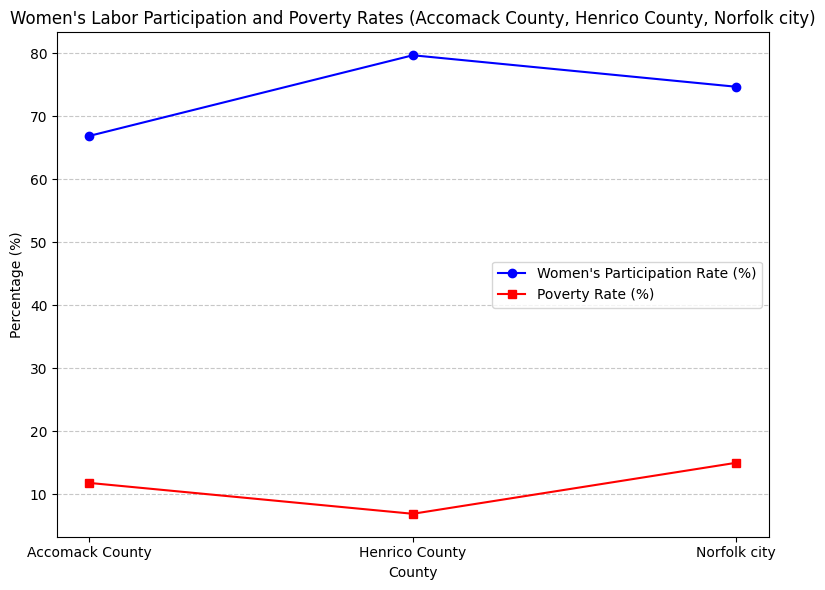

In [ ]:
data = pd.read_excel(file_path, sheet_name='Virginia') # Specify the sheet name
reg_data = data[data['County name'].isin(['Accomack County', 'Henrico County', 'Norfolk city'])]
filtered_data = reg_data[
    [
        "County name",
        "Women's labor force participation rate (%)",
        "Percent of families in poverty (%)",
    ]
]

# Plotting the data for the selected counties
x = filtered_data["County name"]
participation_rate = filtered_data["Women's labor force participation rate (%)"]
poverty_rate = filtered_data["Percent of families in poverty (%)"]

# Creating the line plot
plt.figure(figsize=(8, 6))
plt.plot(x, participation_rate, marker='o', color='blue', label="Women's Participation Rate (%)")
plt.plot(x, poverty_rate, marker='s', color='red', label="Poverty Rate (%)")

# Adding labels, legend, and title
plt.xlabel("County")
plt.ylabel("Percentage (%)")
plt.title("Women's Labor Participation and Poverty Rates (Accomack County, Henrico County, Norfolk city)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


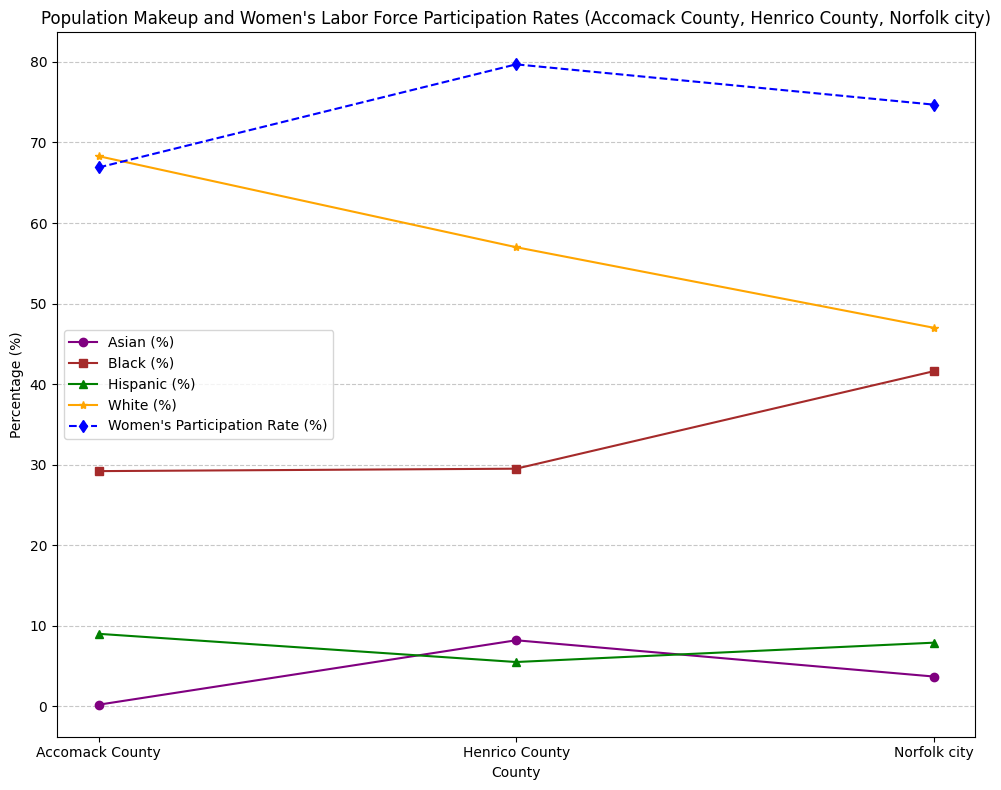

In [ ]:
data = pd.read_excel(file_path, sheet_name='Virginia') # Specify the sheet name
reg_data = data[data['County name'].isin(['Accomack County', 'Henrico County', 'Norfolk city'])]
# Extract relevant columns for ethnicity and women's labor force participation
filtered_data = [
    "Percent Asian (%)",
    "Percent Black (%)",
    "Percent Hispanic (of any race) (%)",
    "Percent White (%)",
    "Women's labor force participation rate (%)",
]
filtered_data = reg_data[["County name"] + filtered_data]

# Plotting the data
x = filtered_data["County name"]
asian = filtered_data["Percent Asian (%)"]
black = filtered_data["Percent Black (%)"]
hispanic = filtered_data["Percent Hispanic (of any race) (%)"]
white = filtered_data["Percent White (%)"]
participation_rate = filtered_data["Women's labor force participation rate (%)"]

plt.figure(figsize=(10, 8))

# Plotting ethnicity composition
plt.plot(x, asian, marker='o', color='purple', label="Asian (%)")
plt.plot(x, black, marker='s', color='brown', label="Black (%)")
plt.plot(x, hispanic, marker='^', color='green', label="Hispanic (%)")
plt.plot(x, white, marker='*', color='orange', label="White (%)")

# Plotting women's labor force participation rate
plt.plot(x, participation_rate, marker='d', color='blue', linestyle='--', label="Women's Participation Rate (%)")

# Adding labels, legend, and title
plt.xlabel("County")
plt.ylabel("Percentage (%)")
plt.title("Population Makeup and Women's Labor Force Participation Rates (Accomack County, Henrico County, Norfolk city)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Additional Analysis

In [ ]:
from statsmodels.stats.mediation import Mediation
import statsmodels.api as sm
virginia_data = pd.read_excel(file_path, sheet_name='Virginia')


# Rename columns for easier access
virginia_data.rename(columns={
    'Median family income ($)': 'Median_family_income',
    'Percent Black (%)': 'Percent_Black',
    "Women's labor force participation rate (%)": 'Womens_labor_force_participation',
    'Infant center-based price: 2023 (estimated) ($)': 'Infant_center_price_2023',
    'Toddler center-based price: 2023 (estimated) ($)': 'Toddler_center_price_2023'
}, inplace=True)

# Select relevant columns
mediation_data = virginia_data[['Median_family_income', 'Percent_Black',
                                'Infant_center_price_2023', 'Toddler_center_price_2023',
                                'Womens_labor_force_participation']].dropna()

# Define dependent, independent, and mediator variables for the first test
IV1 = mediation_data['Median_family_income']
IV2 = mediation_data['Percent_Black']
M = mediation_data['Infant_center_price_2023']  # Childcare cost as the mediator
DV = mediation_data['Womens_labor_force_participation']

## Step-by-step mediation analysis calculation

# Step 1: Path A - Effect of IV1 on M
model_a_iv1 = sm.OLS(M, sm.add_constant(IV1)).fit()
path_a_iv1 = model_a_iv1.params[1]  # Coefficient for IV1

# Step 2: Path B - Effect of M on DV (controlling for IV1)
model_b_iv1 = sm.OLS(DV, sm.add_constant(pd.concat([M, IV1], axis=1))).fit()
path_b_iv1 = model_b_iv1.params['Infant_center_price_2023']

# Step 3: Path C' - Direct effect of IV1 on DV (controlling for M)
direct_effect_iv1 = model_b_iv1.params['Median_family_income']

# Step 4: Indirect Effect (Path A × Path B)
indirect_effect_iv1 = path_a_iv1 * path_b_iv1

# Total Effect
total_effect_iv1 = indirect_effect_iv1 + direct_effect_iv1

# Repeat for IV2
model_a_iv2 = sm.OLS(M, sm.add_constant(IV2)).fit()
path_a_iv2 = model_a_iv2.params[1]

model_b_iv2 = sm.OLS(DV, sm.add_constant(pd.concat([M, IV2], axis=1))).fit()
path_b_iv2 = model_b_iv2.params['Infant_center_price_2023']

direct_effect_iv2 = model_b_iv2.params['Percent_Black']
indirect_effect_iv2 = path_a_iv2 * path_b_iv2
total_effect_iv2 = indirect_effect_iv2 + direct_effect_iv2

# Summarize results
results_summary = pd.DataFrame({
    "Path": ["Path A (IV -> M)", "Path B (M -> DV)", "Direct Effect (Path C)", "Indirect Effect (A × B)", "Total Effect"],
    "IV1 (Family Income)": [path_a_iv1, path_b_iv1, direct_effect_iv1, indirect_effect_iv1, total_effect_iv1],
    "IV2 (Percent Black)": [path_a_iv2, path_b_iv2, direct_effect_iv2, indirect_effect_iv2, total_effect_iv2]
})

results_summary



<ipython-input-50-3df5c7b49cce>:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  path_a_iv1 = model_a_iv1.params[1]  # Coefficient for IV1
<ipython-input-50-3df5c7b49cce>:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  path_a_iv2 = model_a_iv2.params[1]


,Path,IV1 (Family Income),IV2 (Percent Black)
0,Path A (IV -> M),0.136769,-6.696556
1,Path B (M -> DV),0.000825,0.000960
2,Direct Effect (Path C'),0.000025,0.101050
3,Indirect Effect (A × B),0.000113,-0.006426
4,Total Effect,0.000138,0.094623


### Setting data up a little differently

In [35]:
import pandas as pd
data = pd.read_excel(file_path, sheet_name='Virginia')
data['Average Home Based ChildCare Share of Income 2018'] = data[[
    'Infant home-based price as share of family income: 2018 (%)',
    'Toddler home-based price as share of family income: 2018 (%)',
    'Preschool home-based price as share of family income: 2018 (%)',
    'School-age home-based price as share of family income: 2018 (%)'
]].mean(axis=1)

data['Average Center Based ChildCare of Income 2018'] = data[[
    'Infant center-based price as share of family income: 2018 (%)',
    'Toddler center-based price as share of family income: 2018 (%)',
    'Preschool center-based price as share of family income: 2018 (%)',
    'School-age center-based price as share of family income: 2018 (%)'
]].mean(axis=1)

data['Center-based 2018 (Mean)'] = data[[
    'Infant center-based price: 2018 ($)',
    'Toddler center-based price: 2018 ($)',
    'Preschool center-based price: 2018 ($)',
    'School-age center-based price: 2018 ($)'
]].mean(axis=1)

data['Center-based 2023 (Mean)'] = data[[
    'Infant center-based price: 2023 (estimated) ($)',
    'Toddler center-based price: 2023 (estimated) ($)',
    'Preschool center-based price: 2023 (estimated) ($)',
    'School-age center-based price: 2023 (estimated) ($)'
]].mean(axis=1)

data['Home-based 2018 (Mean)'] = data[[
    'Infant home-based price: 2018 ($)',
    'Toddler home-based price: 2018 ($)',
    'Preschool home-based price: 2018 ($)',
    'School-age home-based price: 2018 ($)'
]].mean(axis=1)

data['Home-based 2023 (Mean)'] = data[[
    'Infant home-based price: 2023 (estimated) ($)',
    'Toddler home-based price: 2023 (estimated) ($)',
    'Preschool home-based price: 2023 (estimated) ($)',
    'School-age home-based price:  2023 (estimated) ($)'
]].mean(axis=1)

data['Average Cildcare Cost 2018'] = (data['Center-based 2018 (Mean)'] + data['Home-based 2018 (Mean)'])/2
data['Average Cildcare Cost 2023'] = (data['Center-based 2023 (Mean)'] + data['Home-based 2023 (Mean)'])/2

data['Percent Minority'] = data['Percent Asian (%)'] + data['Percent Black (%)'] + data['Percent Hispanic (of any race) (%)']
data.drop(columns = ['County FIPS code', 'State name'], inplace = True)
data.to_csv("data_agg.csv")

In [34]:
data

,County name,Infant center-based price: 2018 ($),Infant center-based price: 2023 (estimated) ($),Infant center-based price as share of family income: 2018 (%),Infant home-based price: 2018 ($),Infant home-based price: 2023 (estimated) ($),Infant home-based price as share of family income: 2018 (%),Toddler center-based price: 2018 ($),Toddler center-based price: 2023 (estimated) ($),Toddler center-based price as share of family income: 2018 (%),...,Percent White (%),Average Home Based ChildCare Share of Income 2018,Average Center Based ChildCare of Income 2018,Center-based 2018 (Mean),Center-based 2023 (Mean),Home-based 2018 (Mean),Home-based 2023 (Mean),Average Cildcare Cost 2018,Average Cildcare Cost 2023,Percent Minority
0,Accomack County,8580,10099.107459,15.604539,5200,6120.671187,9.457297,5980,7038.771866,10.875891,...,68.3,8.393351,11.821621,6500.0,7650.838984,4615.0,5432.095679,5557.5,6541.467332,38.4
1,Albemarle County,13520,15913.745087,14.060339,7540,8874.973222,7.841343,11180,13159.443053,11.626819,...,81.6,7.165365,11.964808,11505.0,13541.985002,6890.0,8109.889323,9197.5,10825.937163,20.9
2,Alleghany County,7280,8568.939662,12.247233,5200,6120.671187,8.748023,5980,7038.771866,10.060227,...,92.0,7.545170,10.497628,6240.0,7344.805425,4485.0,5279.078899,5362.5,6311.942162,6.9
3,Amelia County,6760,7956.872544,9.071877,6500,7650.838984,8.722959,5200,6120.671187,6.978367,...,75.8,6.629449,7.501745,5590.0,6579.721526,4940.0,5814.637628,5265.0,6197.179577,24.3
4,Amherst County,6760,7956.872544,10.535503,6500,7650.838984,10.130291,5200,6120.671187,8.104233,...,77.2,7.496415,9.015959,5785.0,6809.246696,4810.0,5661.620848,5297.5,6235.433772,20.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Suffolk city,9360,11017.208137,11.284450,9100,10711.174578,10.970993,8060,9487.040340,9.717165,...,51.7,8.620066,9.873894,8190.0,9640.057120,7150.0,8415.922883,7670.0,9027.990001,47.7
129,Virginia Beach city,11700,13771.510172,13.678291,7800,9181.006781,9.118861,9360,11017.208137,10.942633,...,66.7,8.738908,11.170605,9555.0,11246.733307,7475.0,8798.464832,8515.0,10022.599069,33.6
130,Waynesboro city,8840,10405.141019,14.787802,7020,8262.906103,11.743254,7540,8874.973222,12.613125,...,81.3,11.090851,12.939326,7735.0,9104.498391,6630.0,7803.855764,7182.5,8454.177078,22.6
131,Williamsburg city,10920,12853.409494,12.348611,7800,9181.006781,8.820436,8580,10099.107459,9.702480,...,74.5,7.791385,9.996494,8840.0,10405.141019,6890.0,8109.889323,7865.0,9257.515171,27.6


In [21]:
data.columns

Index(['County name', 'Infant center-based price: 2018 ($)',
       'Infant center-based price: 2023 (estimated) ($)',
       'Infant center-based price as share of family income: 2018 (%)',
       'Infant home-based price: 2018 ($)',
       'Infant home-based price: 2023 (estimated) ($)',
       'Infant home-based price as share of family income: 2018 (%)',
       'Toddler center-based price: 2018 ($)',
       'Toddler center-based price: 2023 (estimated) ($)',
       'Toddler center-based price as share of family income: 2018 (%)',
       'Toddler home-based price: 2018 ($)',
       'Toddler home-based price: 2023 (estimated) ($)',
       'Toddler home-based price as share of family income: 2018 (%)',
       'Preschool center-based price: 2018 ($)',
       'Preschool center-based price: 2023 (estimated) ($)',
       'Preschool center-based price as share of family income: 2018 (%)',
       'Preschool home-based price: 2018 ($)',
       'Preschool home-based price: 2023 (estimated) ($

## Center Based Childcare costs when comparing high and low minority percentages

Independent t-Test Results:
T-statistic: 3.4102619924686364
P-value: 0.0009871157165623429


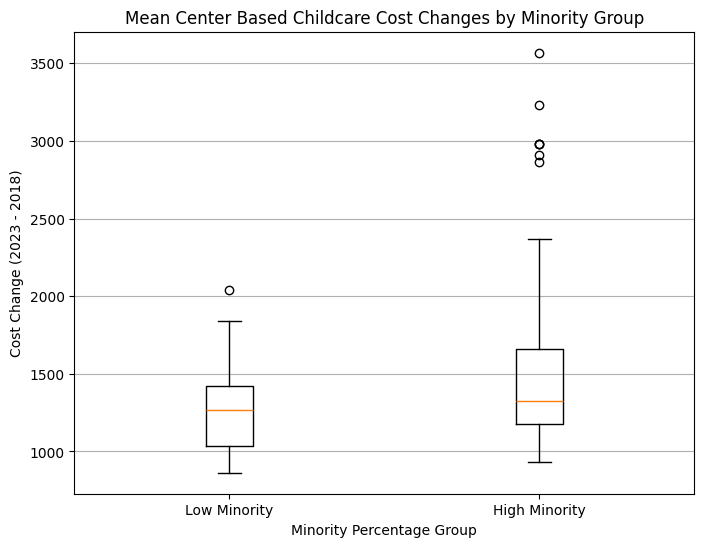

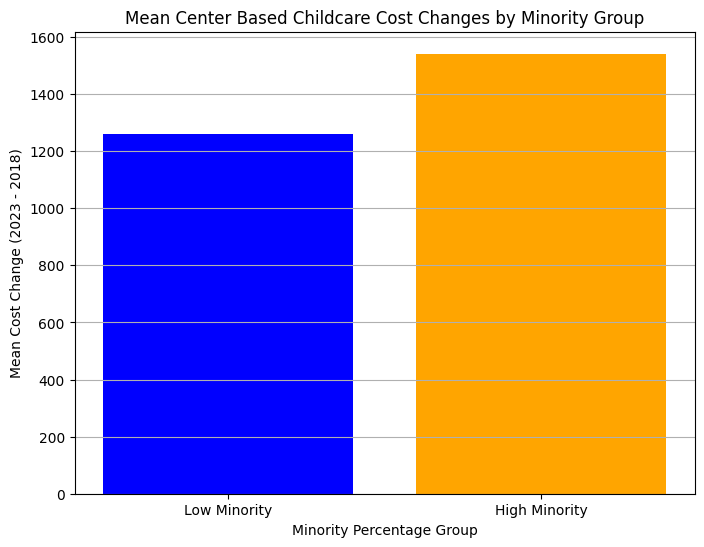

{'Mean Cost Change (High Minority)': 1540.9036521053904,
 'Mean Cost Change (Low Minority)': 1258.70866815656,
 'Difference (High - Low)': 282.19498394883044}

In [37]:
from scipy.stats import ttest_ind
# alculating 'Cost Change' as the difference between 2023 and 2018 costs
data['Cost Change'] = data['Center-based 2023 (Mean)'] - data['Center-based 2018 (Mean)']

# Group data based on the median value of 'Percent Minority'
median_minority = data['Percent Minority'].median()
high_minority = data[data['Percent Minority'] > median_minority]['Cost Change']
low_minority = data[data['Percent Minority'] <= median_minority]['Cost Change']

# Perform independent t-test for high vs low minority groups
ttest_minority_independent = ttest_ind(high_minority, low_minority, equal_var=False)  # Welch's t-test

# Display results
ttest_results = {
    't-statistic': ttest_minority_independent.statistic,
    'p-value': ttest_minority_independent.pvalue
}

# Print summary of results
print("Independent t-Test Results:")
print(f"T-statistic: {ttest_results['t-statistic']}")
print(f"P-value: {ttest_results['p-value']}")

import matplotlib.pyplot as plt

# Calculate mean cost changes for high and low minority groups
mean_high_minority = high_minority.mean()
mean_low_minority = low_minority.mean()


plt.figure(figsize=(8, 6))
plt.boxplot([low_minority, high_minority], labels=['Low Minority', 'High Minority'])
plt.title('Mean Center Based Childcare Cost Changes by Minority Group')
plt.ylabel('Cost Change (2023 - 2018)')
plt.xlabel('Minority Percentage Group')
plt.grid(axis='y')
plt.show()

# Visualization: Bar chart of mean cost changes
plt.figure(figsize=(8, 6))
plt.bar(['Low Minority', 'High Minority'], [mean_low_minority, mean_high_minority], color=['blue', 'orange'])
plt.title('Mean Center Based Childcare Cost Changes by Minority Group')
plt.ylabel('Mean Cost Change (2023 - 2018)')
plt.xlabel('Minority Percentage Group')
plt.grid(axis='y')
plt.show()

# Direction of difference
direction_of_difference = {
    'Mean Cost Change (High Minority)': mean_high_minority,
    'Mean Cost Change (Low Minority)': mean_low_minority,
    'Difference (High - Low)': mean_high_minority - mean_low_minority
}

direction_of_difference


## Childcare Home based costs with respect to high and low minority group regions

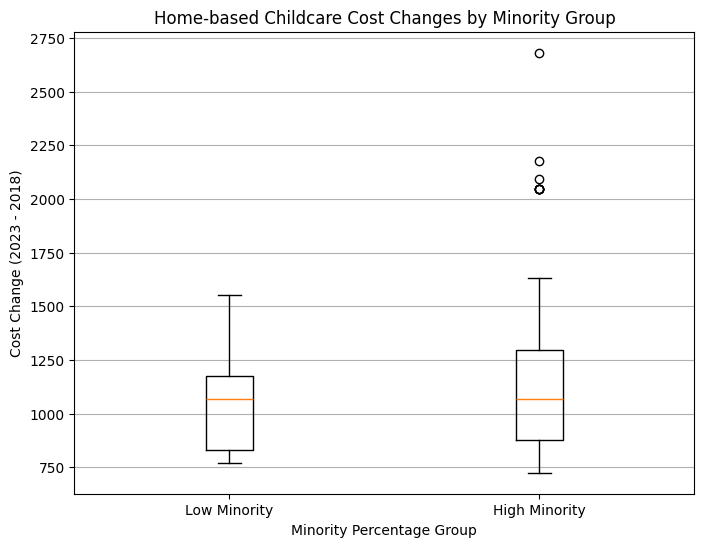

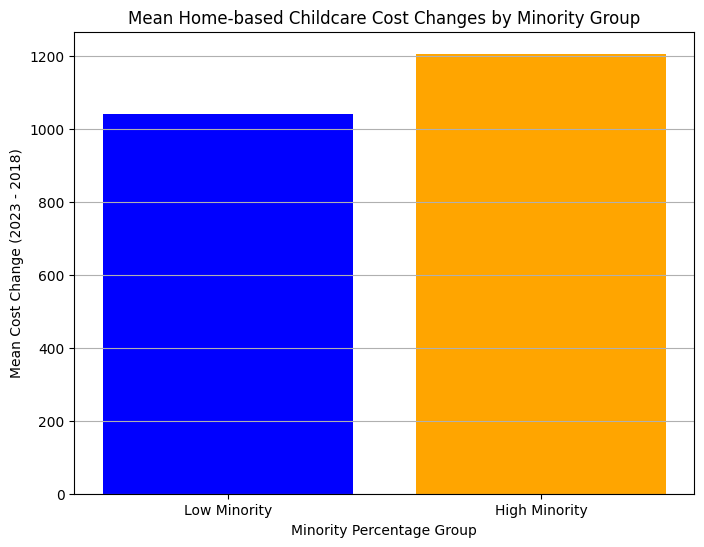

{'t-statistic': 2.9865204675542953,
 'p-value': 0.0035967666350732322,
 'Mean Cost Change (High Minority)': 1205.7653903257633,
 'Mean Cost Change (Low Minority)': 1039.7057271222236,
 'Difference (High - Low)': 166.05966320353969}

In [32]:
#Calculate 'Cost Change' for home-based childcare as the difference between 2023 and 2018 costs
data['Home Cost Change'] = data['Home-based 2023 (Mean)'] - data['Home-based 2018 (Mean)']

# Group data based on the median value of 'Percent Minority'
median_minority = data['Percent Minority'].median()
high_minority_home = data[data['Percent Minority'] > median_minority]['Home Cost Change']
low_minority_home = data[data['Percent Minority'] <= median_minority]['Home Cost Change']

# Perform independent t-test for high vs low minority groups for home-based costs
ttest_minority_home = ttest_ind(high_minority_home, low_minority_home, equal_var=False)  # Welch's t-test

# Calculate mean differences
mean_high_minority_home = high_minority_home.mean()
mean_low_minority_home = low_minority_home.mean()


# Boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([low_minority_home, high_minority_home], labels=['Low Minority', 'High Minority'])
plt.title('Home-based Childcare Cost Changes by Minority Group')
plt.ylabel('Cost Change (2023 - 2018)')
plt.xlabel('Minority Percentage Group')
plt.grid(axis='y')
plt.show()

# Bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Low Minority', 'High Minority'], [mean_low_minority_home, mean_high_minority_home], color=['blue', 'orange'])
plt.title('Mean Home-based Childcare Cost Changes by Minority Group')
plt.ylabel('Mean Cost Change (2023 - 2018)')
plt.xlabel('Minority Percentage Group')
plt.grid(axis='y')
plt.show()

# Prepare results for home-based analysis
home_based_results = {
    't-statistic': ttest_minority_home.statistic,
    'p-value': ttest_minority_home.pvalue,
    'Mean Cost Change (High Minority)': mean_high_minority_home,
    'Mean Cost Change (Low Minority)': mean_low_minority_home,
    'Difference (High - Low)': mean_high_minority_home - mean_low_minority_home
}

home_based_results


## Different tests for womens labor force participation

### Regression Anaysis

Womens labor force participation

In [42]:
import pandas as pd
import statsmodels.api as sm
data = pd.read_excel(file_path, sheet_name='Virginia')
data['Average Home Based ChildCare Share of Income 2018'] = data[[
    'Infant home-based price as share of family income: 2018 (%)',
    'Toddler home-based price as share of family income: 2018 (%)',
    'Preschool home-based price as share of family income: 2018 (%)',
    'School-age home-based price as share of family income: 2018 (%)'
]].mean(axis=1)

data['Average Center Based ChildCare of Income 2018'] = data[[
    'Infant center-based price as share of family income: 2018 (%)',
    'Toddler center-based price as share of family income: 2018 (%)',
    'Preschool center-based price as share of family income: 2018 (%)',
    'School-age center-based price as share of family income: 2018 (%)'
]].mean(axis=1)

data['Center-based 2018 (Mean)'] = data[[
    'Infant center-based price: 2018 ($)',
    'Toddler center-based price: 2018 ($)',
    'Preschool center-based price: 2018 ($)',
    'School-age center-based price: 2018 ($)'
]].mean(axis=1)

data['Center-based 2023 (Mean)'] = data[[
    'Infant center-based price: 2023 (estimated) ($)',
    'Toddler center-based price: 2023 (estimated) ($)',
    'Preschool center-based price: 2023 (estimated) ($)',
    'School-age center-based price: 2023 (estimated) ($)'
]].mean(axis=1)

data['Home-based 2018 (Mean)'] = data[[
    'Infant home-based price: 2018 ($)',
    'Toddler home-based price: 2018 ($)',
    'Preschool home-based price: 2018 ($)',
    'School-age home-based price: 2018 ($)'
]].mean(axis=1)

data['Home-based 2023 (Mean)'] = data[[
    'Infant home-based price: 2023 (estimated) ($)',
    'Toddler home-based price: 2023 (estimated) ($)',
    'Preschool home-based price: 2023 (estimated) ($)',
    'School-age home-based price:  2023 (estimated) ($)'
]].mean(axis=1)

data['Average Cildcare Cost 2018'] = (data['Center-based 2018 (Mean)'] + data['Home-based 2018 (Mean)'])/2
data['Average Cildcare Cost 2023'] = (data['Center-based 2023 (Mean)'] + data['Home-based 2023 (Mean)'])/2

data['Percent Minority'] = data['Percent Asian (%)'] + data['Percent Black (%)'] + data['Percent Hispanic (of any race) (%)']
data.drop(columns = ['County FIPS code', 'State name'], inplace = True)
regression_data = data[[
    "Women's labor force participation rate (%)",
    "Average Cildcare Cost 2018",
    "Average Cildcare Cost 2023",
    "Percent Minority",
    "Median family income ($)",
    "Percent of families in poverty (%)"
]].dropna()



# Defining the dependent variable (Y) and independent variables (X)
Y = regression_data["Women's labor force participation rate (%)"]
X = regression_data[[
    "Average Cildcare Cost 2018",
    "Percent Minority",
    "Median family income ($)",
    "Percent of families in poverty (%)"
]]

# Adding a constant for regression
X = sm.add_constant(X)

# Running the linear regression model
model = sm.OLS(Y, X).fit()

# Summarizing results
regression_summary = model.summary()
regression_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                        
======================================================================================================
Dep. Variable:     Women's labor force participation rate (%)   R-squared:                       0.468
Model:                                                    OLS   Adj. R-squared:                  0.451
Method:                                         Least Squares   F-statistic:                     28.14
Date:                                        Mon, 25 Nov 2024   Prob (F-statistic):           9.01e-17
Time:                                                14:27:41   Log-Likelihood:                -401.09
No. Observations:                                         133   AIC:                             812.2
Df Residuals:                                             128   BIC:                             826.6
Df Model:                                                   4                                         
Covariance Type:                                    nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 67.2149      2.974     22.598      0.000      61.330      73.100
Average Cildcare Cost 2018             0.0009      0.000      2.107      0.037    5.21e-05       0.002
Percent Minority                       0.1499      0.027      5.468      0.000       0.096       0.204
Median family income ($)           -1.596e-05   4.56e-05     -0.350      0.727      -0.000    7.42e-05
Percent of families in poverty (%)    -0.5283      0.132     -3.996      0.000      -0.790      -0.267
==============================================================================
Omnibus:                        9.952   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.072
Skew:                          -0.590   Prob(JB):                      0.00650
Kurtosis:                       3.653   Cond. No.                     5.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
import pandas as pd
import statsmodels.api as sm
data = pd.read_excel(file_path, sheet_name='Virginia')
data['Average Home Based ChildCare Share of Income 2018'] = data[[
    'Infant home-based price as share of family income: 2018 (%)',
    'Toddler home-based price as share of family income: 2018 (%)',
    'Preschool home-based price as share of family income: 2018 (%)',
    'School-age home-based price as share of family income: 2018 (%)'
]].mean(axis=1)

data['Average Center Based ChildCare of Income 2018'] = data[[
    'Infant center-based price as share of family income: 2018 (%)',
    'Toddler center-based price as share of family income: 2018 (%)',
    'Preschool center-based price as share of family income: 2018 (%)',
    'School-age center-based price as share of family income: 2018 (%)'
]].mean(axis=1)

data['Center-based 2018 (Mean)'] = data[[
    'Infant center-based price: 2018 ($)',
    'Toddler center-based price: 2018 ($)',
    'Preschool center-based price: 2018 ($)',
    'School-age center-based price: 2018 ($)'
]].mean(axis=1)

data['Center-based 2023 (Mean)'] = data[[
    'Infant center-based price: 2023 (estimated) ($)',
    'Toddler center-based price: 2023 (estimated) ($)',
    'Preschool center-based price: 2023 (estimated) ($)',
    'School-age center-based price: 2023 (estimated) ($)'
]].mean(axis=1)

data['Home-based 2018 (Mean)'] = data[[
    'Infant home-based price: 2018 ($)',
    'Toddler home-based price: 2018 ($)',
    'Preschool home-based price: 2018 ($)',
    'School-age home-based price: 2018 ($)'
]].mean(axis=1)

data['Home-based 2023 (Mean)'] = data[[
    'Infant home-based price: 2023 (estimated) ($)',
    'Toddler home-based price: 2023 (estimated) ($)',
    'Preschool home-based price: 2023 (estimated) ($)',
    'School-age home-based price:  2023 (estimated) ($)'
]].mean(axis=1)

data['Average Cildcare Cost 2018'] = (data['Center-based 2018 (Mean)'] + data['Home-based 2018 (Mean)'])/2
data['Average Cildcare Cost 2023'] = (data['Center-based 2023 (Mean)'] + data['Home-based 2023 (Mean)'])/2

data['Percent Minority'] = data['Percent Asian (%)'] + data['Percent Black (%)'] + data['Percent Hispanic (of any race) (%)']
data.drop(columns = ['County FIPS code', 'State name'], inplace = True)
regression_data = data[[
    "Women's labor force participation rate (%)",
    "Average Cildcare Cost 2018",
    "Average Cildcare Cost 2023",
    "Percent Minority",
    "Median family income ($)",
    "Percent of families in poverty (%)"
]].dropna()



# Defining the dependent variable (Y) and independent variables (X)
Y = regression_data["Women's labor force participation rate (%)"]
X = regression_data[[
    "Average Cildcare Cost 2023",
    "Percent Minority",
    "Median family income ($)",
    "Percent of families in poverty (%)"
]]

# Adding a constant for regression
X = sm.add_constant(X)

# Running the linear regression model
model = sm.OLS(Y, X).fit()

# Summarizing results
regression_summary = model.summary()
regression_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                        
======================================================================================================
Dep. Variable:     Women's labor force participation rate (%)   R-squared:                       0.468
Model:                                                    OLS   Adj. R-squared:                  0.451
Method:                                         Least Squares   F-statistic:                     28.14
Date:                                        Mon, 25 Nov 2024   Prob (F-statistic):           9.01e-17
Time:                                                14:28:21   Log-Likelihood:                -401.09
No. Observations:                                         133   AIC:                             812.2
Df Residuals:                                             128   BIC:                             826.6
Df Model:                                                   4                                         
Covariance Type:                                    nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 67.2149      2.974     22.598      0.000      61.330      73.100
Average Cildcare Cost 2023             0.0007      0.000      2.107      0.037    4.43e-05       0.001
Percent Minority                       0.1499      0.027      5.468      0.000       0.096       0.204
Median family income ($)           -1.596e-05   4.56e-05     -0.350      0.727      -0.000    7.42e-05
Percent of families in poverty (%)    -0.5283      0.132     -3.996      0.000      -0.790      -0.267
==============================================================================
Omnibus:                        9.952   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.072
Skew:                          -0.590   Prob(JB):                      0.00650
Kurtosis:                       3.653   Cond. No.                     5.24e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Measuring interaction impact of different variables:

Childcare Cost x Percent Minority

Childcare Cost x Percent of Families in Poverty

Percent Minority x Percent of Families in Poverty

In [44]:
import pandas as pd
import statsmodels.api as sm
data = pd.read_excel(file_path, sheet_name='Virginia')
data['Average Home Based ChildCare Share of Income 2018'] = data[[
    'Infant home-based price as share of family income: 2018 (%)',
    'Toddler home-based price as share of family income: 2018 (%)',
    'Preschool home-based price as share of family income: 2018 (%)',
    'School-age home-based price as share of family income: 2018 (%)'
]].mean(axis=1)

data['Average Center Based ChildCare of Income 2018'] = data[[
    'Infant center-based price as share of family income: 2018 (%)',
    'Toddler center-based price as share of family income: 2018 (%)',
    'Preschool center-based price as share of family income: 2018 (%)',
    'School-age center-based price as share of family income: 2018 (%)'
]].mean(axis=1)

data['Center-based 2018 (Mean)'] = data[[
    'Infant center-based price: 2018 ($)',
    'Toddler center-based price: 2018 ($)',
    'Preschool center-based price: 2018 ($)',
    'School-age center-based price: 2018 ($)'
]].mean(axis=1)

data['Center-based 2023 (Mean)'] = data[[
    'Infant center-based price: 2023 (estimated) ($)',
    'Toddler center-based price: 2023 (estimated) ($)',
    'Preschool center-based price: 2023 (estimated) ($)',
    'School-age center-based price: 2023 (estimated) ($)'
]].mean(axis=1)

data['Home-based 2018 (Mean)'] = data[[
    'Infant home-based price: 2018 ($)',
    'Toddler home-based price: 2018 ($)',
    'Preschool home-based price: 2018 ($)',
    'School-age home-based price: 2018 ($)'
]].mean(axis=1)

data['Home-based 2023 (Mean)'] = data[[
    'Infant home-based price: 2023 (estimated) ($)',
    'Toddler home-based price: 2023 (estimated) ($)',
    'Preschool home-based price: 2023 (estimated) ($)',
    'School-age home-based price:  2023 (estimated) ($)'
]].mean(axis=1)

data['Average Cildcare Cost 2018'] = (data['Center-based 2018 (Mean)'] + data['Home-based 2018 (Mean)'])/2
data['Average Cildcare Cost 2023'] = (data['Center-based 2023 (Mean)'] + data['Home-based 2023 (Mean)'])/2

data['Percent Minority'] = data['Percent Asian (%)'] + data['Percent Black (%)'] + data['Percent Hispanic (of any race) (%)']
data.drop(columns = ['County FIPS code', 'State name'], inplace = True)

regression_data = data[[
    "Women's labor force participation rate (%)",
    "Average Cildcare Cost 2018",
    "Average Cildcare Cost 2023",
    "Percent Minority",
    "Median family income ($)",
    "Percent of families in poverty (%)"
]].dropna()

regression_data["Childcare Cost x Percent Minority"] = (
    regression_data["Average Cildcare Cost 2018"] * regression_data["Percent Minority"]
)

regression_data["Childcare Cost x Percent of Families in Poverty"] = (
    regression_data["Average Cildcare Cost 2018"] * regression_data["Percent of families in poverty (%)"]
)

regression_data["Percent Minority x Percent of Families in Poverty"] = (
    regression_data["Percent Minority"] * regression_data["Percent of families in poverty (%)"]
)

# Defining new regression model with interaction terms
X_interactions = regression_data[
    ["Average Cildcare Cost 2018",
     "Percent Minority",
     "Median family income ($)",
     "Percent of families in poverty (%)",
     "Childcare Cost x Percent Minority",
     "Childcare Cost x Percent of Families in Poverty",
     "Percent Minority x Percent of Families in Poverty"]
]

# Adding a constant for the regression model
X_interactions = sm.add_constant(X_interactions)

# Running the linear regression model with interaction terms
model_with_interactions = sm.OLS(Y, X_interactions).fit()

# Summarizing the results of the interaction model
model_with_interactions_summary = model_with_interactions.summary()
model_with_interactions_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                        
======================================================================================================
Dep. Variable:     Women's labor force participation rate (%)   R-squared:                       0.528
Model:                                                    OLS   Adj. R-squared:                  0.502
Method:                                         Least Squares   F-statistic:                     19.99
Date:                                        Mon, 25 Nov 2024   Prob (F-statistic):           8.59e-18
Time:                                                14:49:12   Log-Likelihood:                -393.10
No. Observations:                                         133   AIC:                             802.2
Df Residuals:                                             125   BIC:                             825.3
Df Model:                                                   7                                         
Covariance Type:                                    nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                63.6936      4.605     13.832      0.000      54.580      72.807
Average Cildcare Cost 2018                            0.0008      0.001      0.865      0.389      -0.001       0.003
Percent Minority                                      0.1941      0.132      1.466      0.145      -0.068       0.456
Median family income ($)                           4.295e-05    5.6e-05      0.766      0.445    -6.8e-05       0.000
Percent of families in poverty (%)                   -1.3698      0.329     -4.162      0.000      -2.021      -0.718
Childcare Cost x Percent Minority                 -2.514e-05   1.46e-05     -1.720      0.088   -5.41e-05    3.79e-06
Childcare Cost x Percent of Families in Poverty       0.0002   6.49e-05      2.318      0.022     2.2e-05       0.000
Percent Minority x Percent of Families in Poverty     0.0075      0.005      1.549      0.124      -0.002       0.017
==============================================================================
Omnibus:                        2.942   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                2.447
Skew:                          -0.240   Prob(JB):                        0.294
Kurtosis:                       3.459   Cond. No.                     3.00e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Childcare costs and income

In [49]:
import pandas as pd
import statsmodels.api as sm
file_path = '/content/drive/MyDrive/DataAsad/Childcare-Prices-by-Age-Children-Care-Setting-Data-Table-2023.xlsx'
data = pd.read_excel(file_path, sheet_name='Virginia')
data['Average Home Based ChildCare Share of Income 2018'] = data[[
    'Infant home-based price as share of family income: 2018 (%)',
    'Toddler home-based price as share of family income: 2018 (%)',
    'Preschool home-based price as share of family income: 2018 (%)',
    'School-age home-based price as share of family income: 2018 (%)'
]].mean(axis=1)

data['Average Center Based ChildCare of Income 2018'] = data[[
    'Infant center-based price as share of family income: 2018 (%)',
    'Toddler center-based price as share of family income: 2018 (%)',
    'Preschool center-based price as share of family income: 2018 (%)',
    'School-age center-based price as share of family income: 2018 (%)'
]].mean(axis=1)

data['Center-based 2018 (Mean)'] = data[[
    'Infant center-based price: 2018 ($)',
    'Toddler center-based price: 2018 ($)',
    'Preschool center-based price: 2018 ($)',
    'School-age center-based price: 2018 ($)'
]].mean(axis=1)

data['Center-based 2023 (Mean)'] = data[[
    'Infant center-based price: 2023 (estimated) ($)',
    'Toddler center-based price: 2023 (estimated) ($)',
    'Preschool center-based price: 2023 (estimated) ($)',
    'School-age center-based price: 2023 (estimated) ($)'
]].mean(axis=1)

data['Home-based 2018 (Mean)'] = data[[
    'Infant home-based price: 2018 ($)',
    'Toddler home-based price: 2018 ($)',
    'Preschool home-based price: 2018 ($)',
    'School-age home-based price: 2018 ($)'
]].mean(axis=1)

data['Home-based 2023 (Mean)'] = data[[
    'Infant home-based price: 2023 (estimated) ($)',
    'Toddler home-based price: 2023 (estimated) ($)',
    'Preschool home-based price: 2023 (estimated) ($)',
    'School-age home-based price:  2023 (estimated) ($)'
]].mean(axis=1)

data['Average Cildcare Cost 2018'] = (data['Center-based 2018 (Mean)'] + data['Home-based 2018 (Mean)'])/2
data['Average Cildcare Cost 2023'] = (data['Center-based 2023 (Mean)'] + data['Home-based 2023 (Mean)'])/2

data['Percent Minority'] = data['Percent Asian (%)'] + data['Percent Black (%)'] + data['Percent Hispanic (of any race) (%)']
data.drop(columns = ['County FIPS code', 'State name'], inplace = True)

# Extracting relevant columns for analysis: Family income and childcare costs
correlation_data = data[['Median family income ($)', 'Average Cildcare Cost 2018', 'Average Cildcare Cost 2023']].dropna()

# 1. Correlation Analysis: Pearson's correlation
correlation_income_2018 = correlation_data['Median family income ($)'].corr(correlation_data['Average Cildcare Cost 2018'])
correlation_income_2023 = correlation_data['Median family income ($)'].corr(correlation_data['Average Cildcare Cost 2023'])

# 2. Regression Analysis: Family income as independent variable, childcare cost as dependent variable
# Let's use 2018 childcare cost for the regression analysis
X_regression = sm.add_constant(correlation_data['Median family income ($)'])  # Independent variable: Family income
Y_regression_2018 = correlation_data['Average Cildcare Cost 2018']  # Dependent variable: Childcare cost 2018

# Running the linear regression model
model_regression = sm.OLS(Y_regression_2018, X_regression).fit()

# Summarizing the results of the regression model
correlation_income_2018, correlation_income_2023, model_regression.summary()


(0.8366346013778455,
 0.8366346013778455,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                                 OLS Regression Results                                
 Dep. Variable:     Average Cildcare Cost 2018   R-squared:                       0.700
 Model:                                    OLS   Adj. R-squared:                  0.698
 Method:                         Least Squares   F-statistic:                     305.6
 Date:                        Mon, 25 Nov 2024   Prob (F-statistic):           4.72e-36
 Time:                                15:30:25   Log-Likelihood:                -1136.7
 No. Observations:                         133   AIC:                             2277.
 Df Residuals:                             131   BIC:                             2283.
 Df Model:                                   1                                         
 Covariance Type:                    nonrobust                                         
                            

## In the current form, there is a strong positive correlation between income levels and childcare costs. This indicates to more affordability